<a href="https://colab.research.google.com/github/Armina101/Postpartum-depression-prediction-model/blob/main/postpartum_depression_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Pre-processing**

## **Importing all needed libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## **Read Dataset**

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/Armina101/Postpartum-depression-prediction-model/refs/heads/main/THP_clean.csv')

In [3]:
df.head()

newid  interviewer  uc grandmother employed_mo  income_mo  income_hh  \
0    NaN          NaN   1         NaN         NaN        NaN        NaN   
1  226.0          1.0   1          No          No        0.0       60.0   
2  222.0          6.0   1         Yes          No        0.0      200.0   
3    3.0          1.0   1          No          No        0.0      150.0   
4  217.0          3.0   1          No          No        0.0      250.0   

   genhealth  edu_mo    edu_fa  ... infantdev_1y  infantdev_1y_f  \
0        NaN     NaN  7.319728  ...    -1.550027       -0.914190   
1  Very good     0.0  8.000000  ...     0.919651        0.044339   
2   Moderate     7.0  9.000000  ...          NaN             NaN   
3       Good     0.0  5.000000  ...     1.589225        0.971888   
4          0     5.0  0.000000  ...          NaN             NaN   

   parentinputs_infancy  parentinputs_infancy_f infantdev infantdev_f  \
0              0.845854                0.341055 -1.155602   -0.975243   
1              2.737210                0.550107  0.587643    0.244921   
2                   NaN                     NaN       NaN         NaN   
3              0.634669                0.429139  0.326545    0.626777   
4                   NaN                     NaN       NaN         NaN   

  motherfinancial_7y  motherfinancial_7y_f  socialsupport socialsupport_f  
0                NaN                   NaN       1.496326             NaN  
1          -0.064279             -0.346433       2.569177        1.731267  
2          -0.521870             -0.295887       1.275779             NaN  
3           0.521984             -0.163072      -0.521288       -0.880748  
4           0.521984             -0.163072       1.275779             NaN  

[5 rows x 394 columns]

In [4]:
df.tail()

newid  interviewer  uc grandmother employed_mo  income_mo  income_hh  \
1198  546.0          5.0  40         Yes          No        0.0      150.0   
1199    NaN          NaN  40         NaN         NaN        NaN        NaN   
1200  594.0          5.0  40         Yes          No        0.0       80.0   
1201  568.0          5.0  40          No         Yes        NaN        NaN   
1202    NaN          NaN  40         NaN         NaN        NaN        NaN   

      genhealth  edu_mo     edu_fa  ... infantdev_1y  infantdev_1y_f  \
1198  Very good     0.0  10.000000  ...    -0.213161       -0.325892   
1199        NaN     NaN   7.319728  ...    -0.315063       -0.402695   
1200   Moderate     4.0   7.000000  ...     1.145054        0.341715   
1201       Good     5.0   8.000000  ...          NaN             NaN   
1202        NaN     NaN   7.319728  ...          NaN             NaN   

      parentinputs_infancy  parentinputs_infancy_f infantdev infantdev_f  \
1198              0.746556                0.541312  0.176705   -0.694231   
1199              0.425044                     NaN  0.903029    0.132893   
1200              0.746556                0.541312  1.455266    0.502727   
1201                   NaN                     NaN       NaN         NaN   
1202                   NaN                     NaN       NaN         NaN   

     motherfinancial_7y  motherfinancial_7y_f  socialsupport socialsupport_f  
1198          -0.064279             -0.346433       0.204220       -0.035893  
1199                NaN                   NaN      -0.025040             NaN  
1200           0.521984             -0.163072       0.747689        0.313829  
1201           0.449251                   NaN      -0.380235             NaN  
1202                NaN                   NaN            NaN             NaN  

[5 rows x 394 columns]

## **Sanity check of data**

In [5]:
df.shape

(1203, 394)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1203 entries, 0 to 1202
Columns: 394 entries, newid to socialsupport_f
dtypes: float64(366), int64(11), object(17)
memory usage: 3.6+ MB


In [7]:
#checking for duplicate values
df.duplicated().sum()

np.int64(0)

In [8]:
#checking for garbage values
for i in df.select_dtypes(include='object').columns:
  print(df[i].value_counts())
  print("***"*10)

grandmother
No     538
Yes    347
Name: count, dtype: int64
******************************
employed_mo
No     781
Yes    104
Name: count, dtype: int64
******************************
genhealth
Good         364
Moderate     251
Very good    184
0             70
Bad           16
Name: count, dtype: int64
******************************
ideal_no_kids
4     267
3     262
2     237
5      58
6      18
.d     11
7      10
1       9
8       8
0       4
Name: count, dtype: int64
******************************
mo_185
Yes    558
No     301
Name: count, dtype: int64
******************************
mo_358
not played at all    602
.25                  105
once or twice        102
.5                    56
.75                   20
Name: count, dtype: int64
******************************
mo_360
Yes    517
No     368
Name: count, dtype: int64
******************************
ch_27
Yes    704
No     170
Name: count, dtype: int64
******************************
ch_28
Yes    744
No     130
Name: count, dtype: i

## **Exploratory Data Analysis**

In [9]:
#descriptive statistics
df.describe()

newid  interviewer           uc   income_mo   income_hh  \
count  885.000000   885.000000  1203.000000  876.000000  756.000000   
mean   446.225989     4.672316    20.358271    4.332192  141.707143   
std    256.597500     2.254451    11.440891   15.539970  116.350589   
min      1.000000     1.000000     1.000000    0.000000    0.000000   
25%    225.000000     3.000000    10.000000    0.000000   70.000000   
50%    447.000000     5.000000    20.000000    0.000000  100.000000   
75%    668.000000     6.000000    30.000000    0.000000  180.000000   
max    889.000000     9.000000    40.000000  100.000000  800.000000   

           edu_mo       edu_fa  no_kids_over5_dead  no_kids_1_5_dead  \
count  885.000000  1203.000000          882.000000        881.000000   
mean     4.532203     7.319728            0.020408          0.037457   
std      4.182804     3.226069            0.141472          0.217851   
min      0.000000     0.000000            0.000000          0.000000   
25%      0.000000     7.000000            0.000000          0.000000   
50%      5.000000     7.319728            0.000000          0.000000   
75%      8.000000    10.000000            0.000000          0.000000   
max     18.000000    16.000000            1.000000          3.000000   

       no_kids_less1_dead  ...  infantdev_1y  infantdev_1y_f  \
count          881.000000  ...    712.000000    7.080000e+02   
mean             0.254257  ...      0.202339    7.455650e-10   
std              0.622537  ...      0.986870    8.181502e-01   
min              0.000000  ...     -4.269506   -4.648146e+00   
25%              0.000000  ...     -0.481443   -4.741491e-01   
50%              0.000000  ...      0.281445    2.411396e-02   
75%              0.000000  ...      0.969147    5.129925e-01   
max              6.000000  ...      2.511270    2.217049e+00   

       parentinputs_infancy  parentinputs_infancy_f   infantdev   infantdev_f  \
count            816.000000            5.860000e+02  740.000000  7.030000e+02   
mean               0.185357           -3.583618e-09    0.133936  1.593172e-10   
std                1.191635            9.470208e-01    1.007829  9.371984e-01   
min               -4.007296           -2.417459e+00   -3.322134 -4.993645e+00   
25%               -0.516389            2.669969e-01   -0.541004 -5.238761e-01   
50%                0.260971            4.462136e-01    0.206483  2.035729e-02   
75%                0.746556            5.413125e-01    0.876496  6.015202e-01   
max                3.995981            7.250453e-01    2.439257  2.655170e+00   

       motherfinancial_7y  motherfinancial_7y_f  socialsupport  \
count          885.000000          8.500000e+02    1120.000000   
mean             0.177863          4.270588e-09       0.346108   
std              1.047386          8.890144e-01       1.083957   
min             -1.108133         -4.792471e-01      -2.809055   
25%             -1.108133         -4.792471e-01      -0.380235   
50%              0.521984         -1.630720e-01       0.385548   
75%              0.521984         -1.630720e-01       1.095594   
max              4.615942          4.415358e+00       2.739945   

       socialsupport_f  
count     5.840000e+02  
mean      1.469041e-09  
std       7.565686e-01  
min      -2.106218e+00  
25%      -5.160580e-01  
50%       1.932745e-02  
75%       5.129678e-01  
max       1.797304e+00  

[8 rows x 377 columns]

In [10]:
df.describe(include='object')

grandmother employed_mo genhealth ideal_no_kids mo_185  \
count          885         885       885           884    859   
unique           2           2         5            10      2   
top             No          No      Good             4    Yes   
freq           538         781       364           267    558   

                   mo_358 mo_360 ch_27 ch_28 ch_29 ch_30 ch_31 ch_32 ch_33  \
count                 885    885   874   874   874   874   874   874   874   
unique                  5      2     2     2     2     2     2     2     2   
top     not played at all    Yes   Yes   Yes    No    No   Yes   Yes   Yes   
freq                  602    517   704   744   476   507   793   814   857   

       ch_34 ch_35 ch_36  
count    874   874   850  
unique     2     2     2  
top       No    No   Yes  
freq     581   598   431

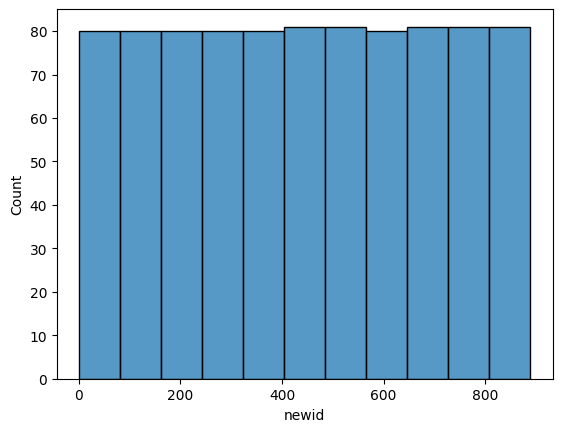

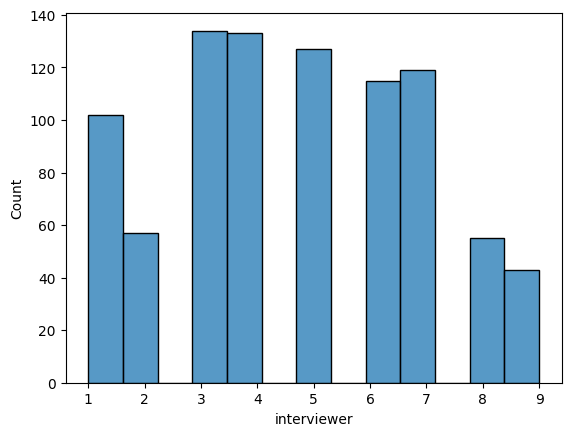

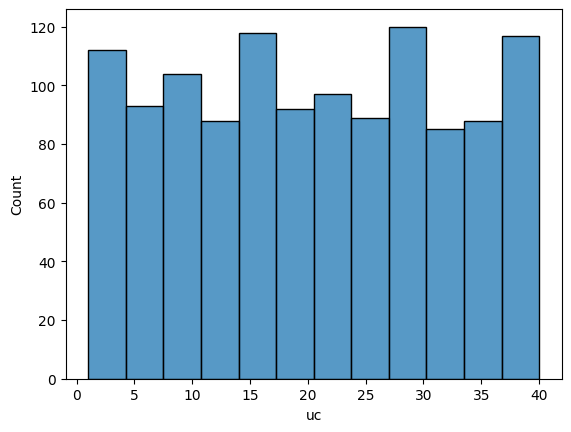

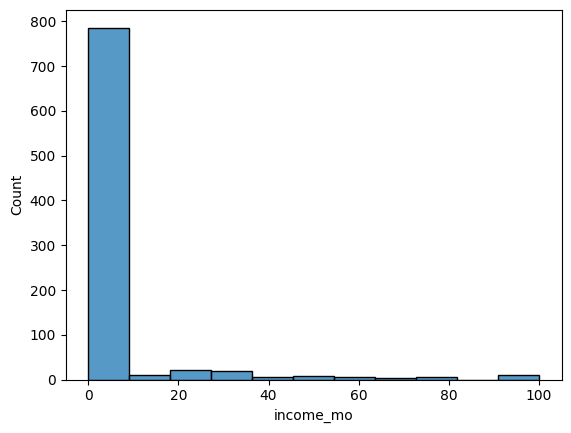

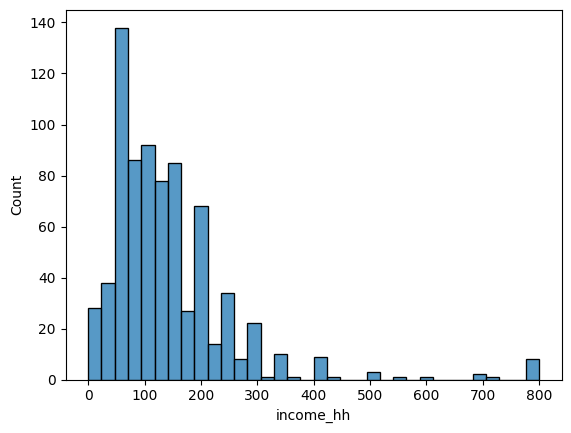

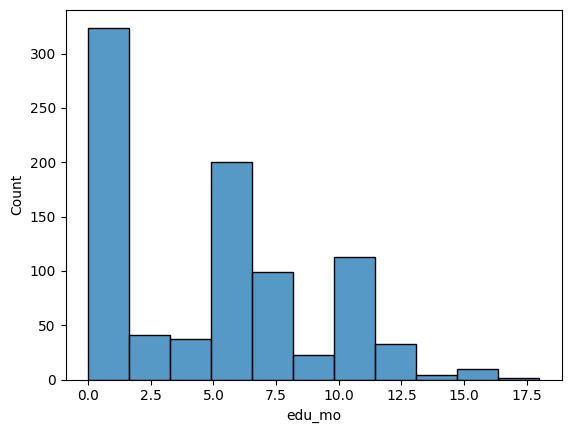

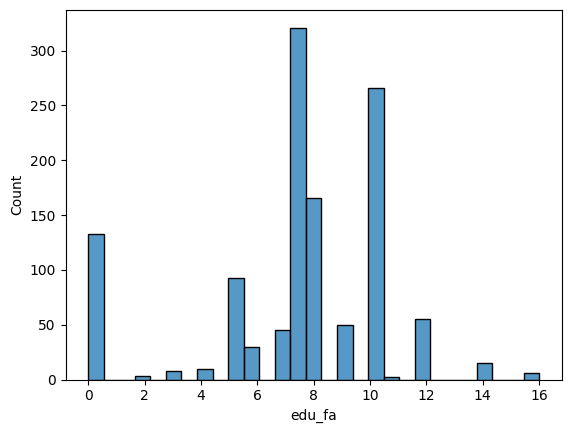

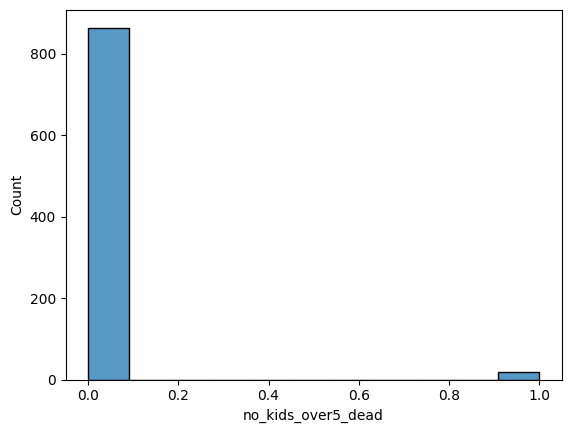

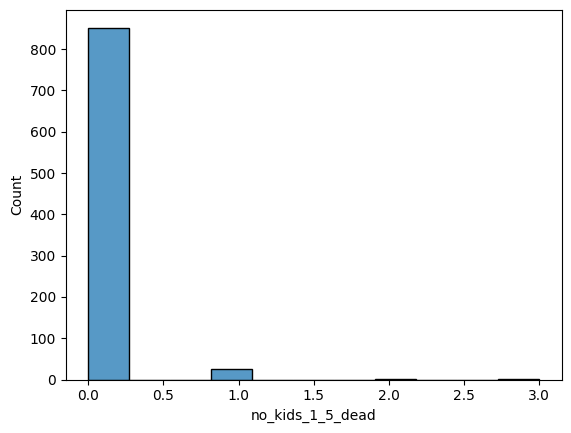

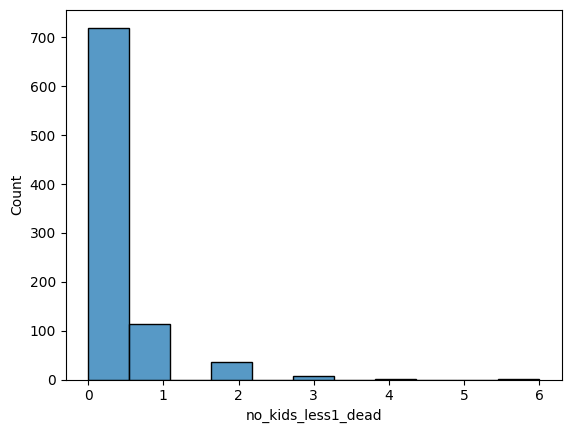

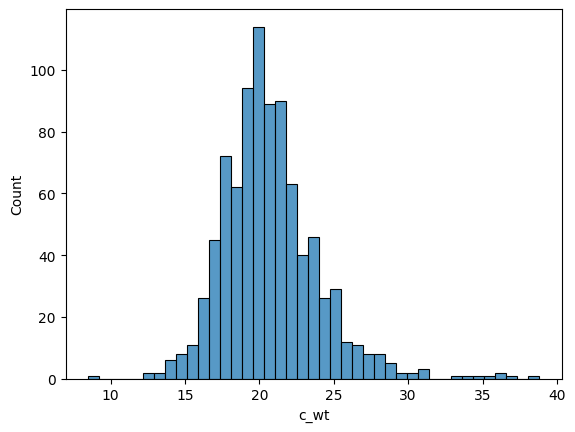

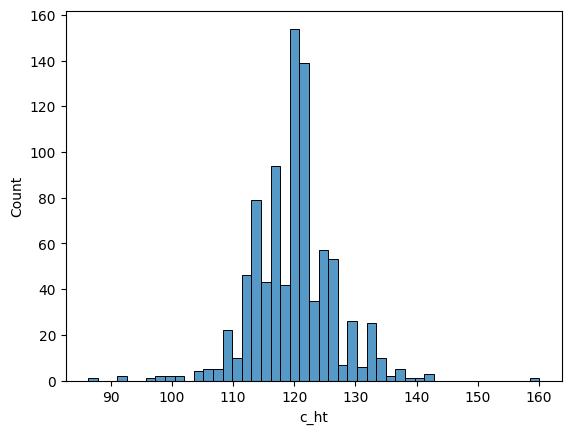

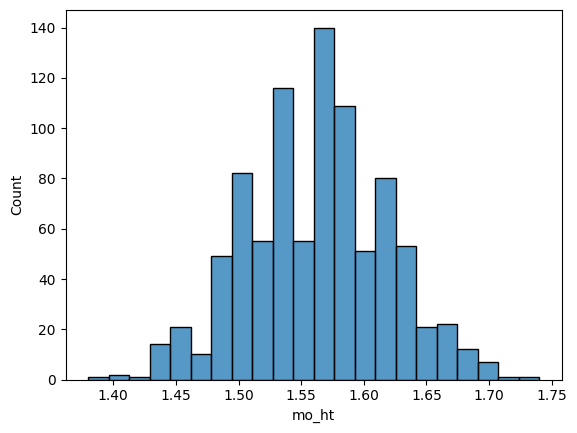

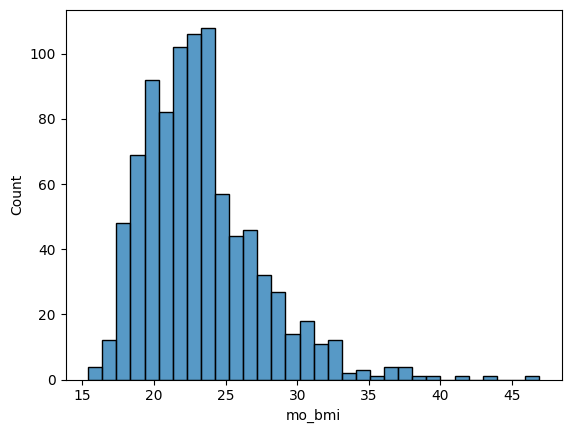

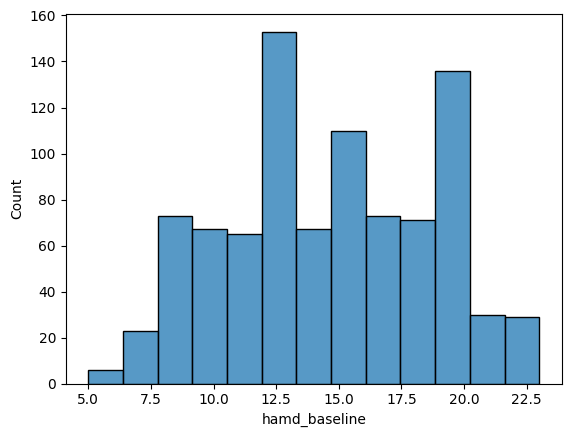

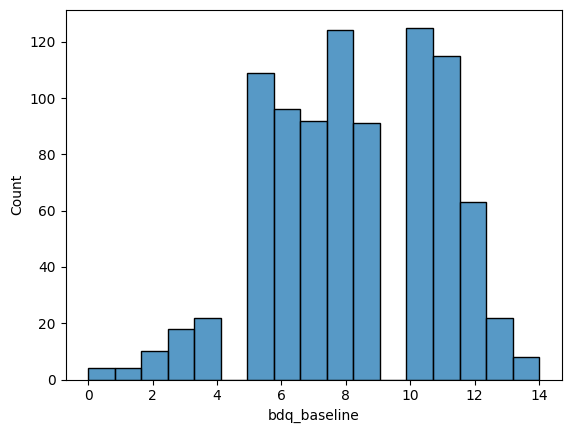

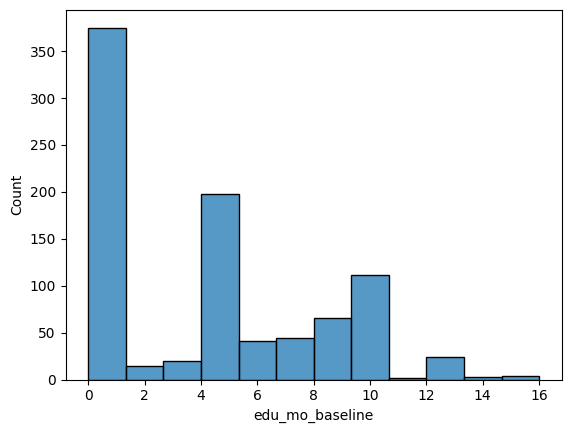

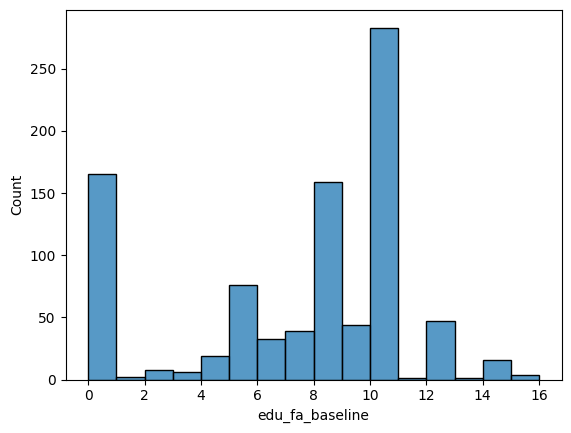

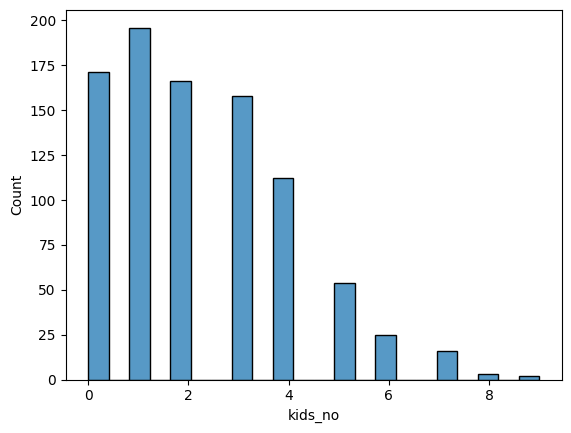

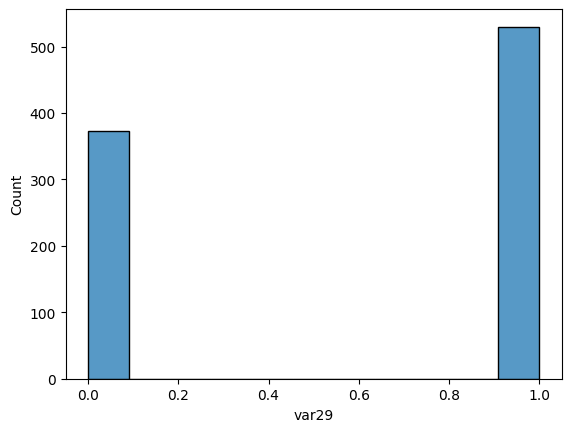

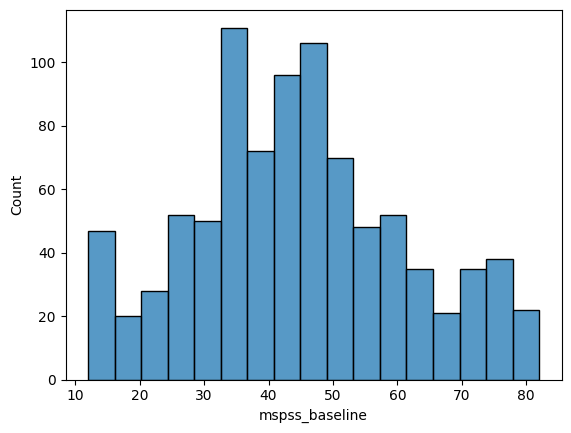

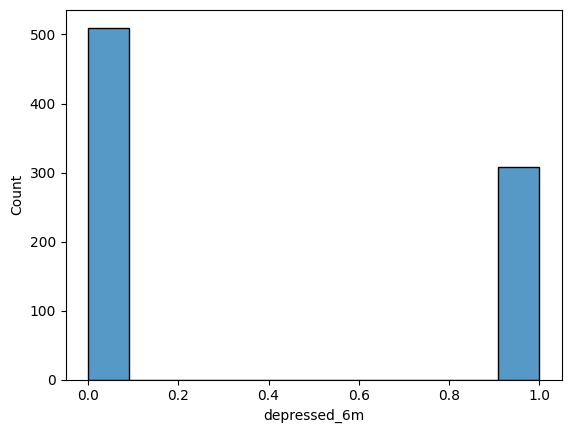

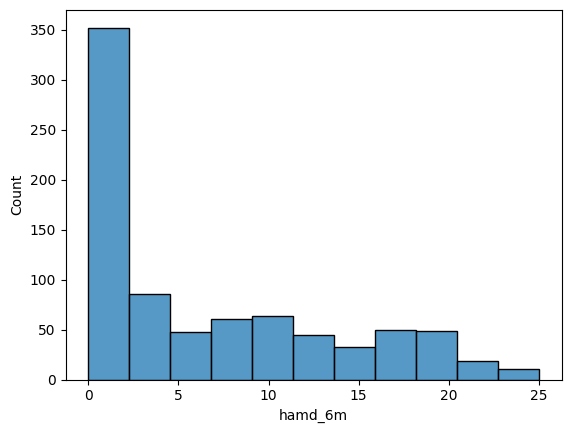

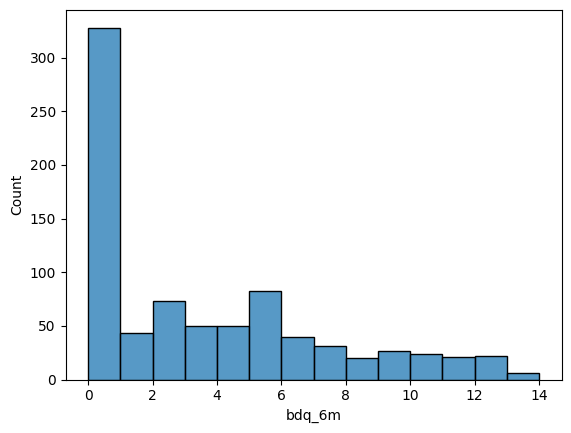

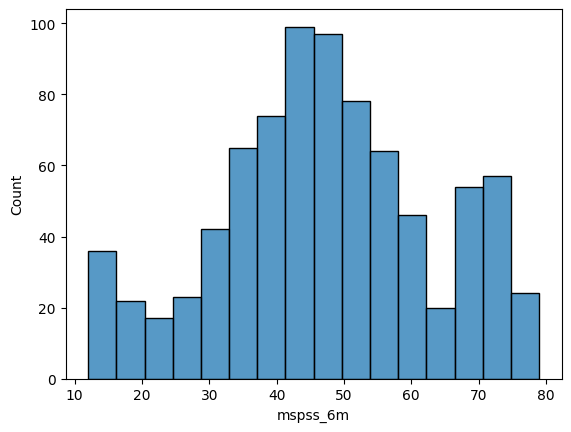

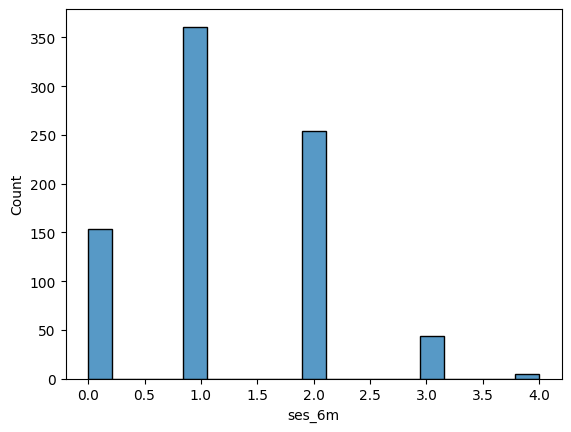

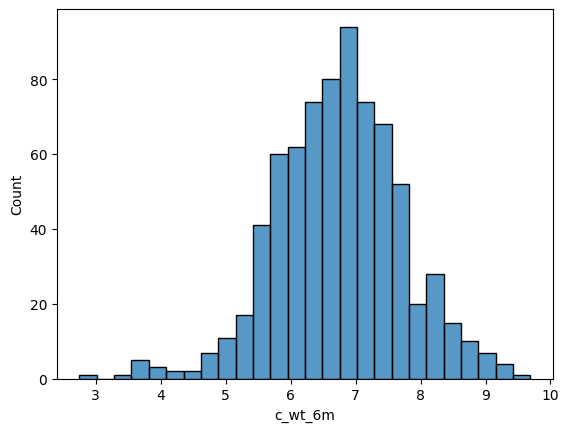

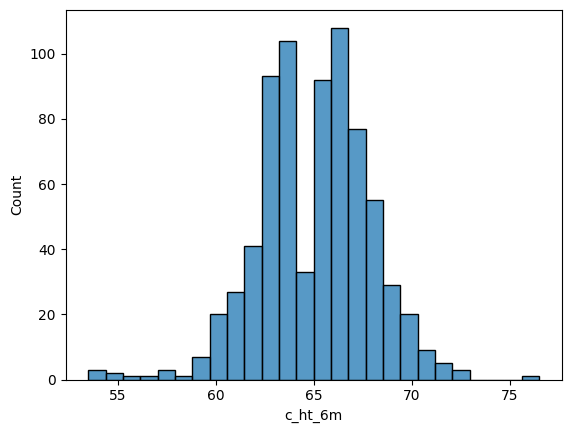

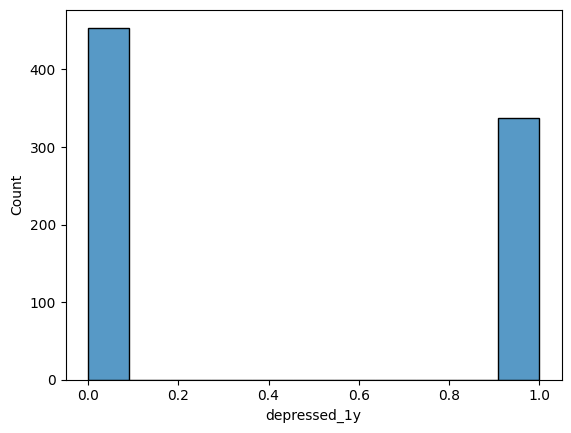

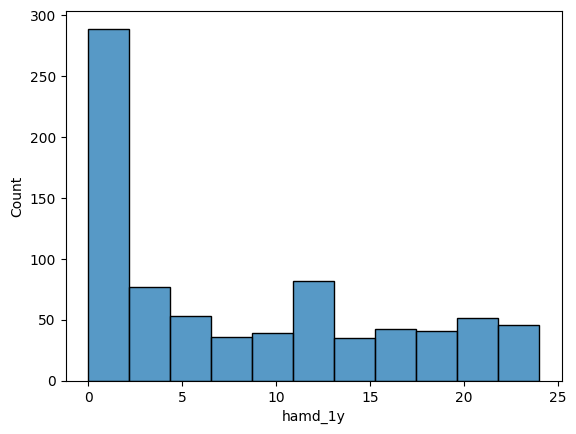

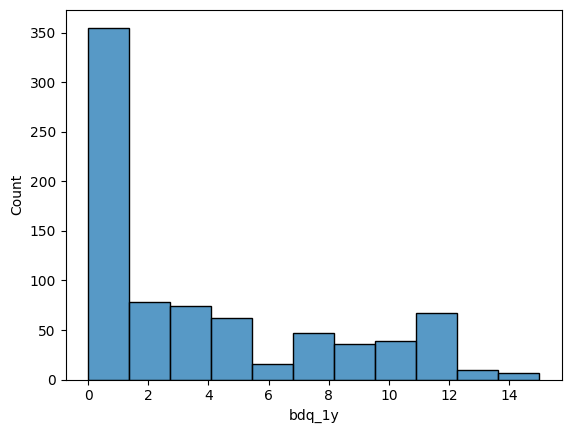

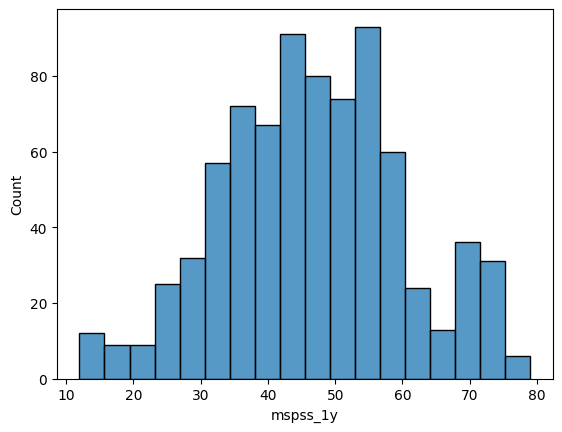

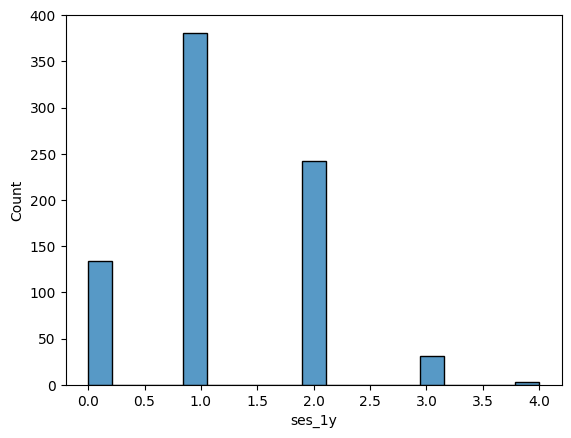

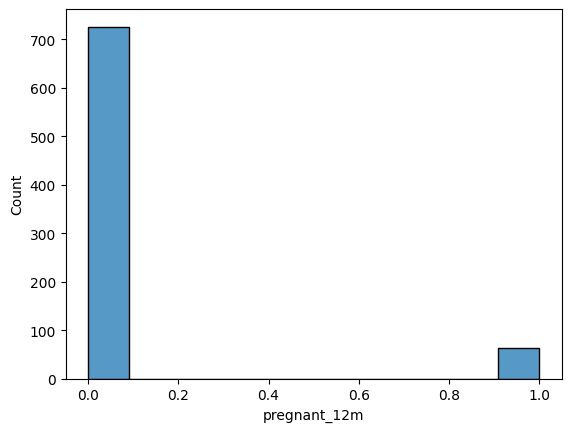

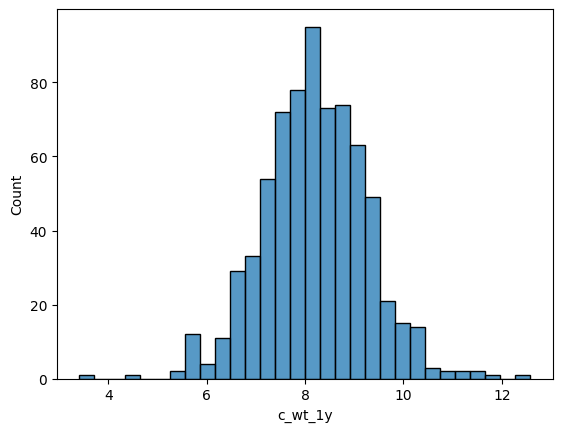

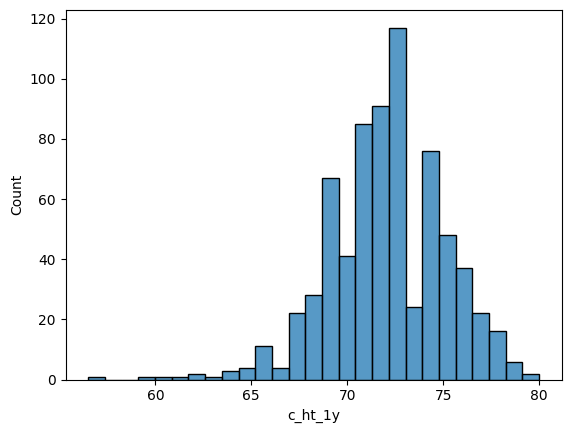

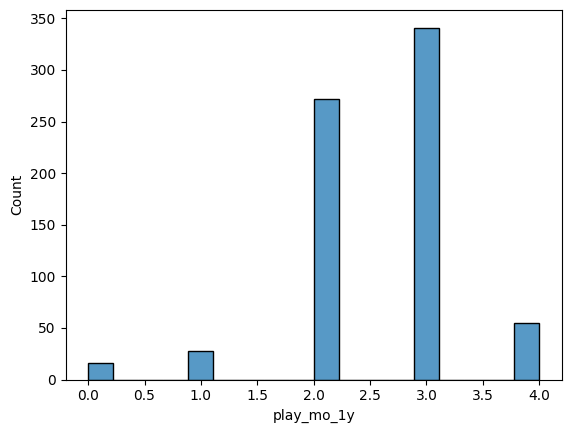

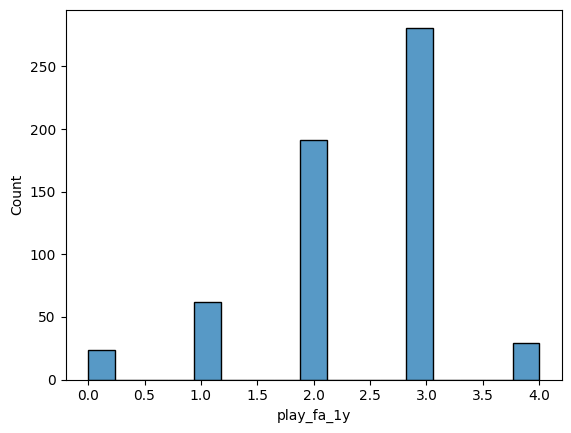

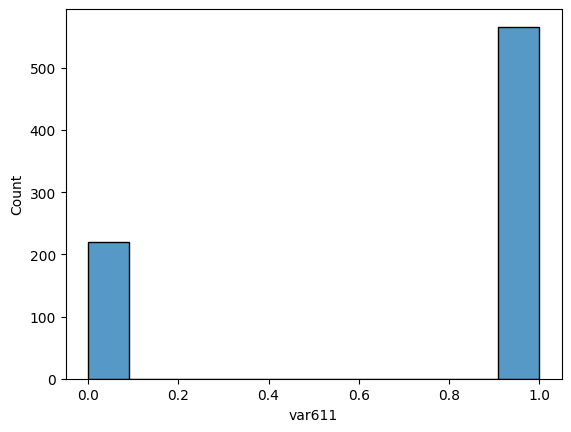

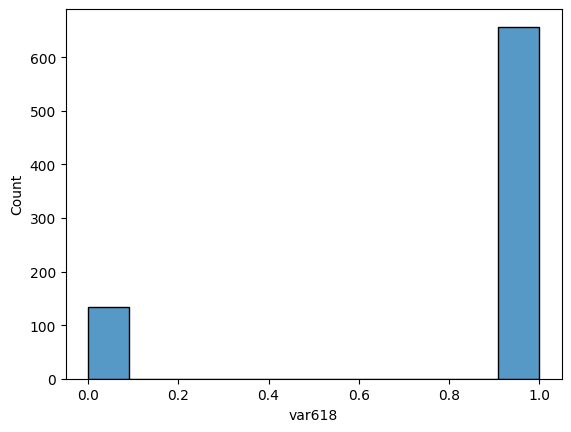

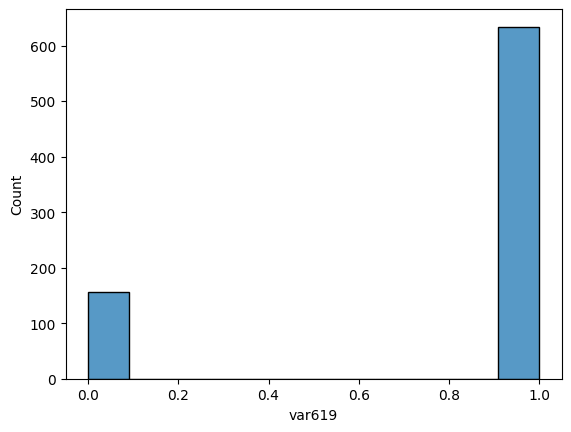

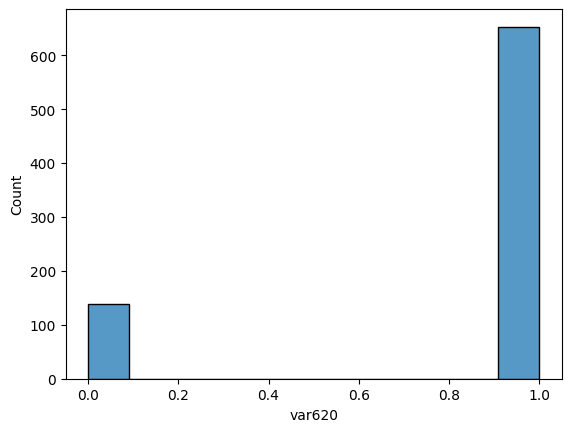

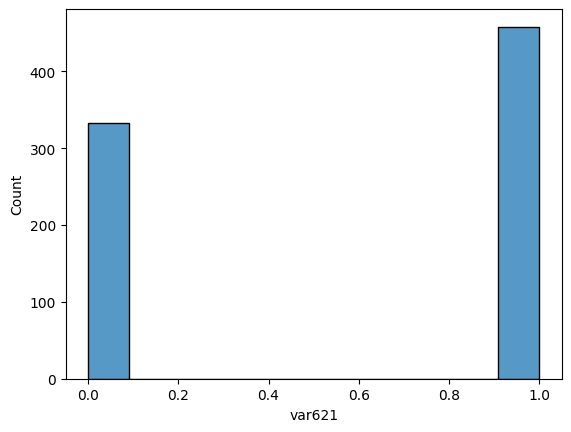

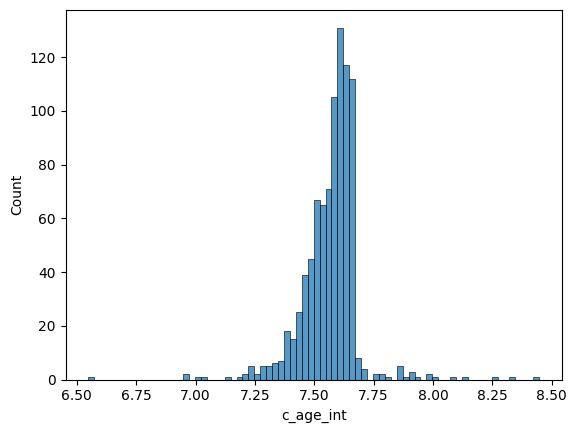

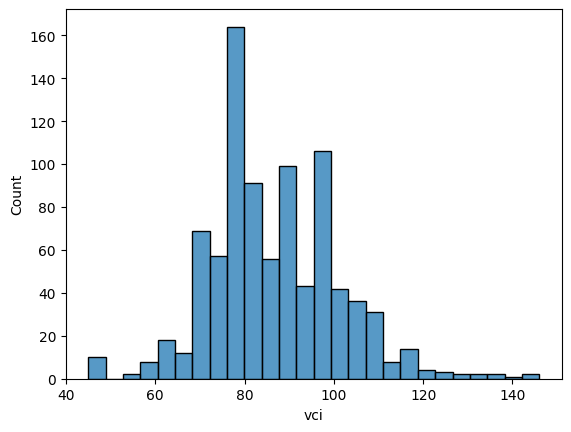

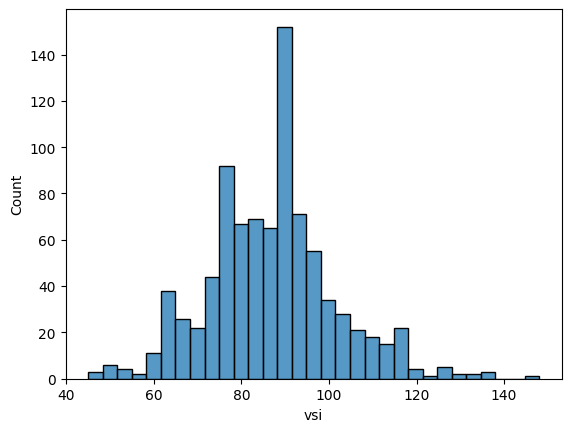

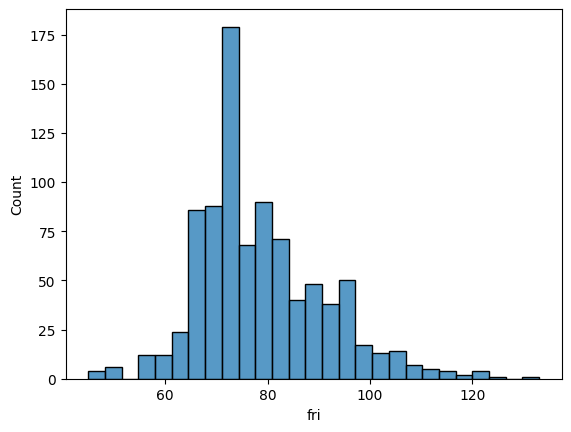

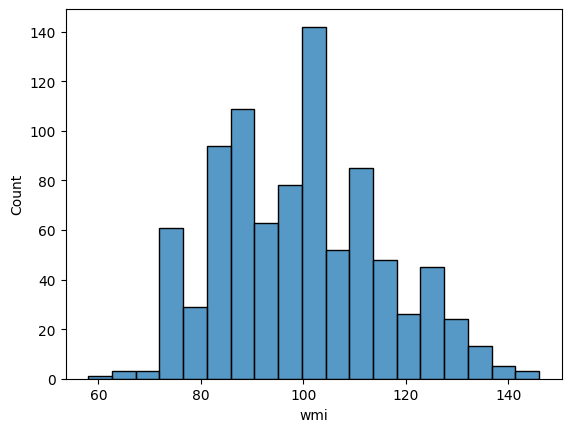

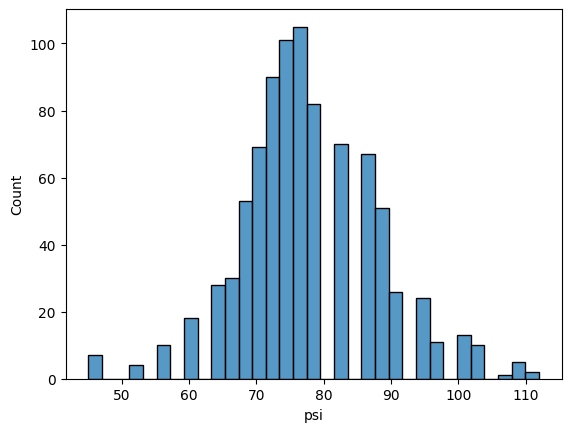

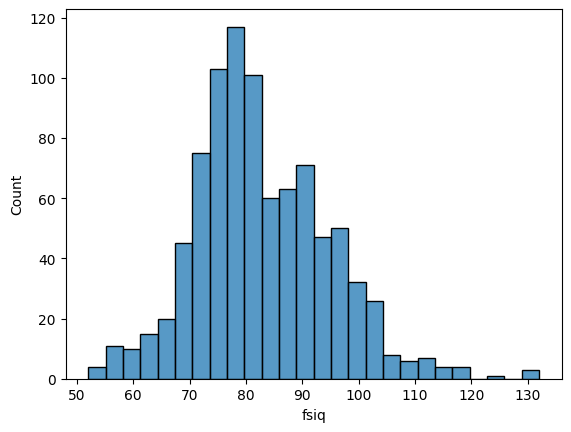

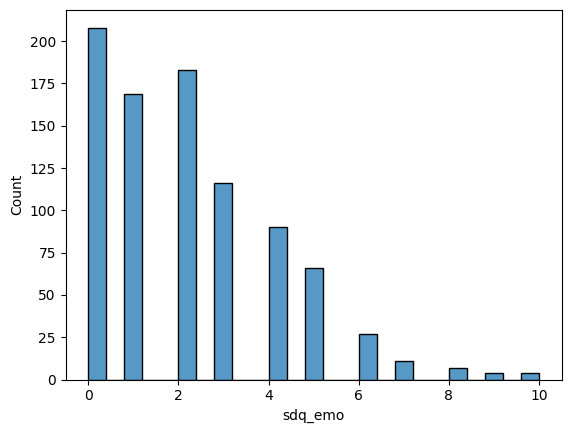

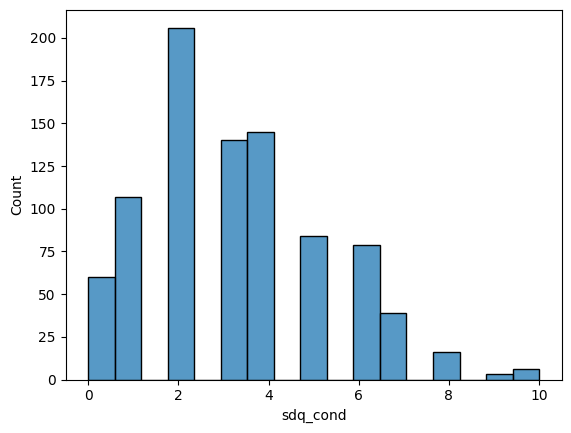

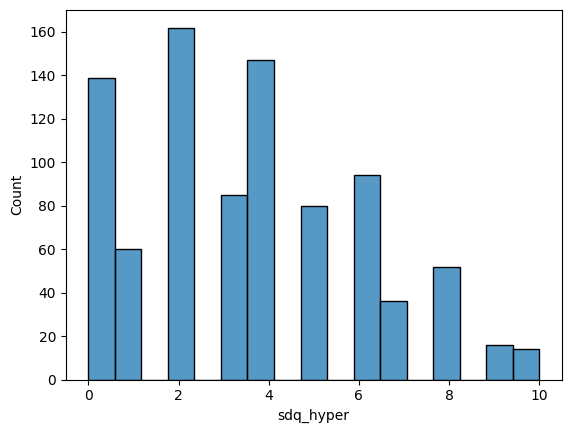

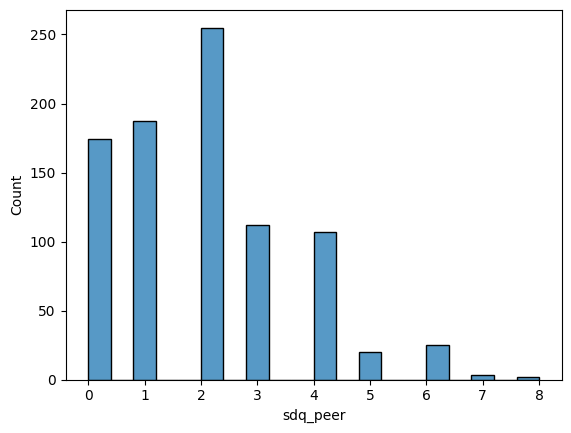

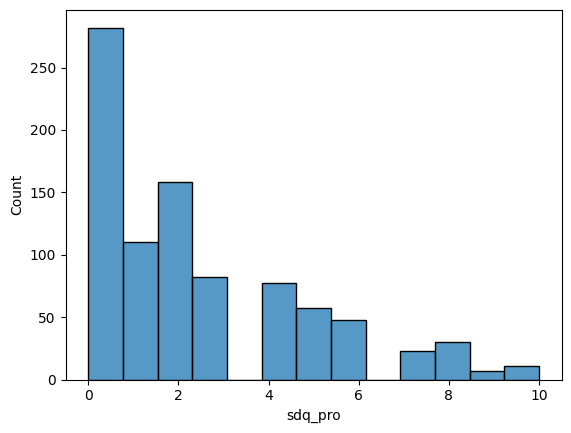

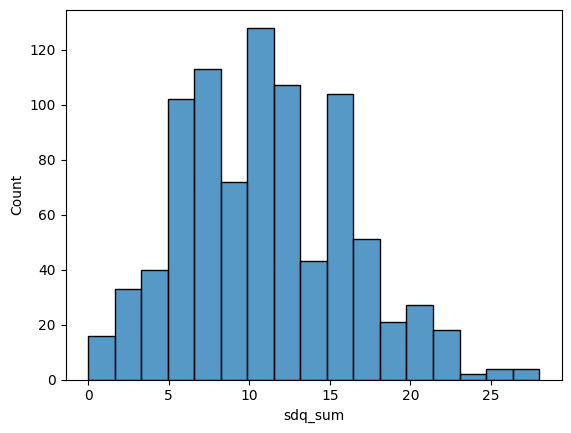

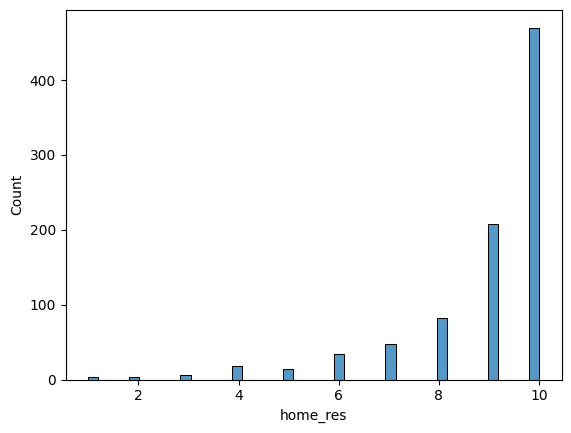

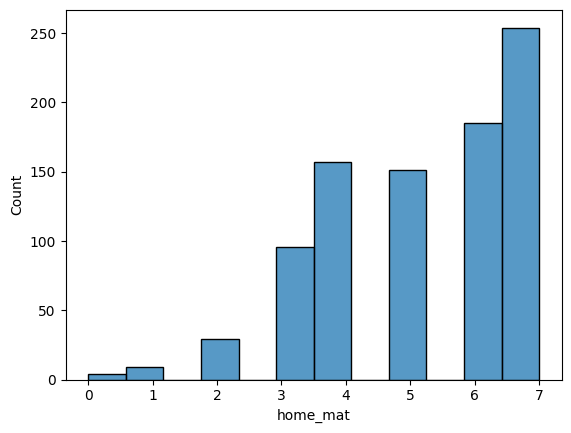

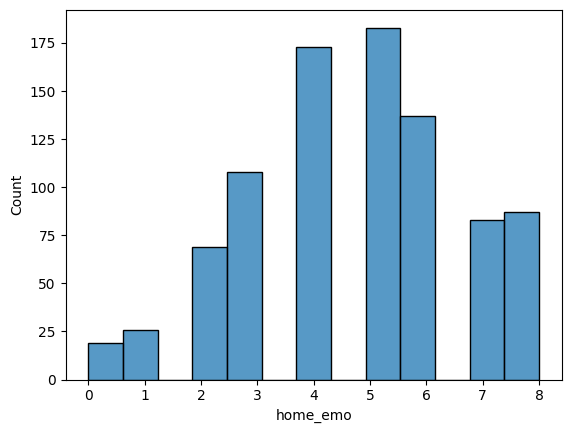

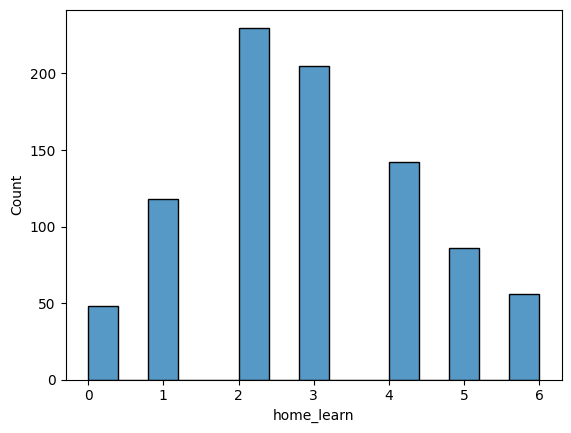

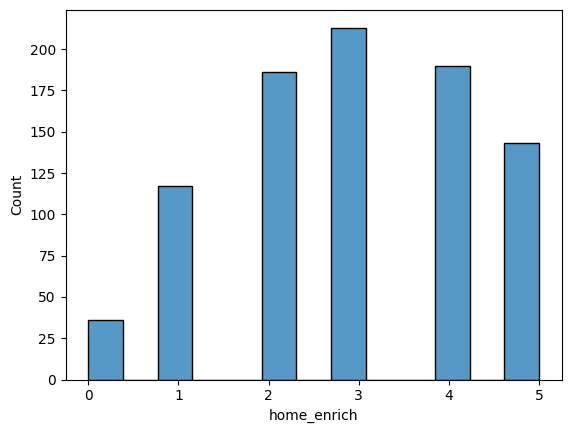

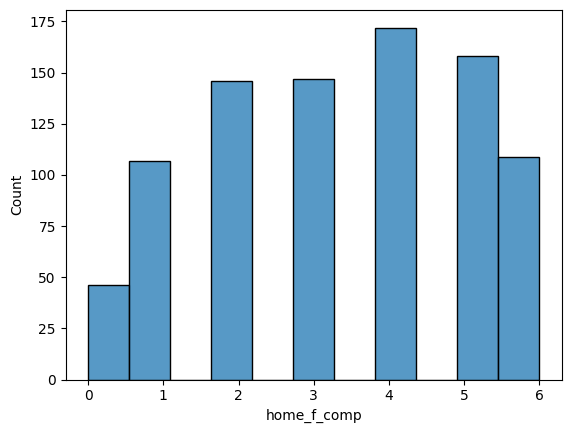

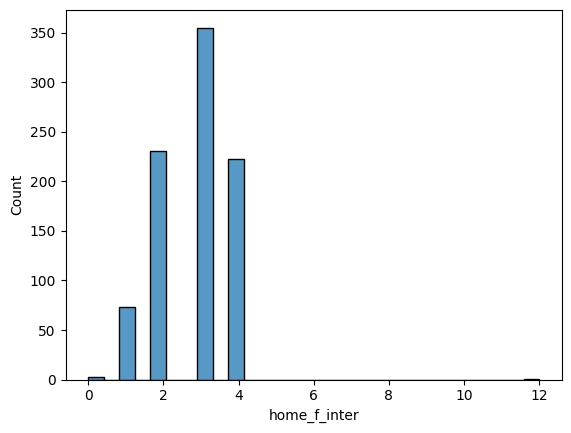

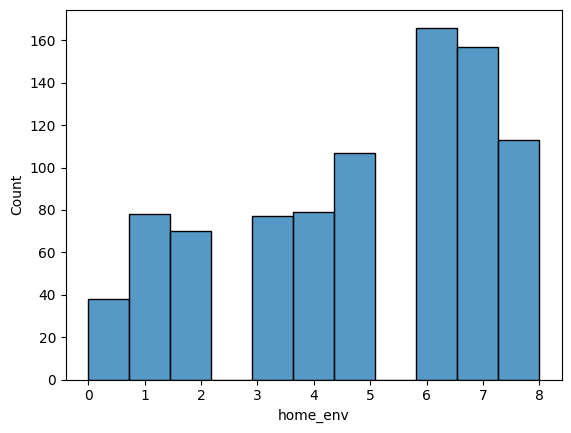

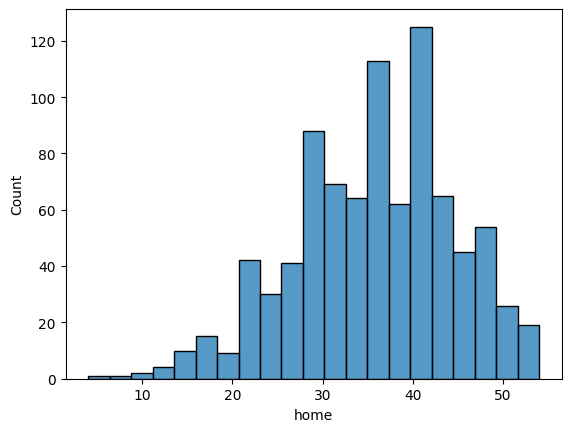

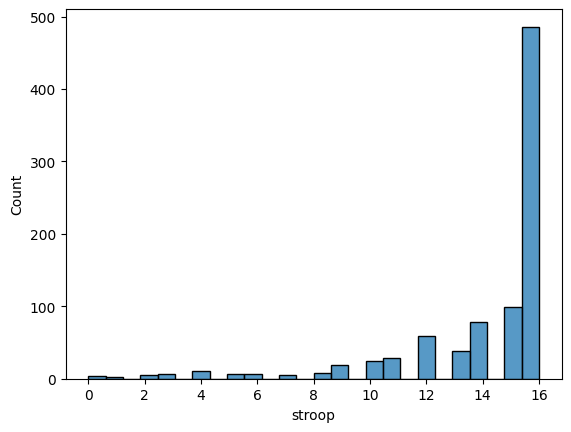

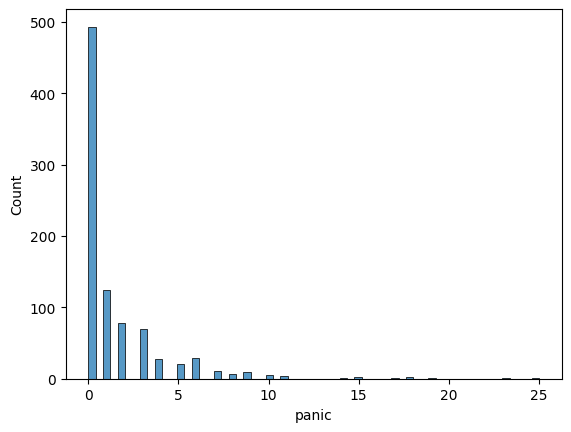

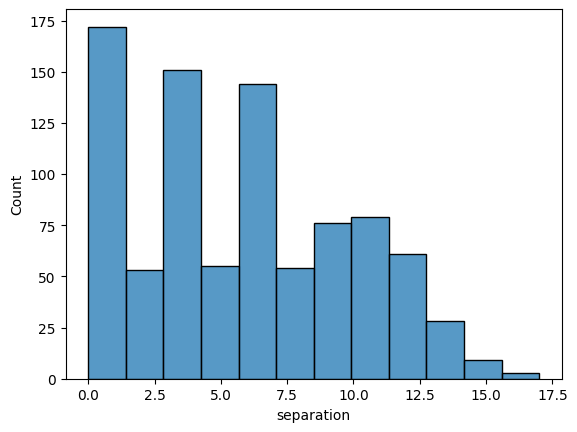

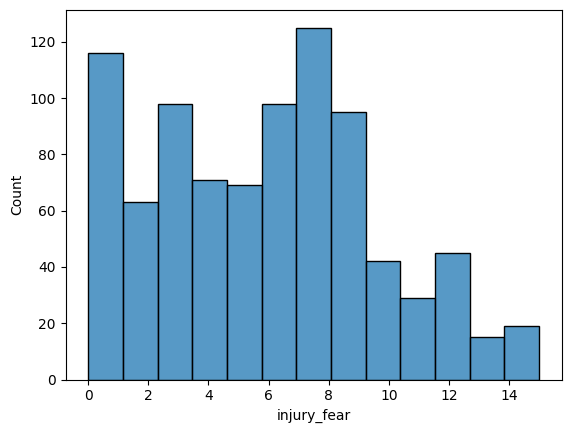

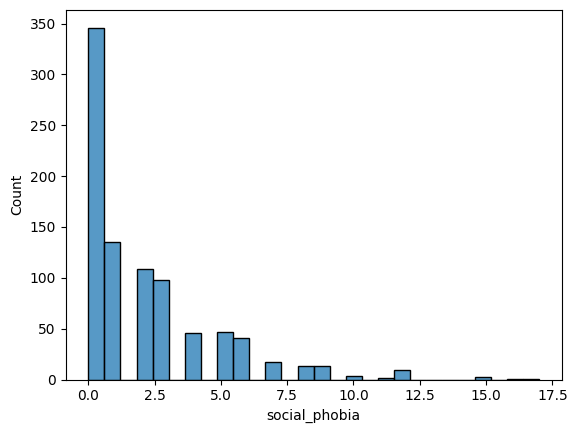

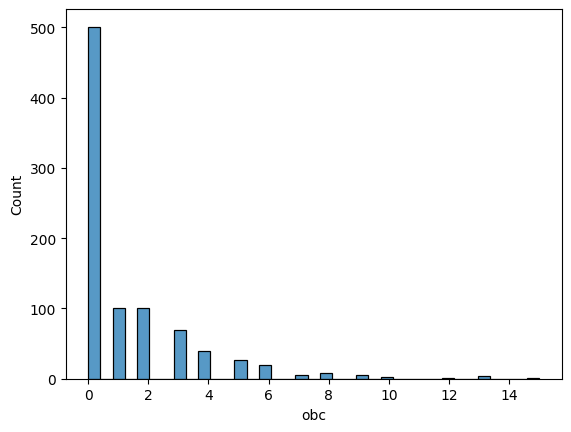

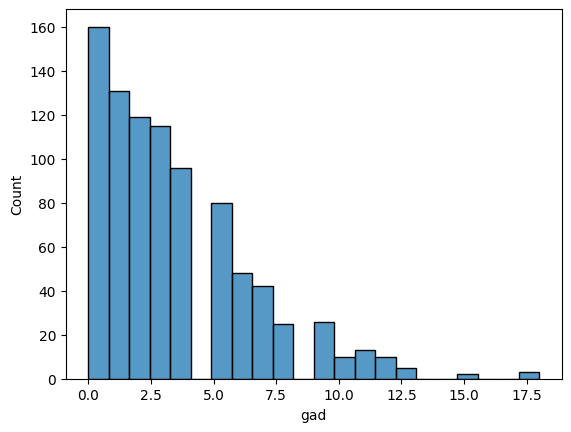

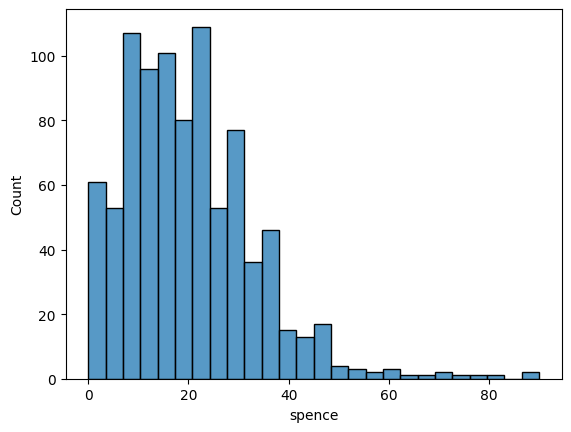

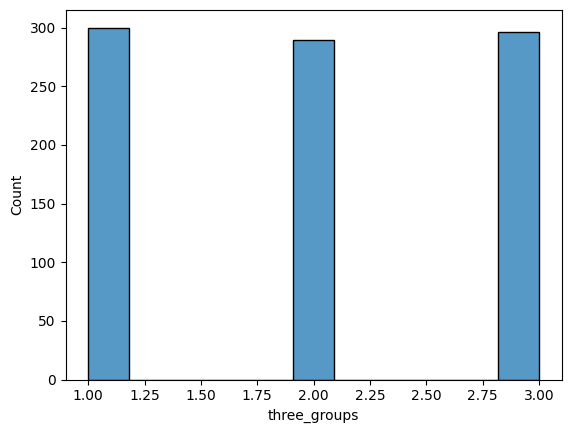

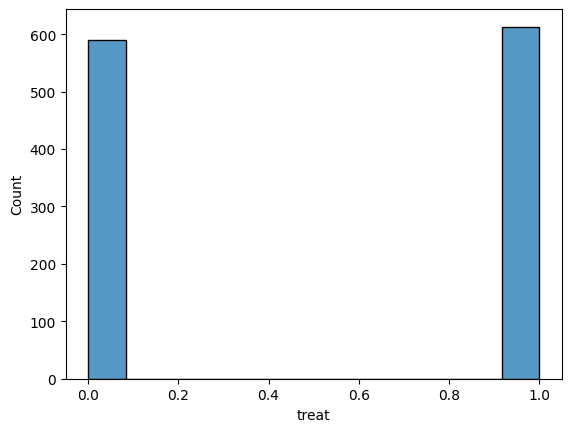

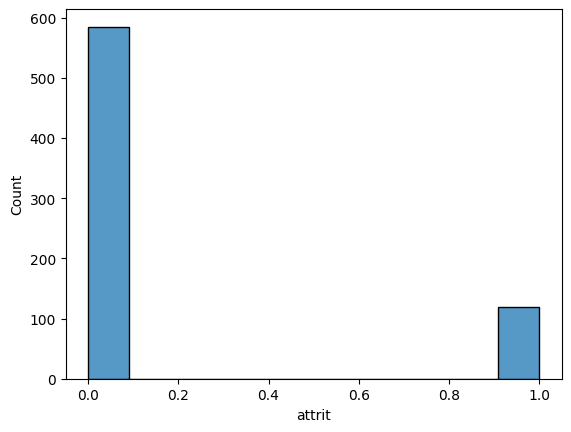

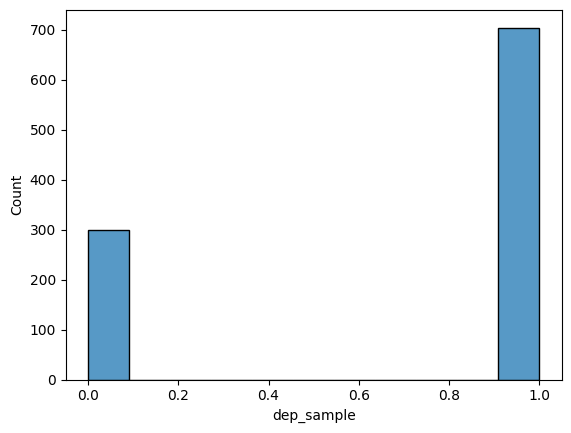

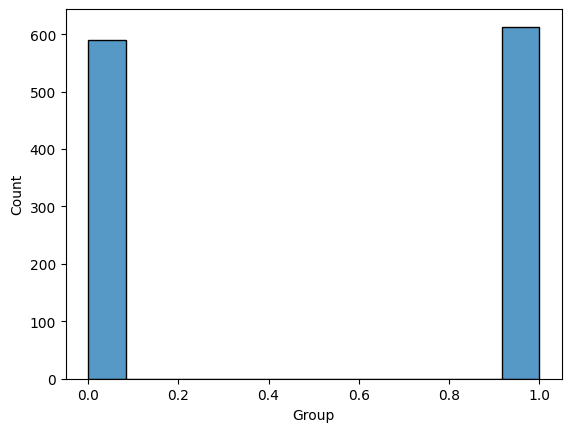

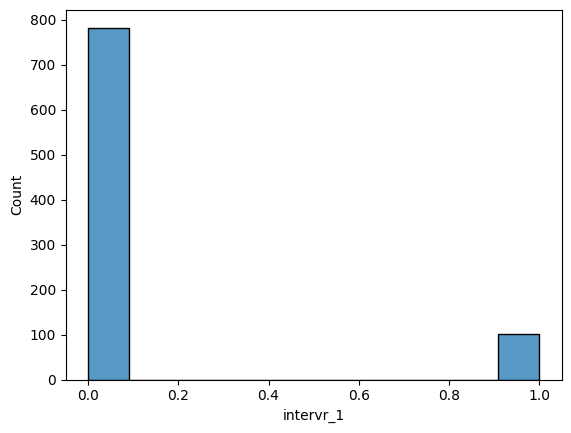

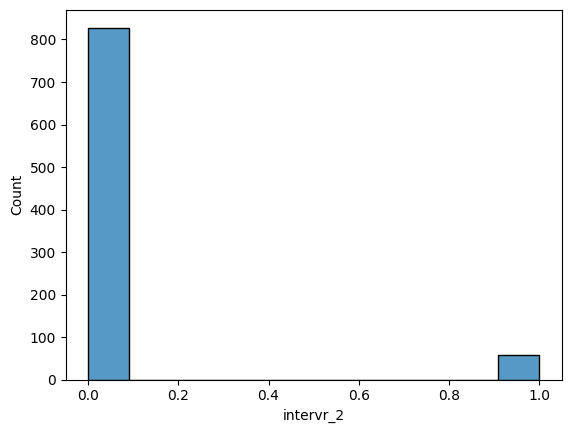

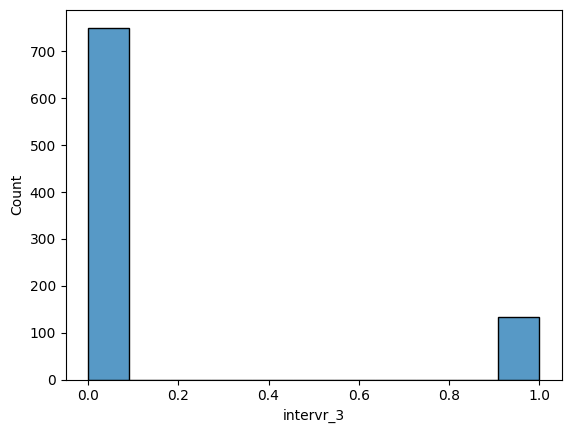

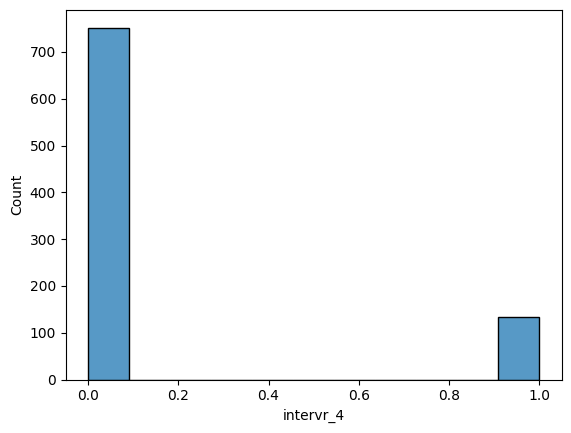

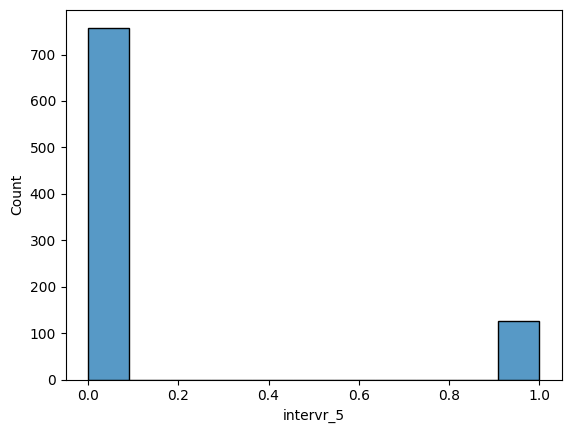

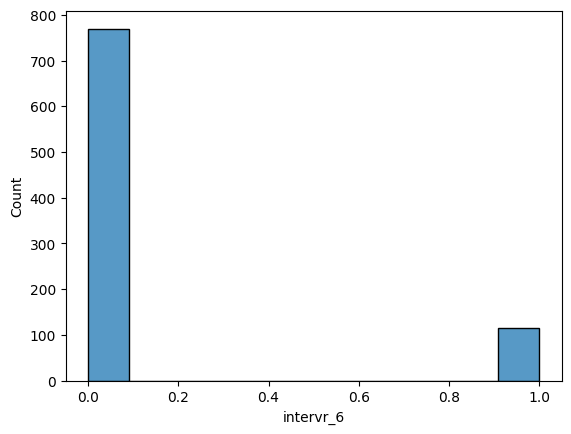

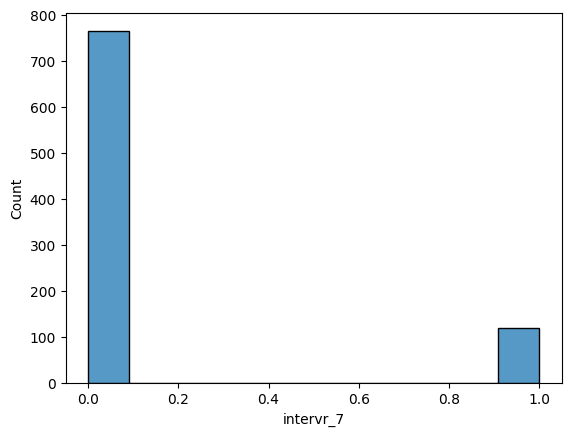

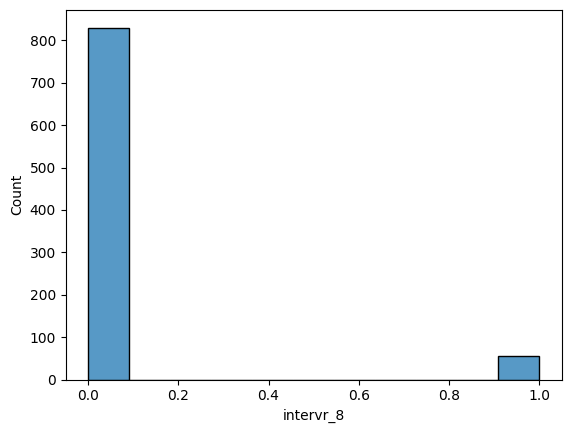

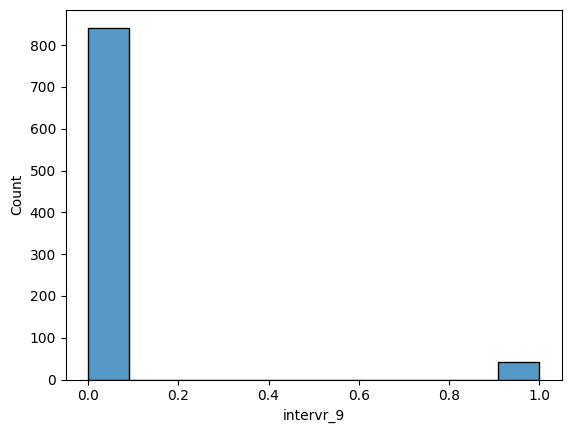

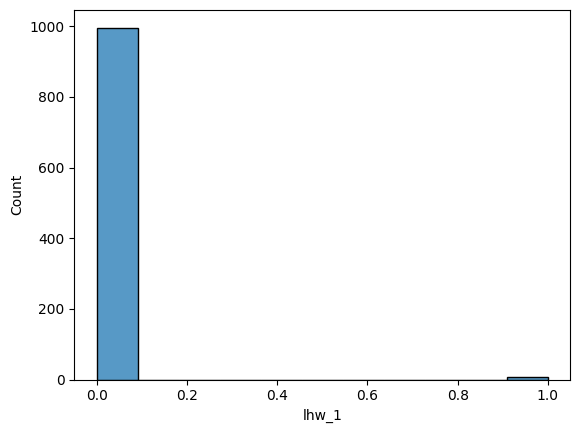

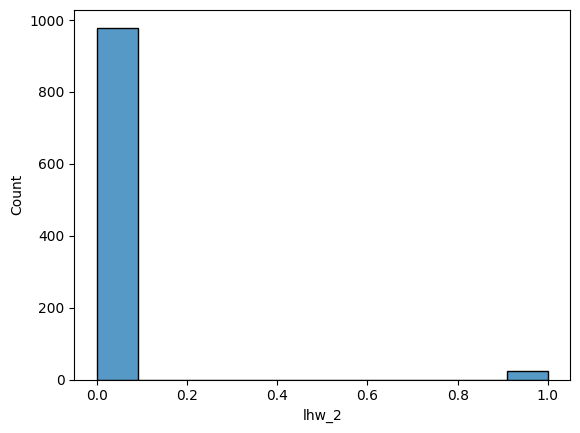

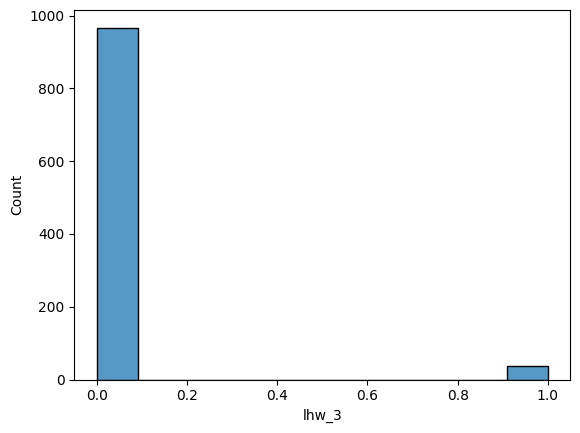

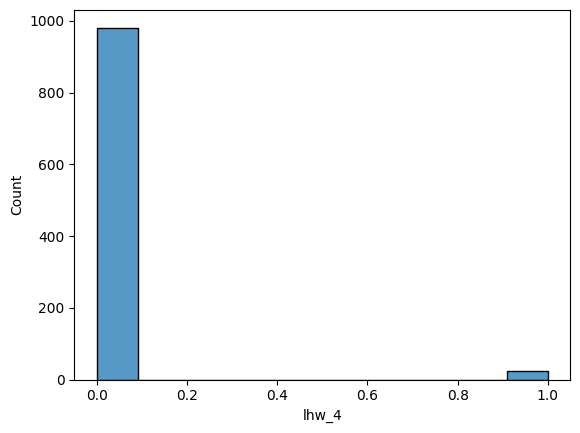

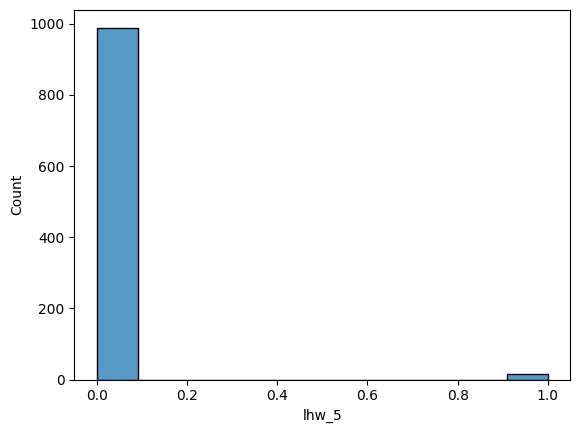

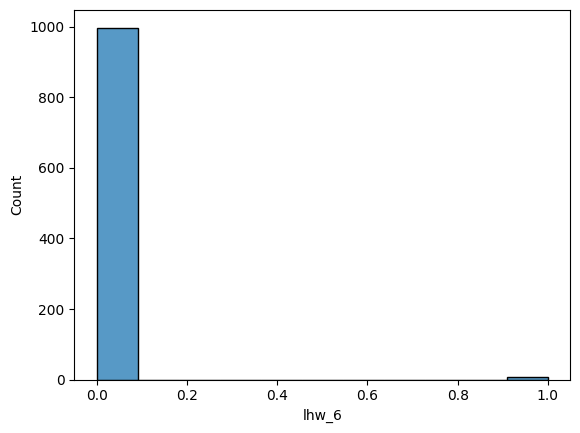

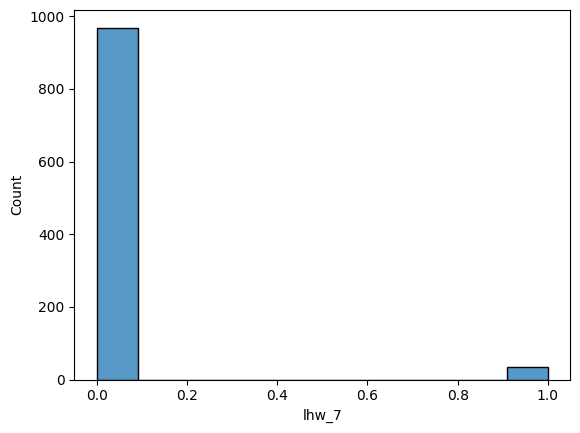

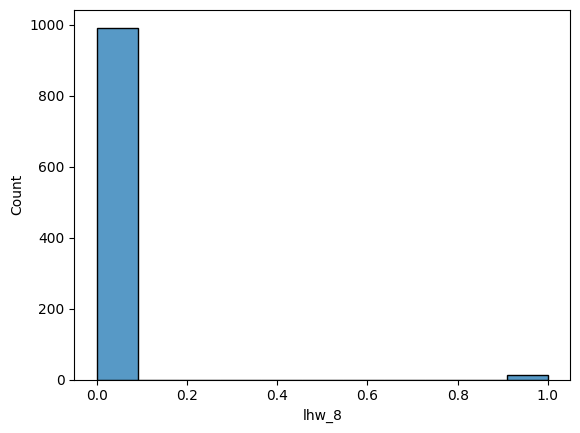

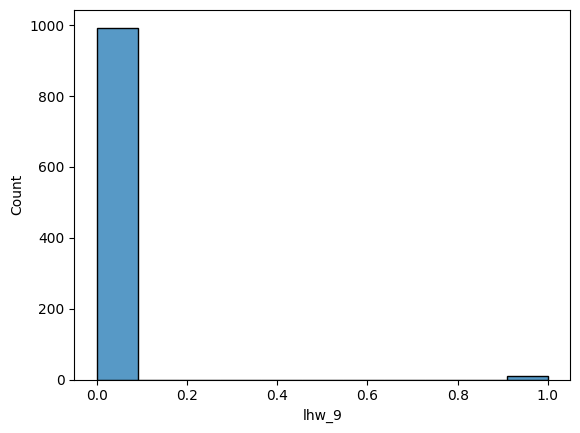

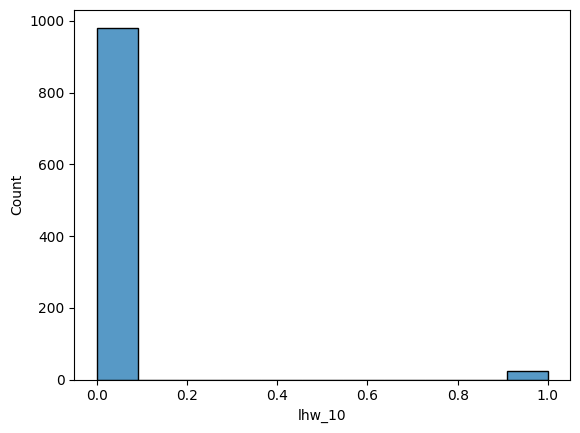

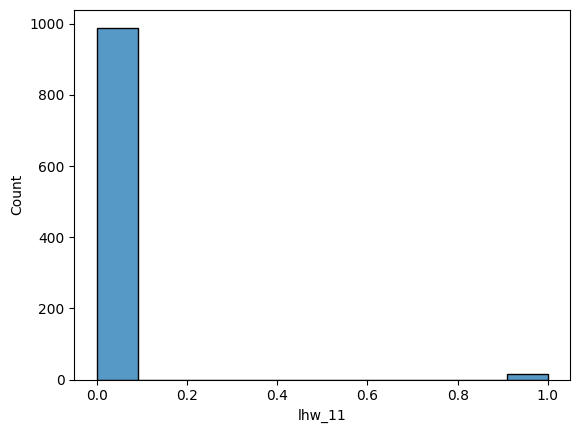

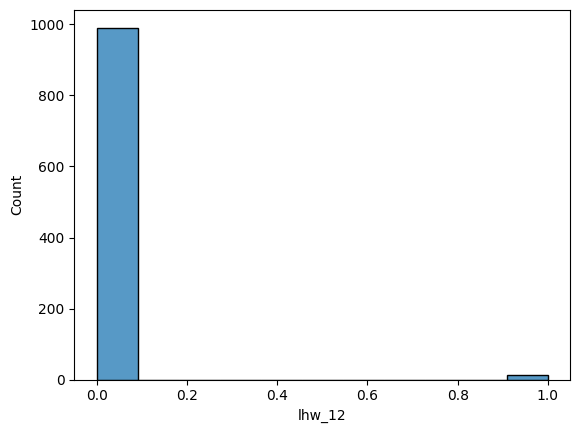

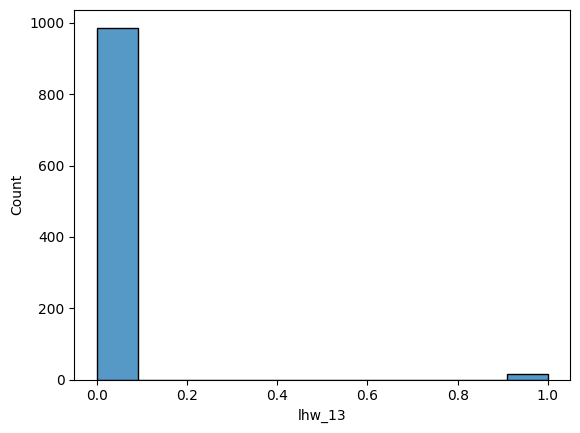

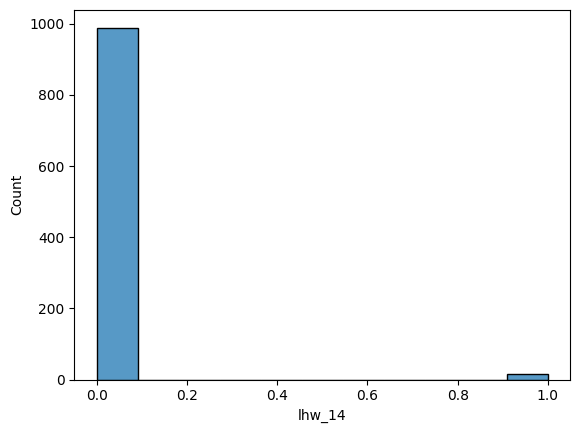

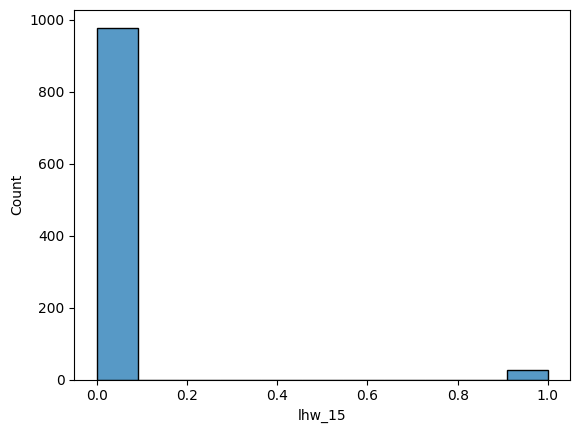

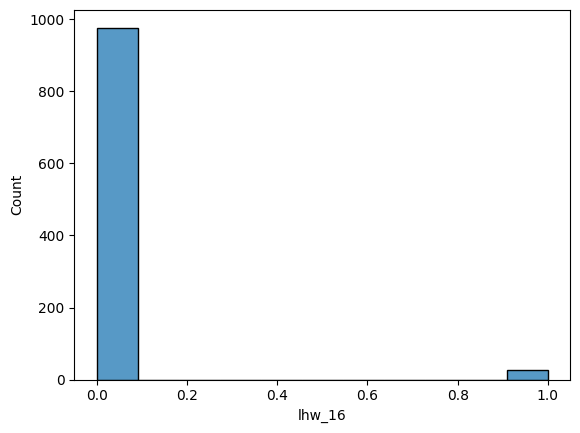

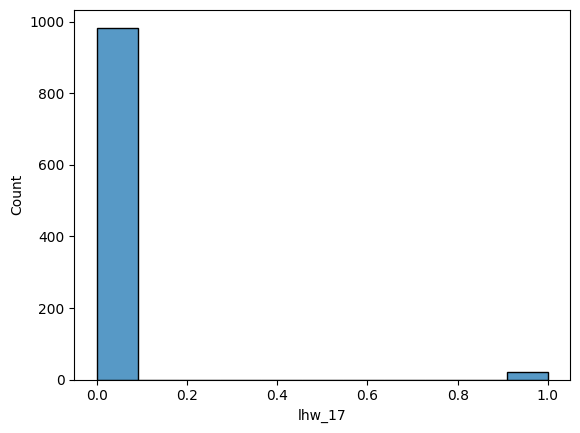

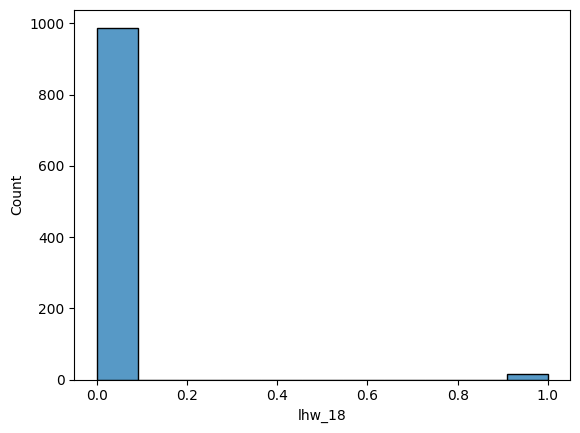

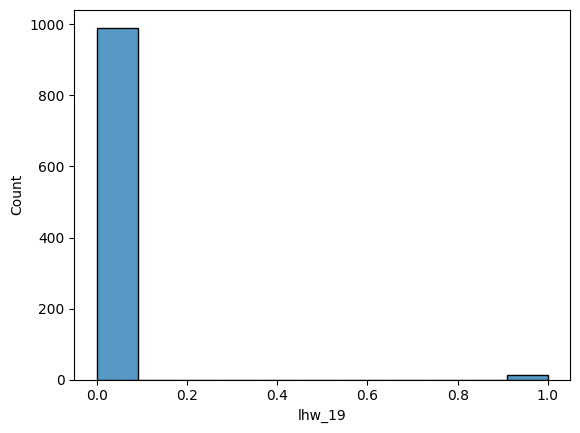

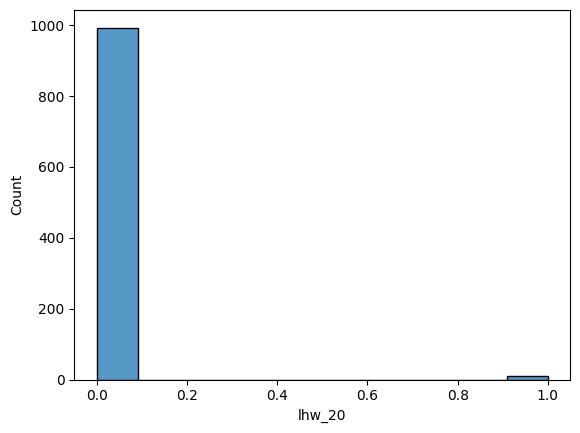

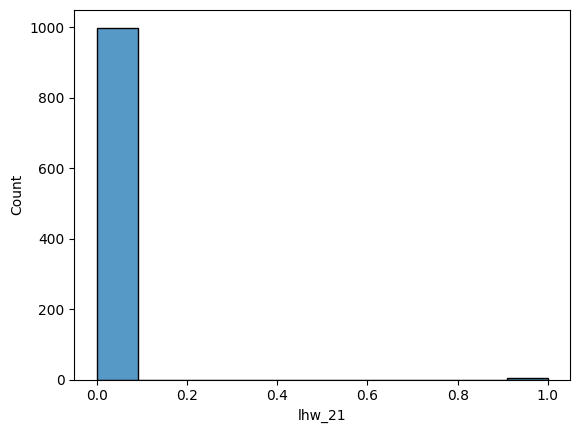

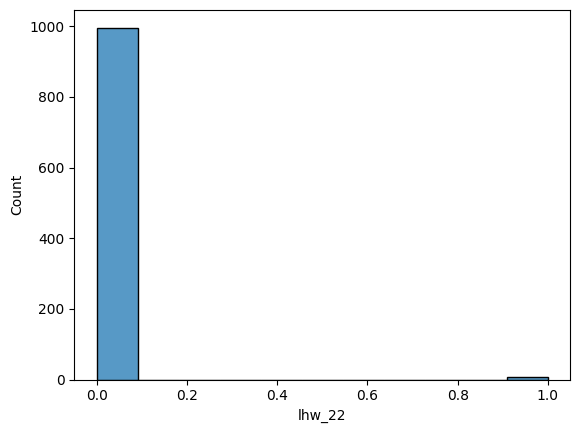

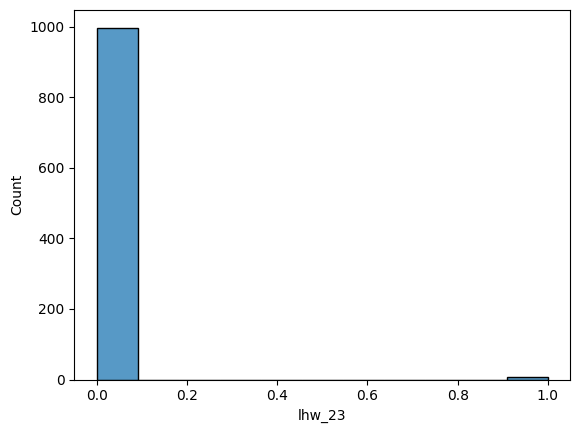

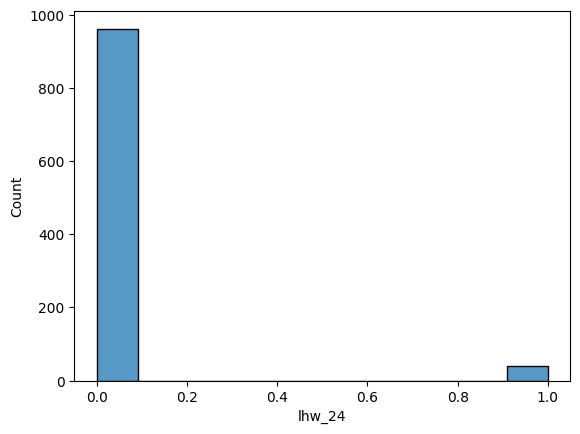

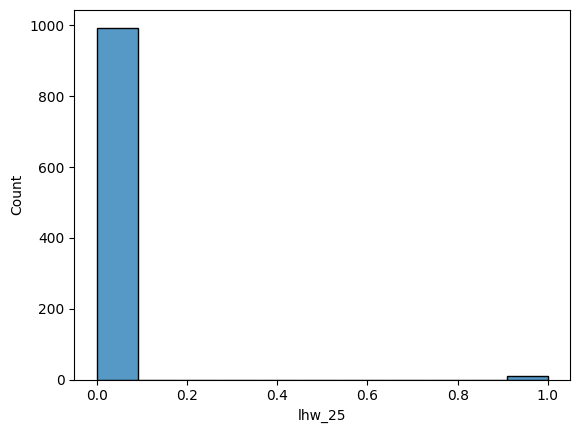

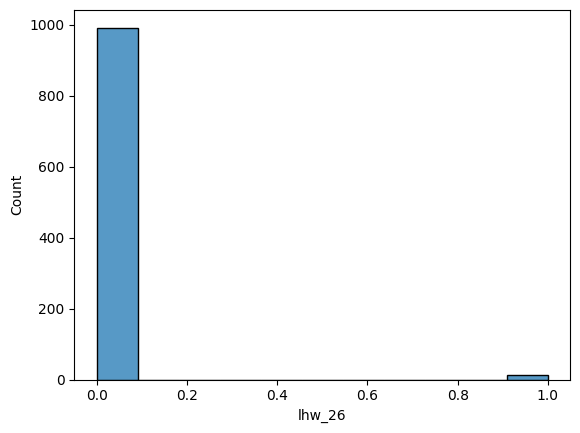

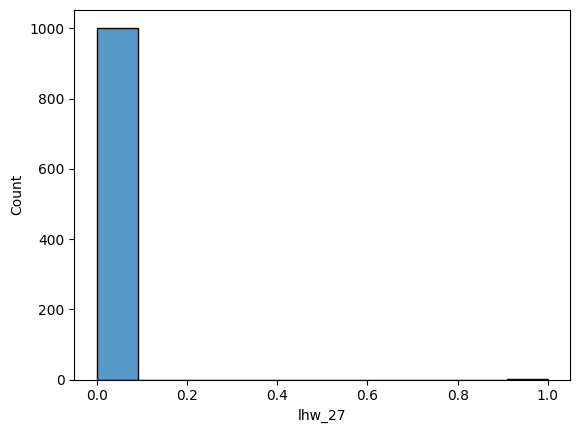

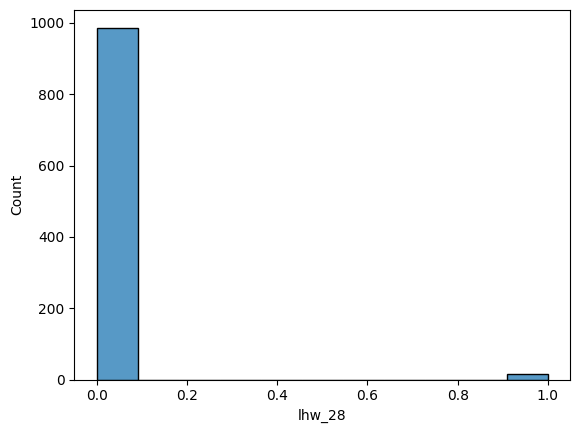

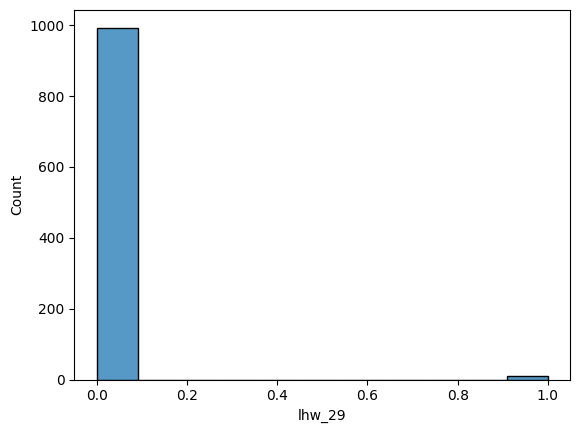

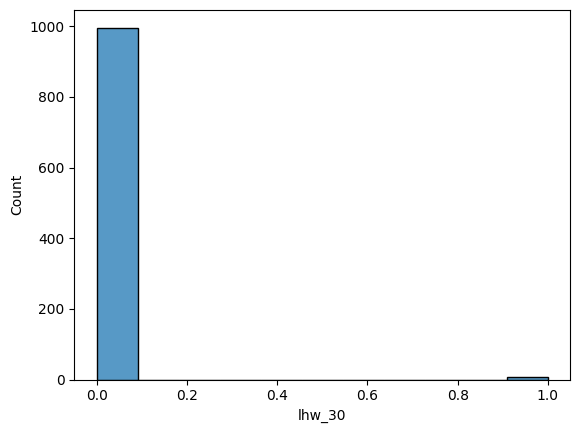

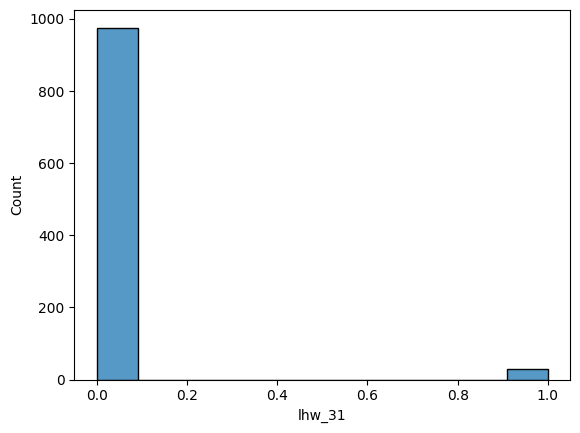

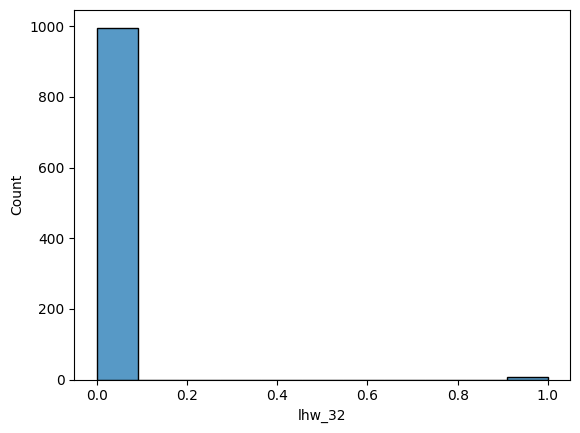

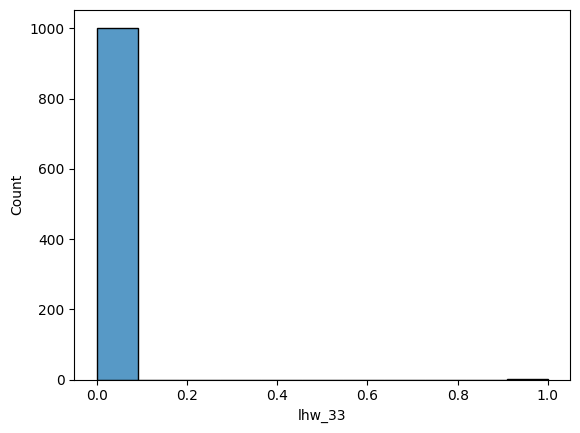

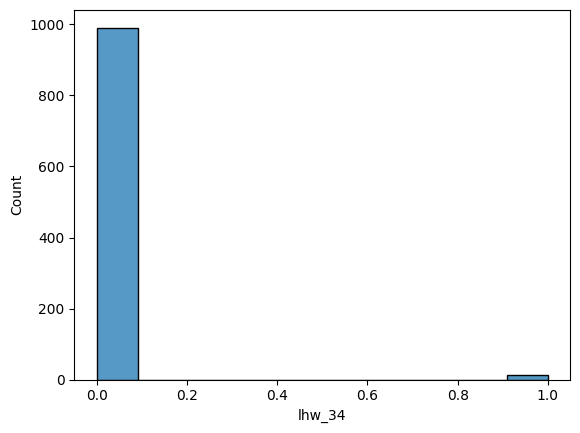

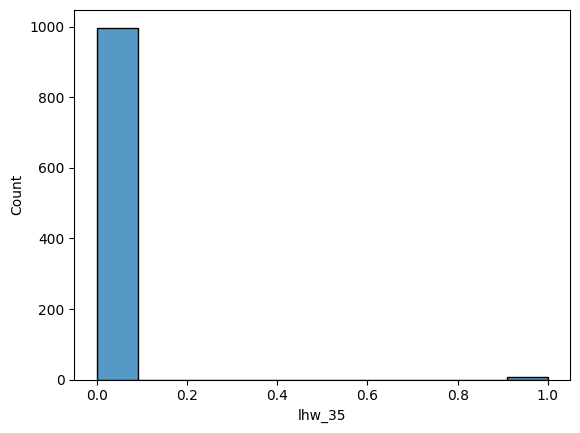

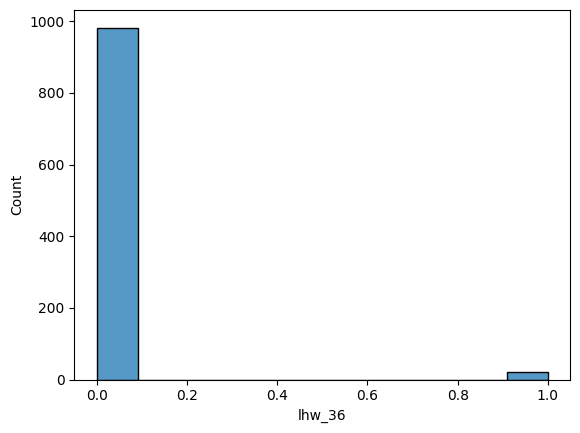

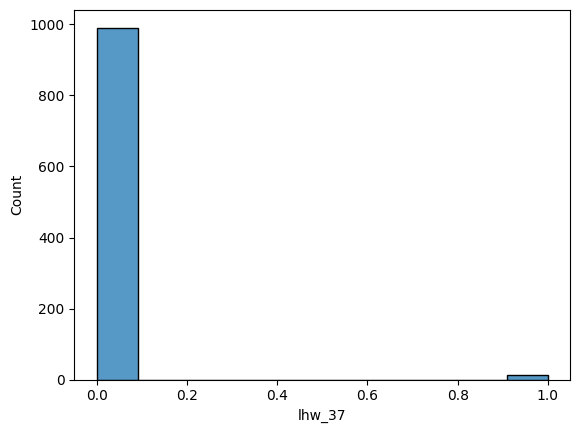

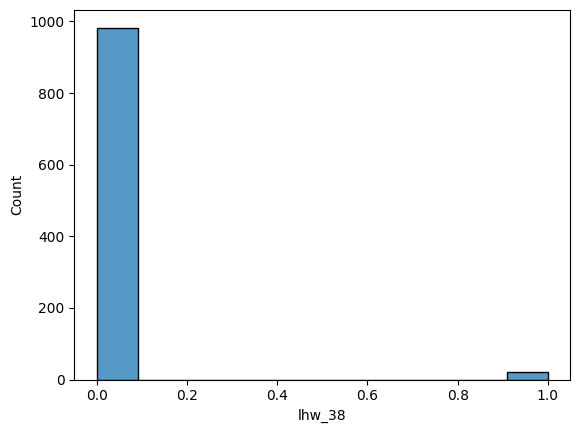

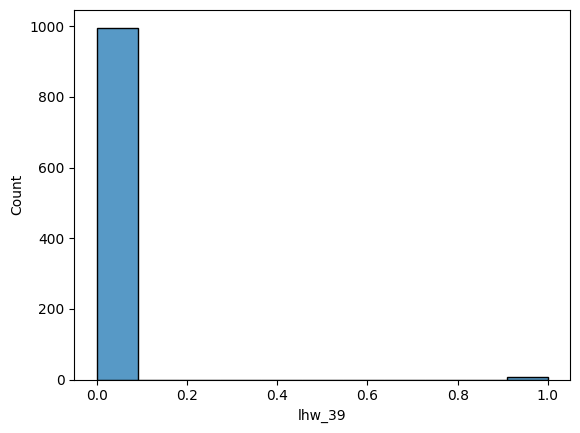

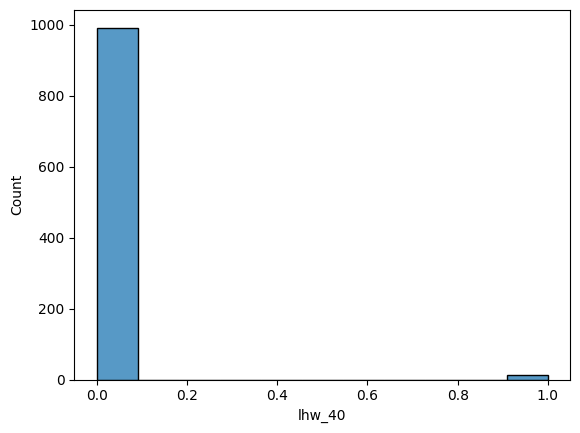

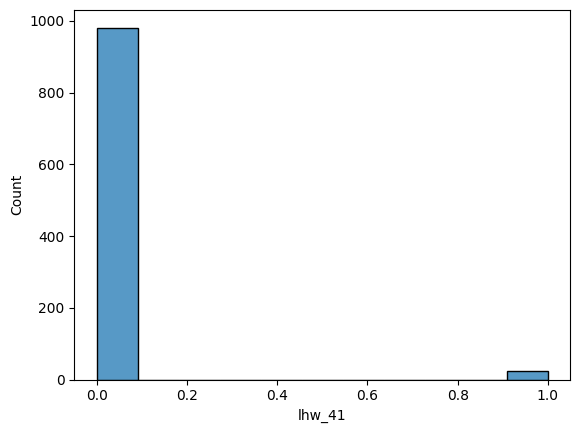

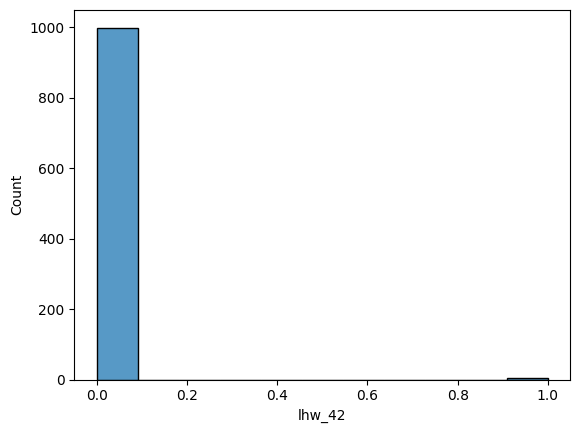

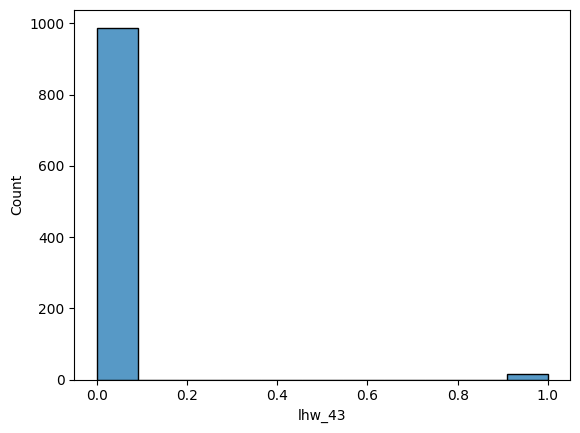

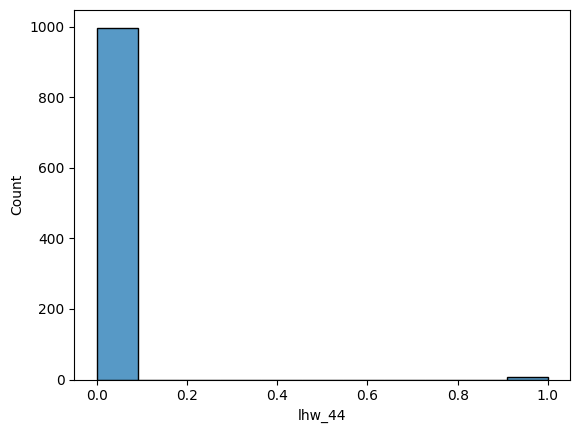

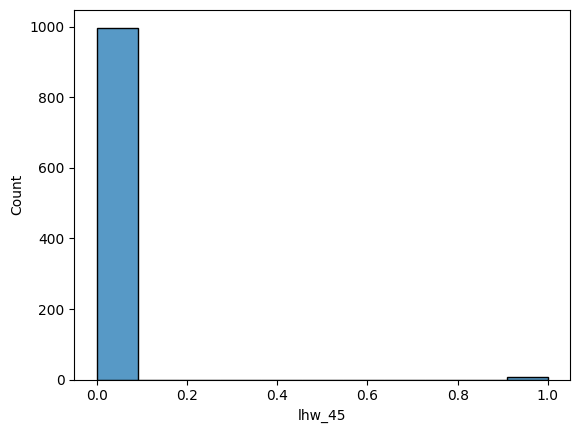

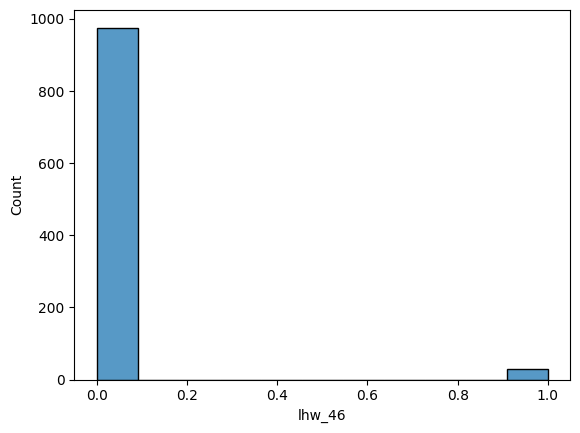

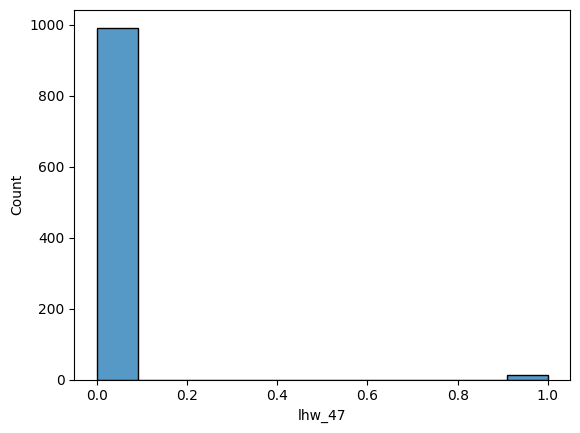

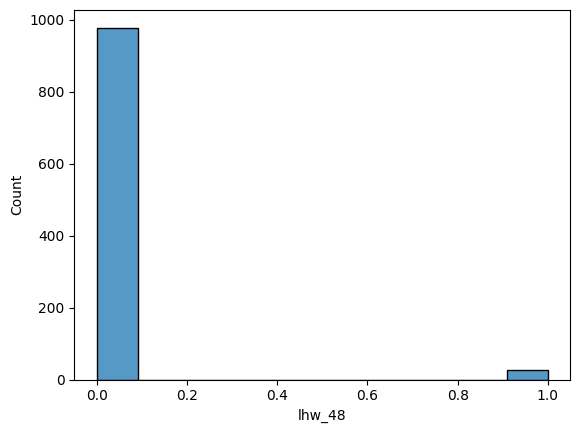

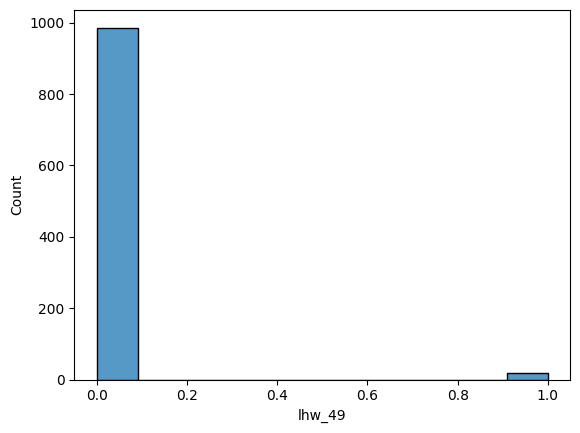

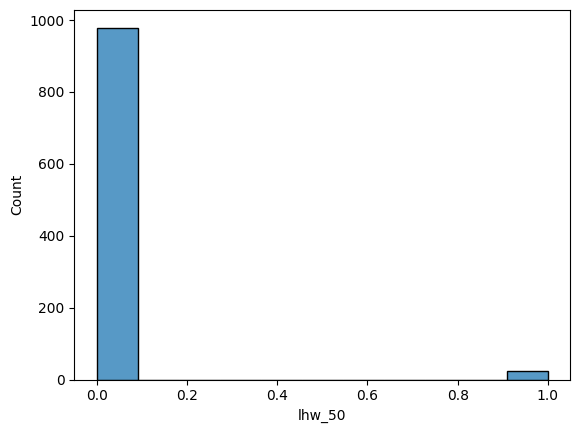

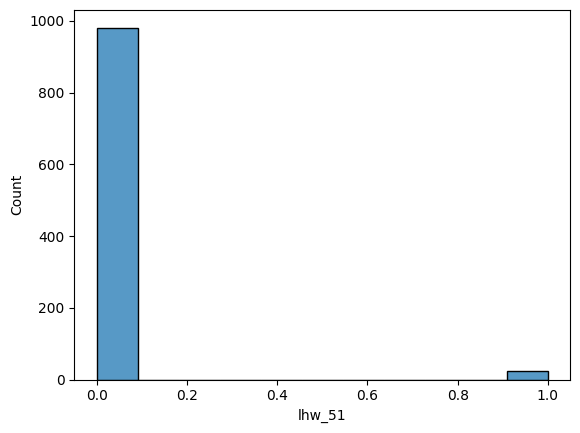

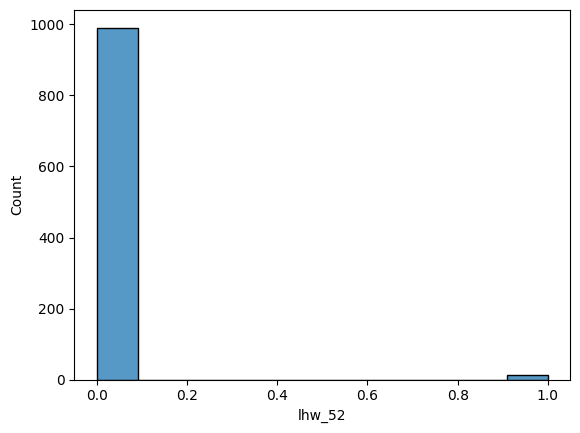

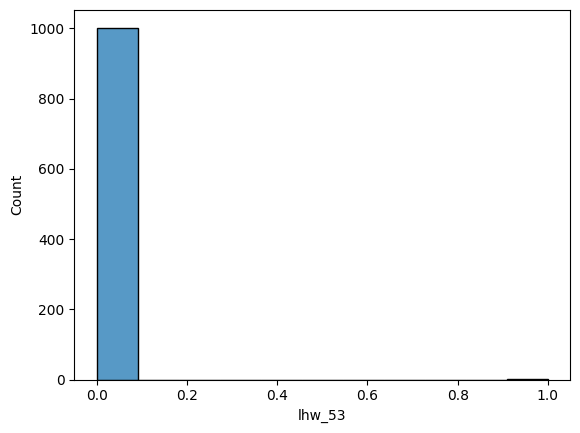

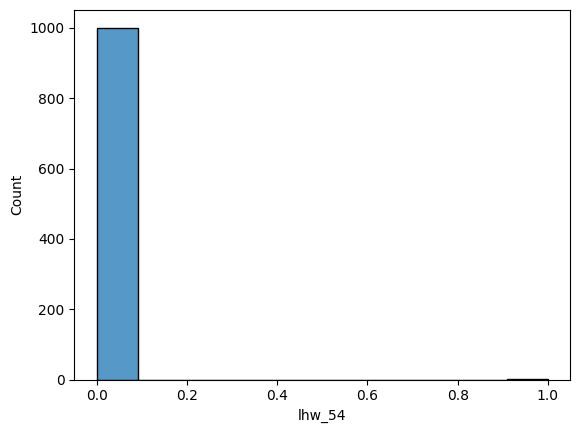

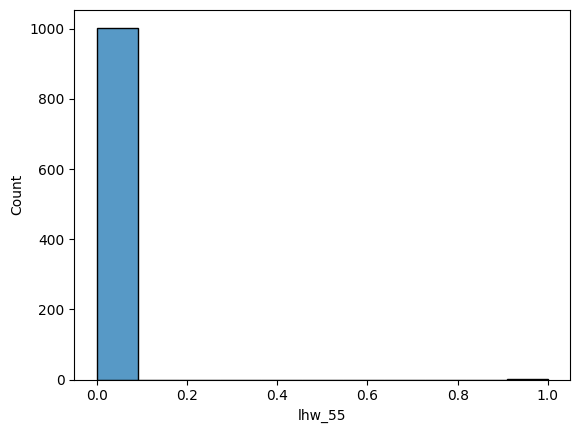

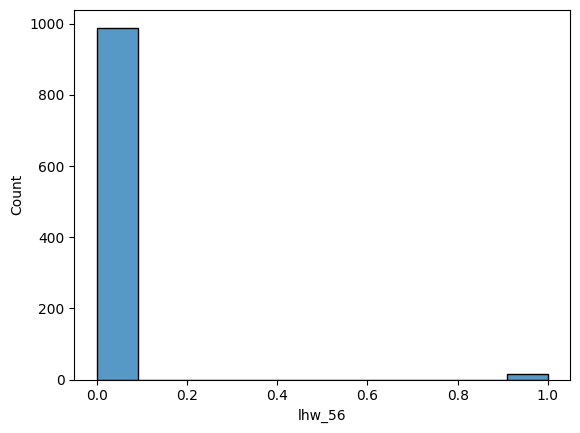

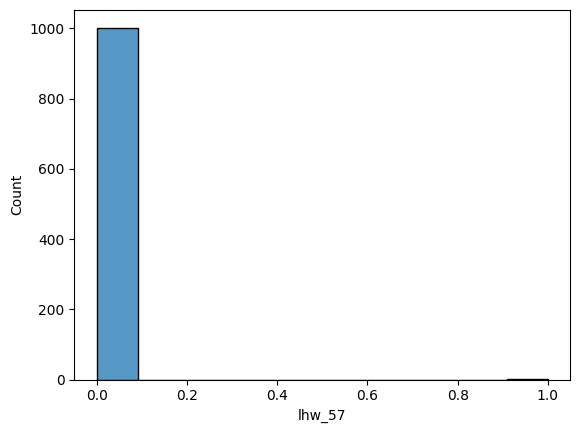

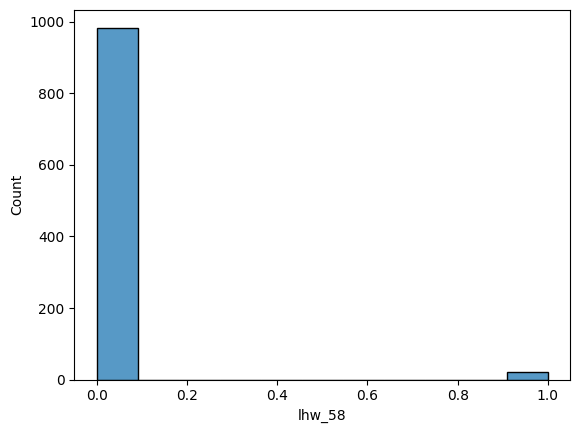

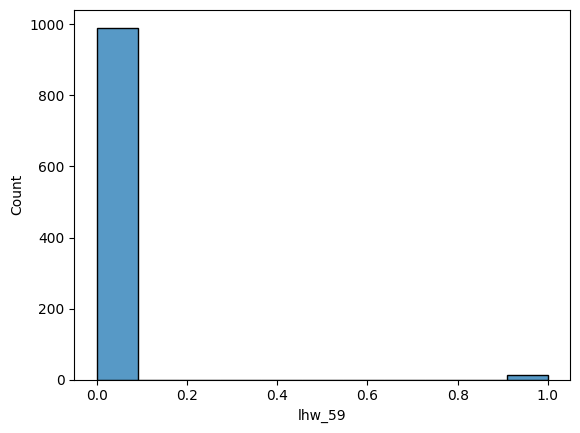

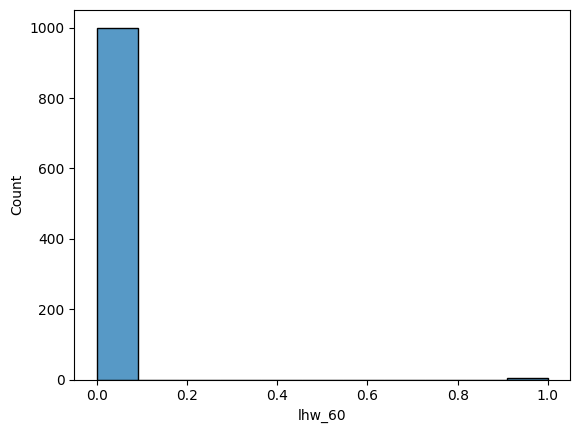

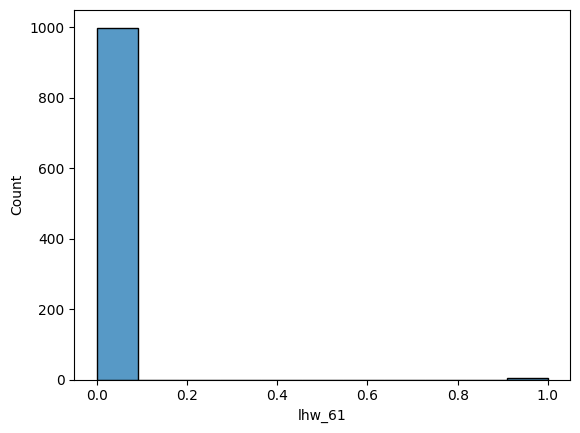

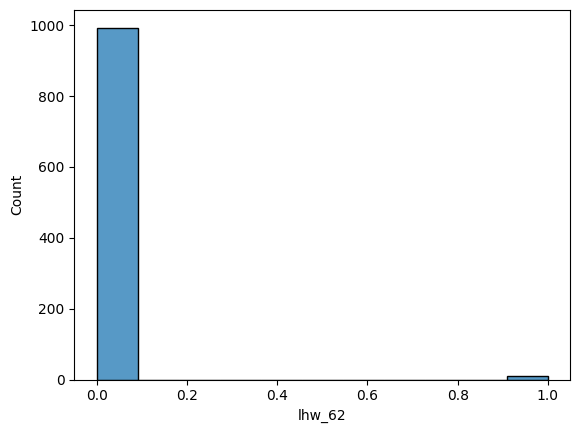

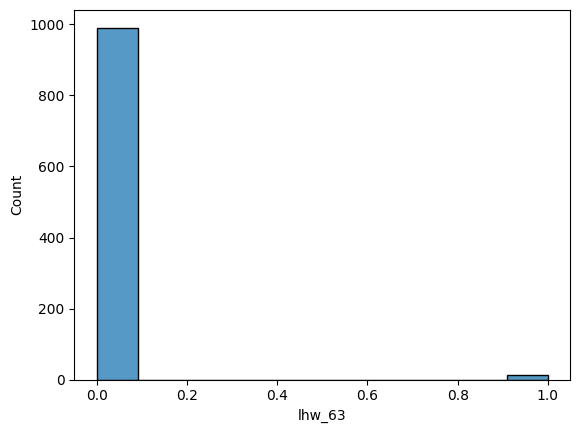

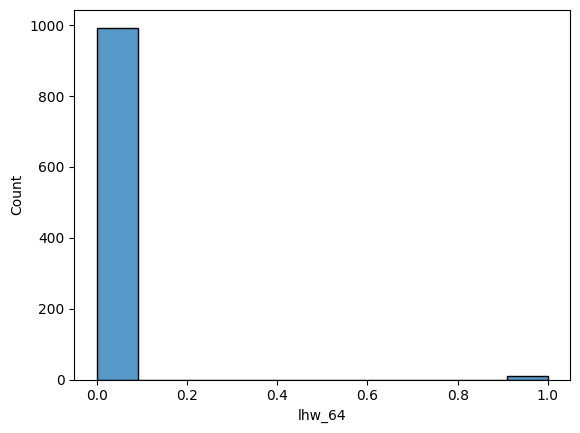

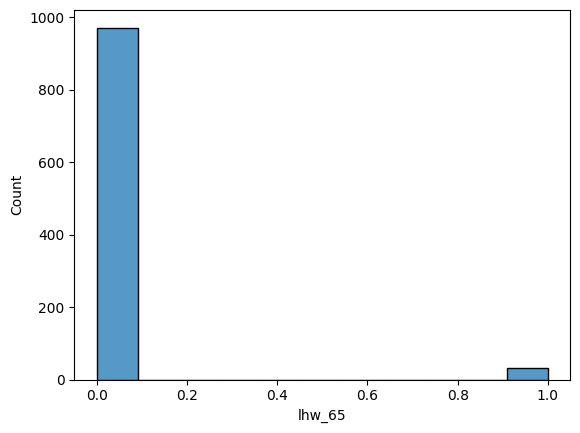

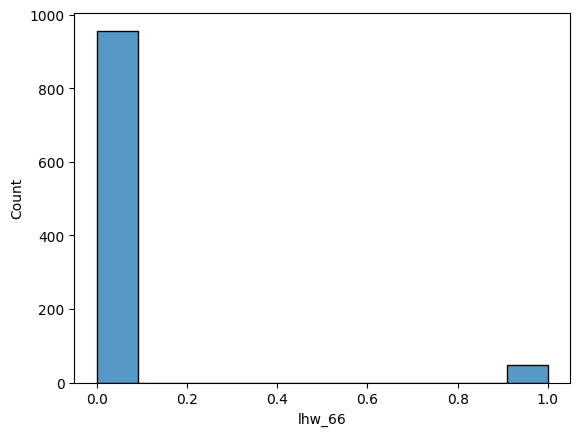

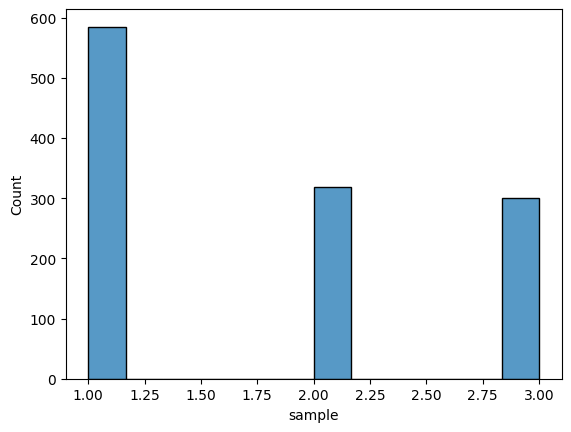

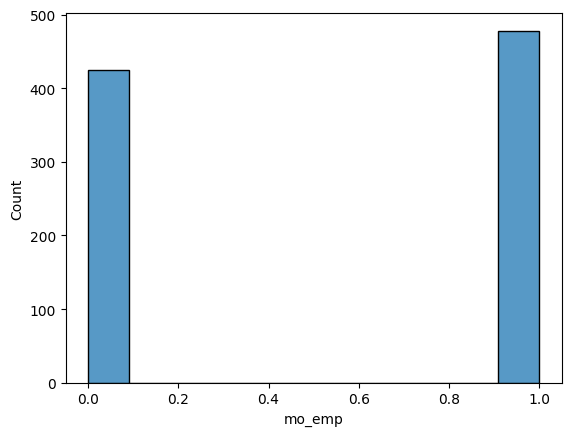

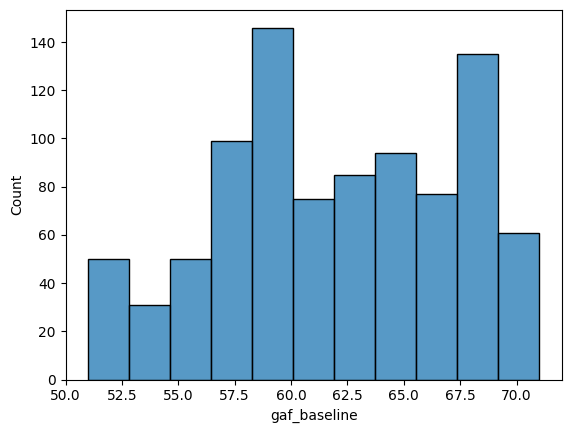

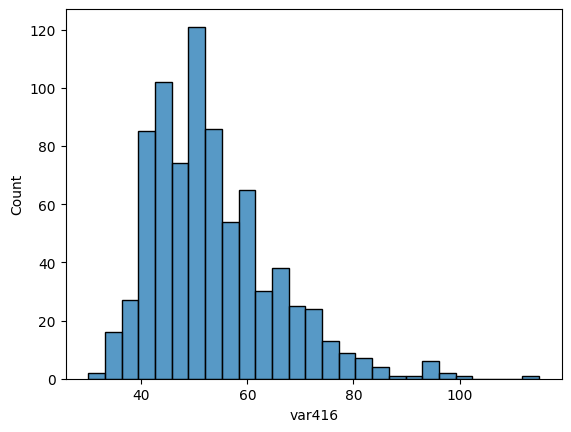

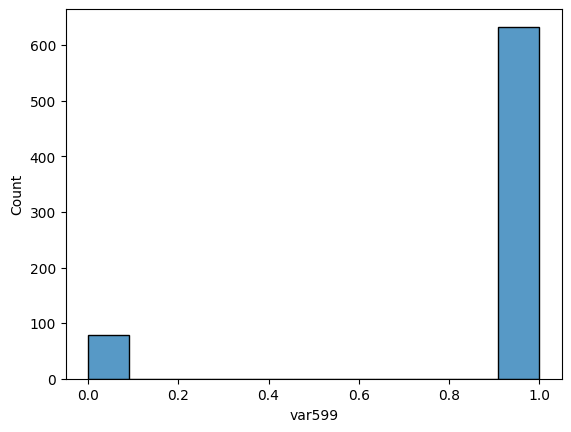

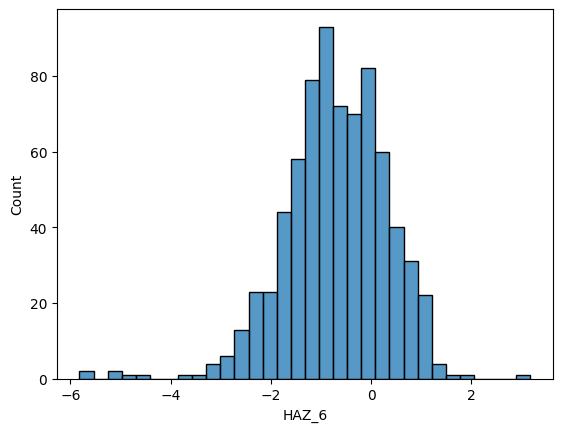

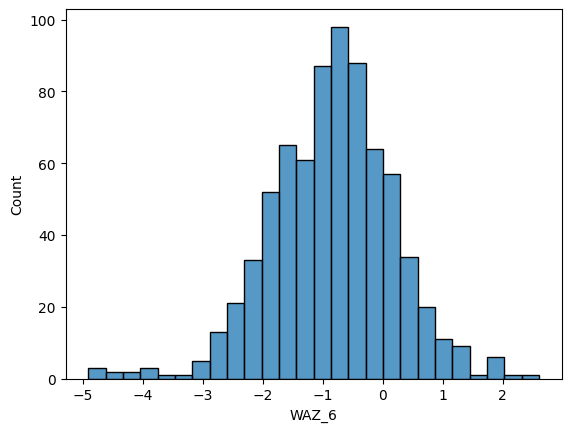

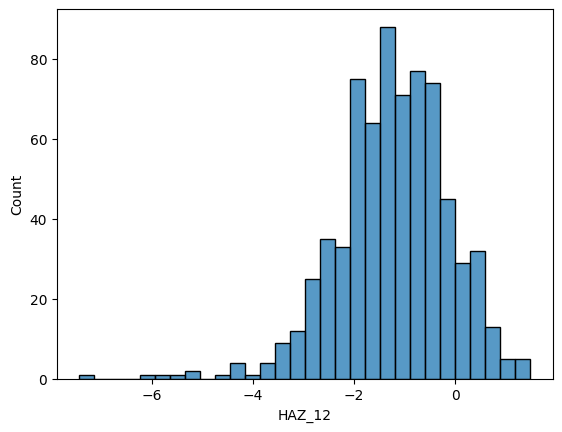

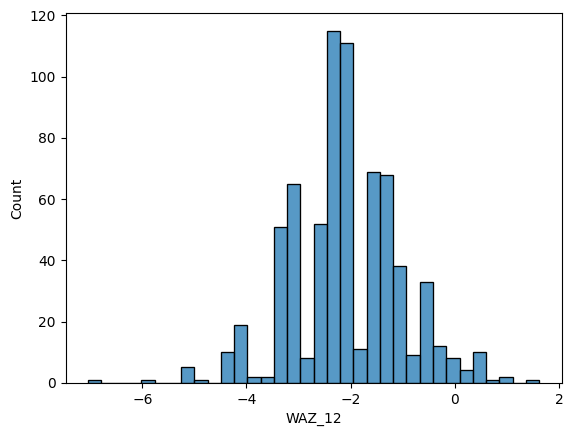

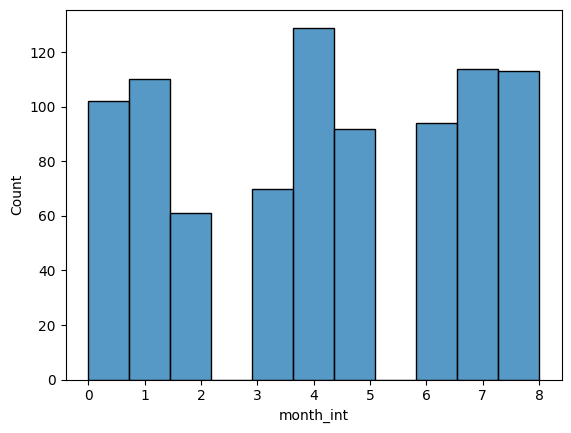

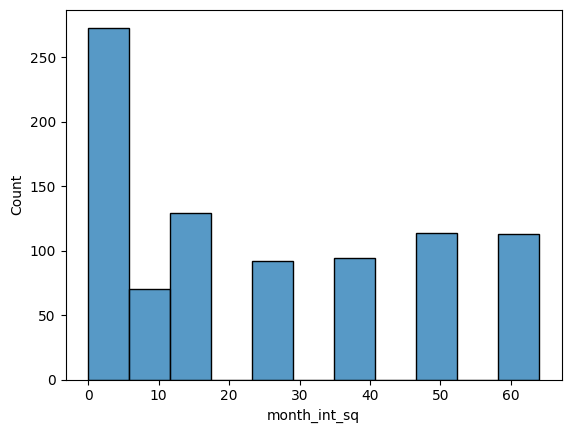

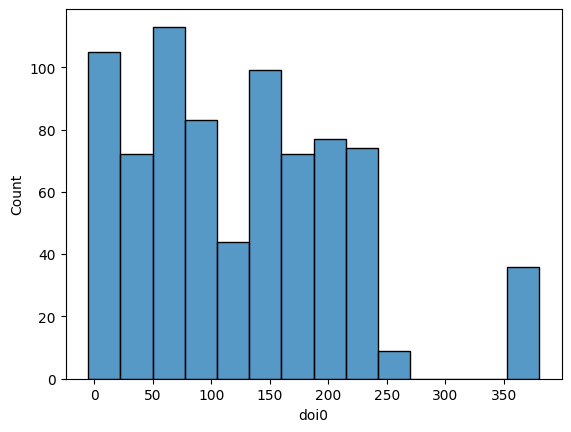

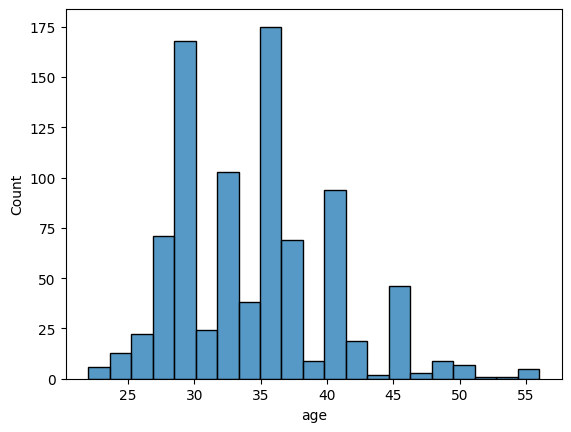

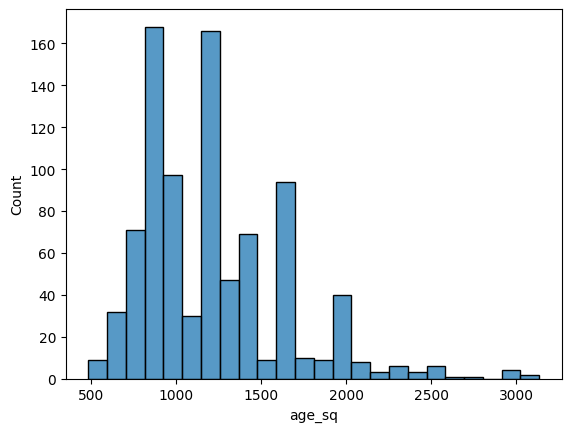

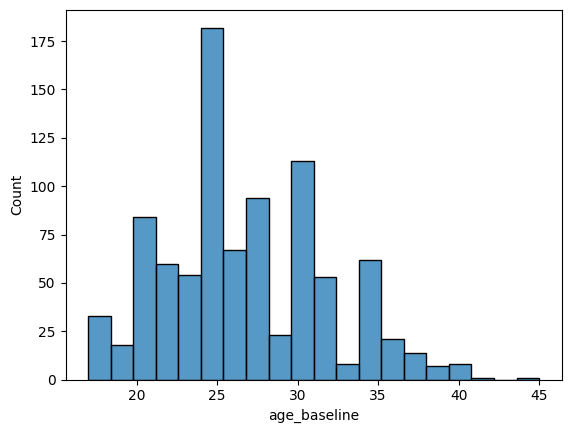

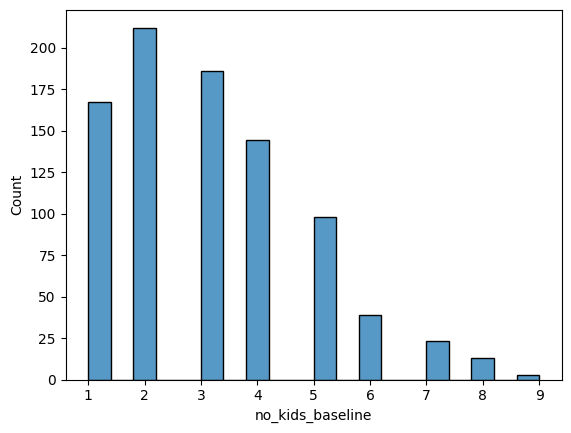

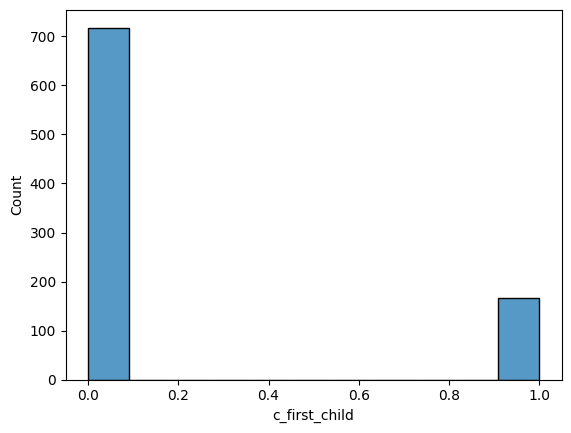

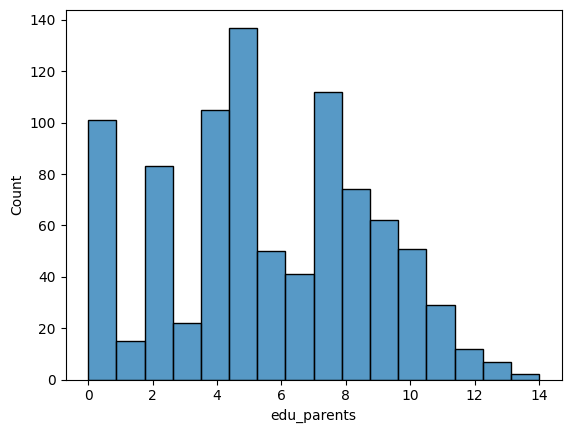

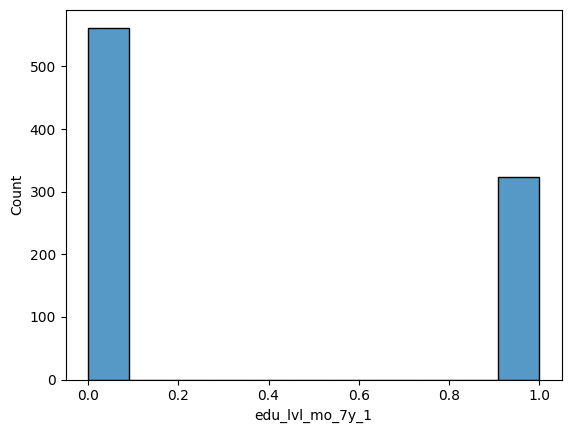

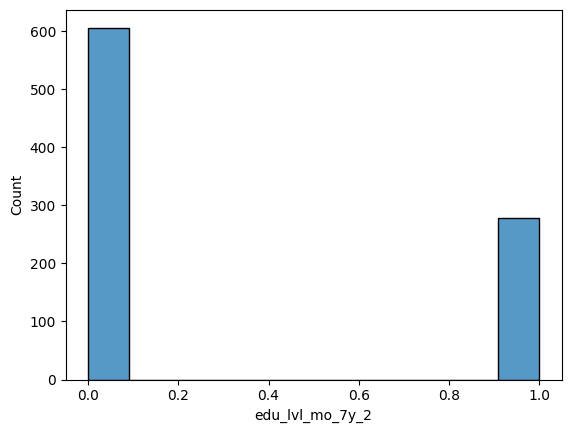

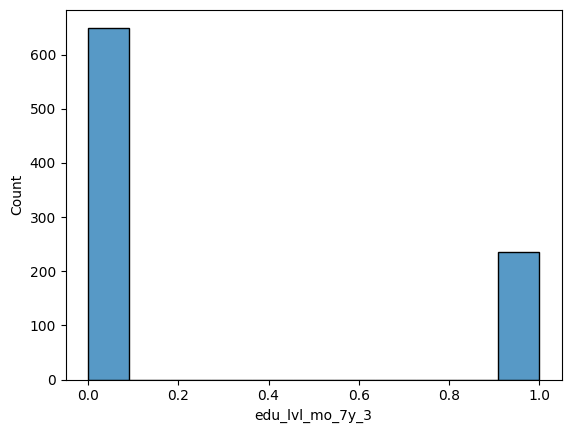

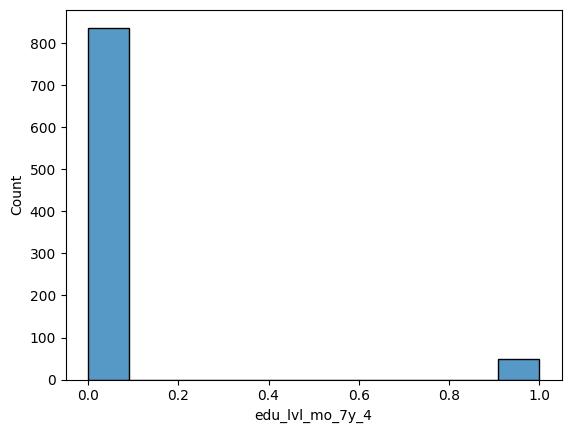

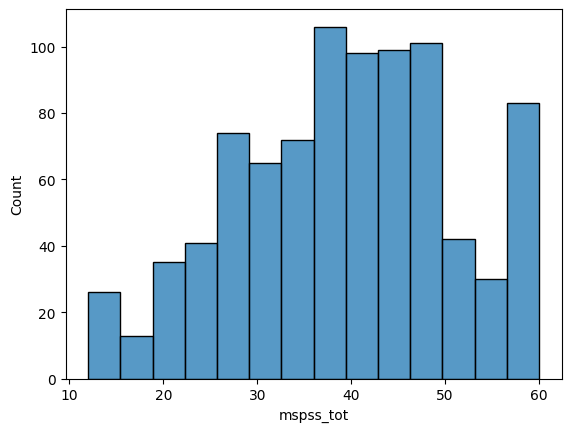

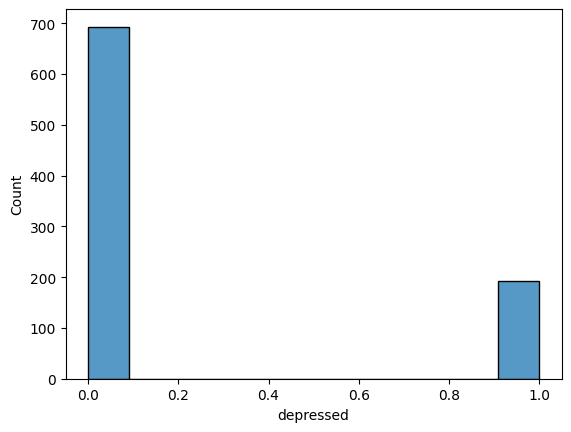

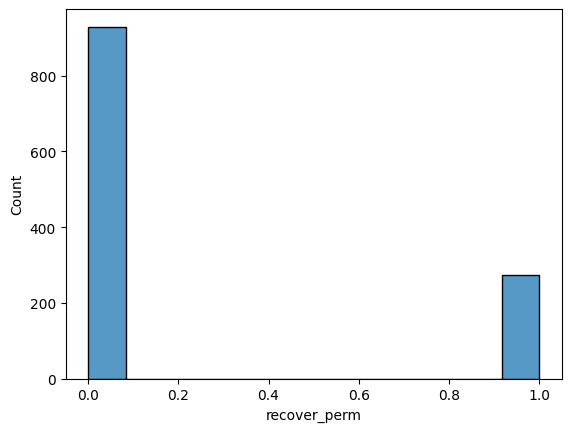

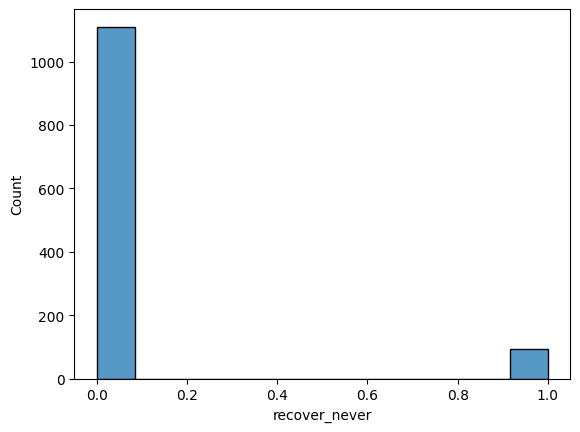

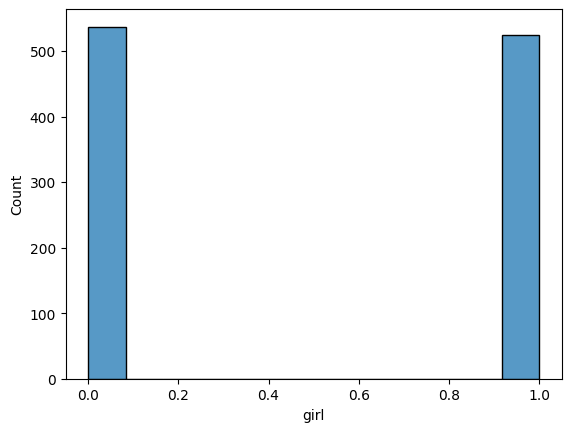

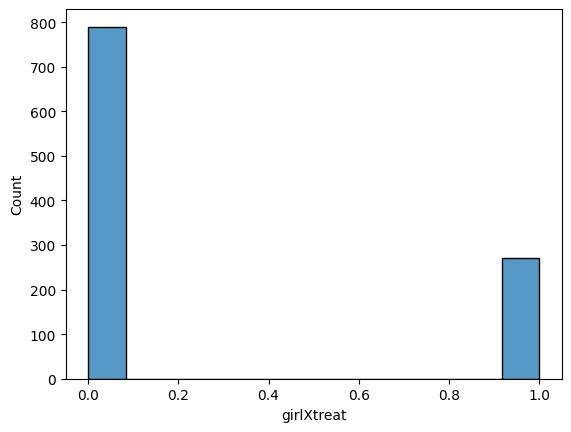

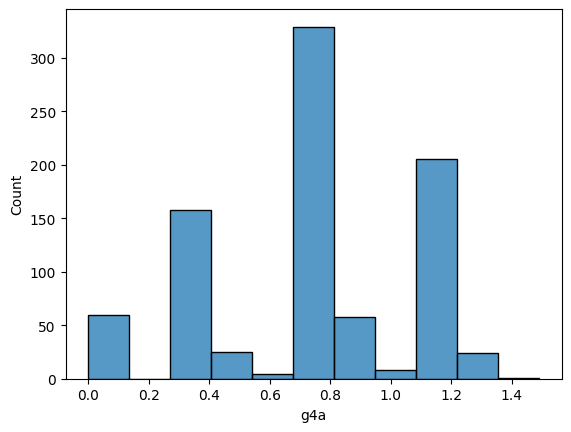

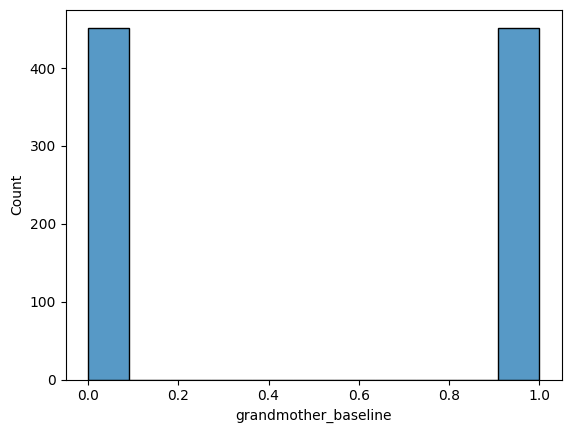

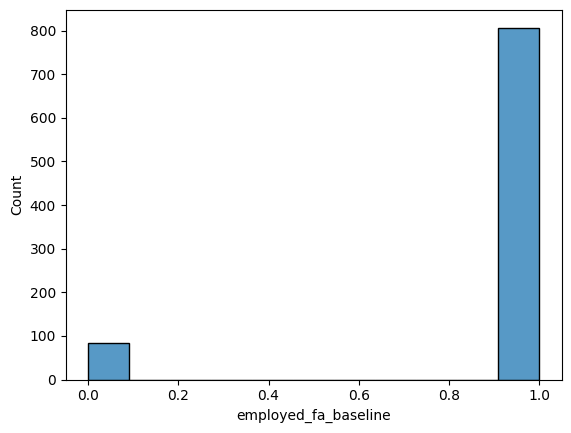

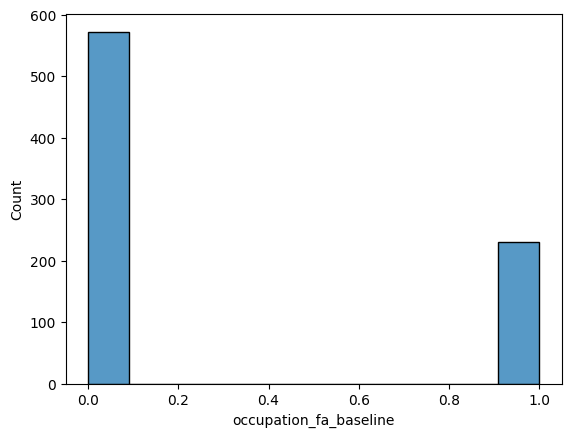

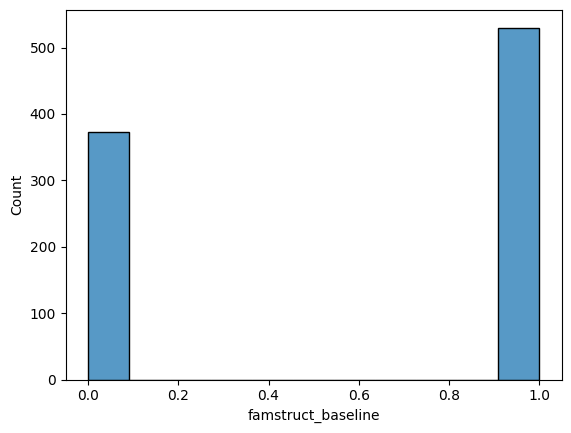

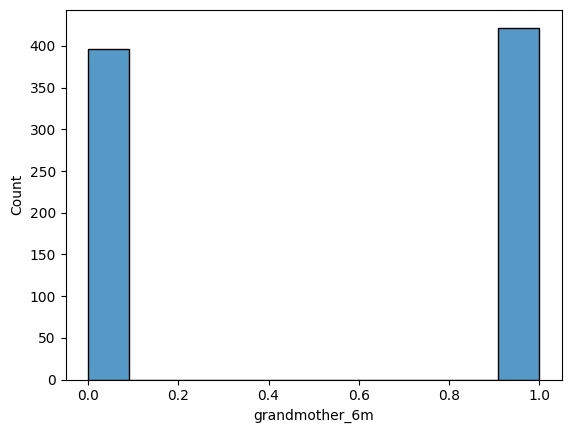

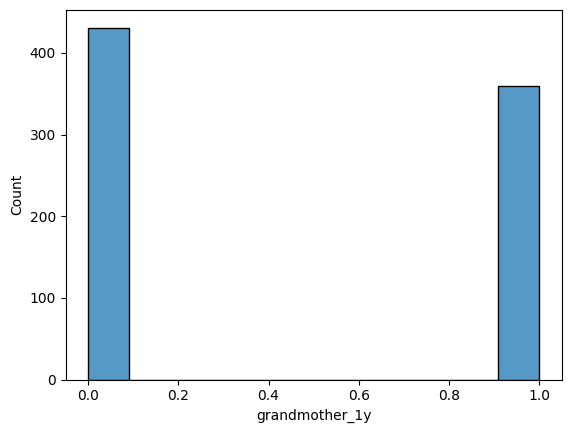

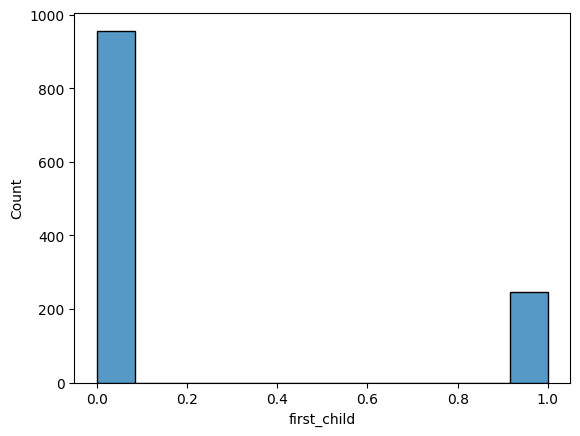

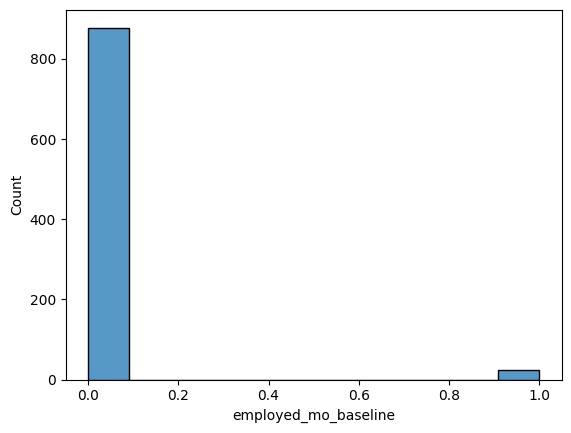

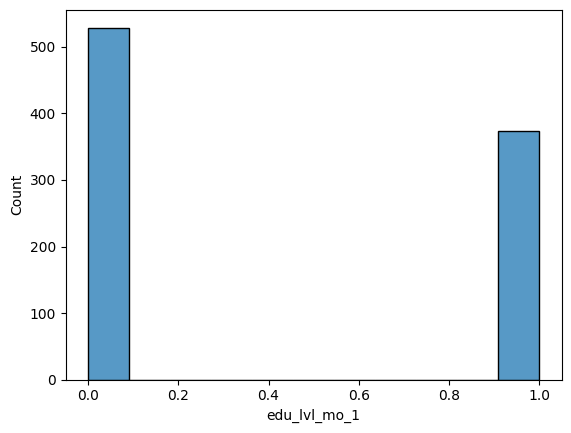

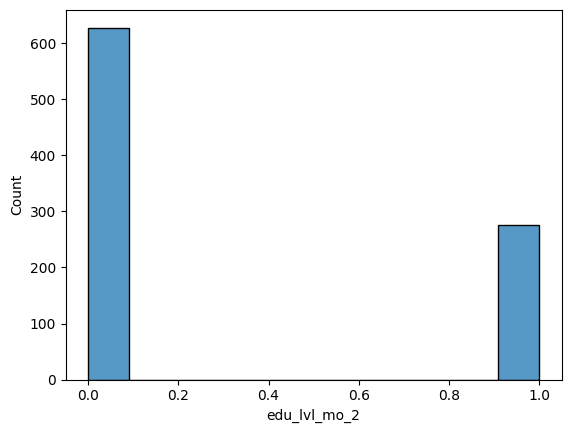

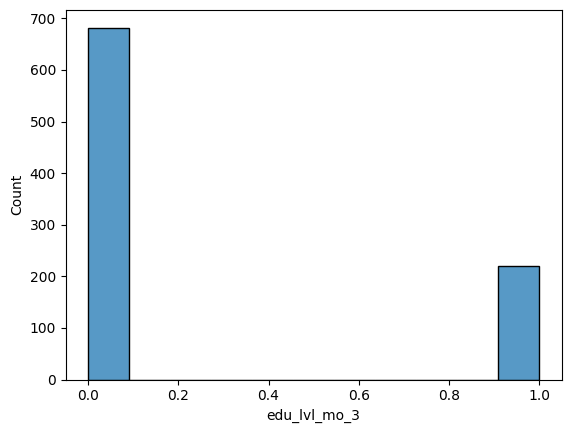

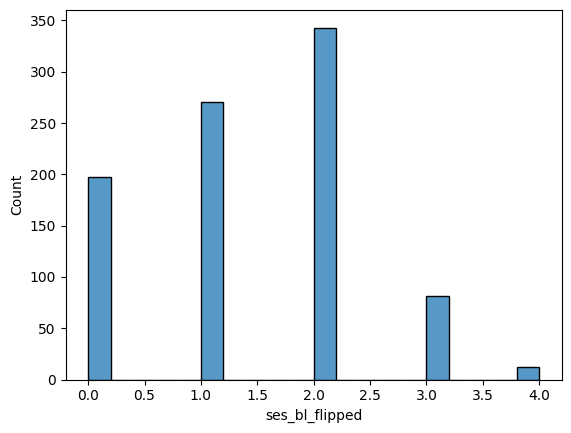

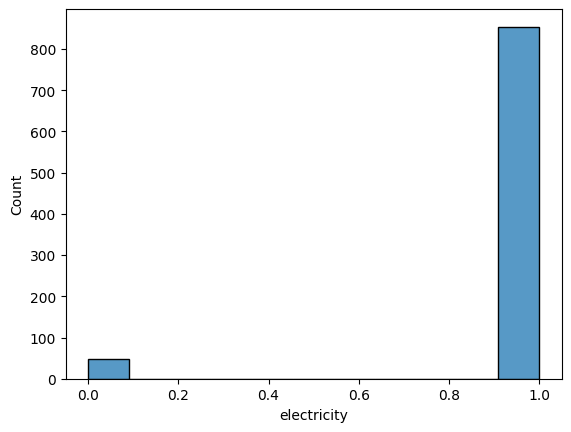

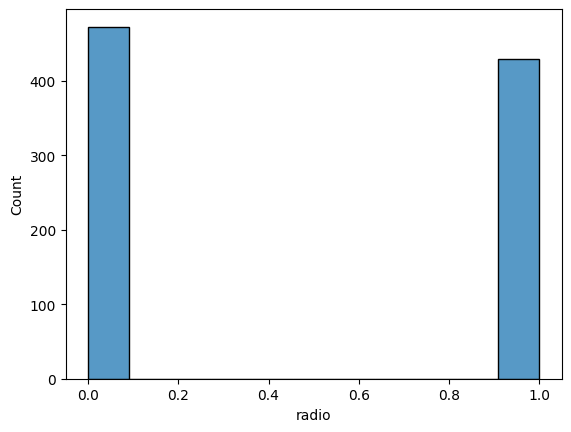

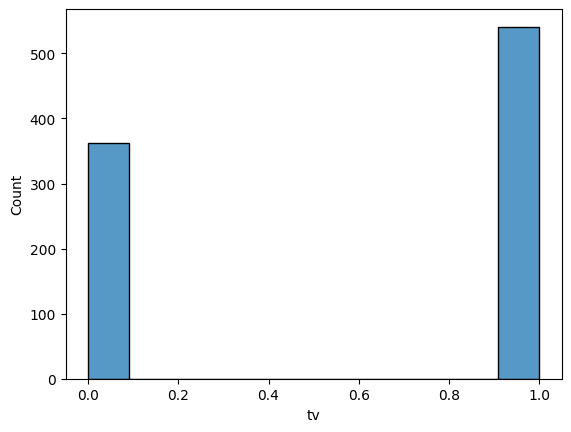

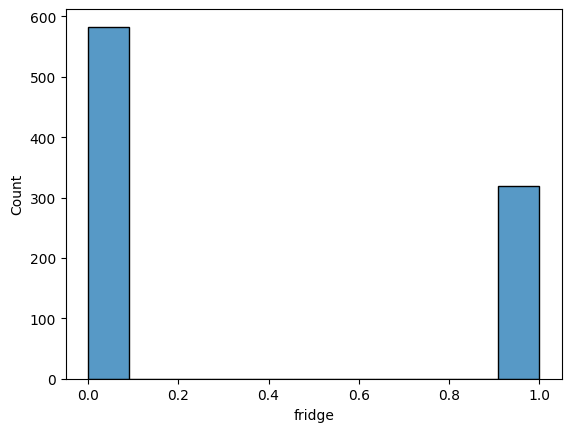

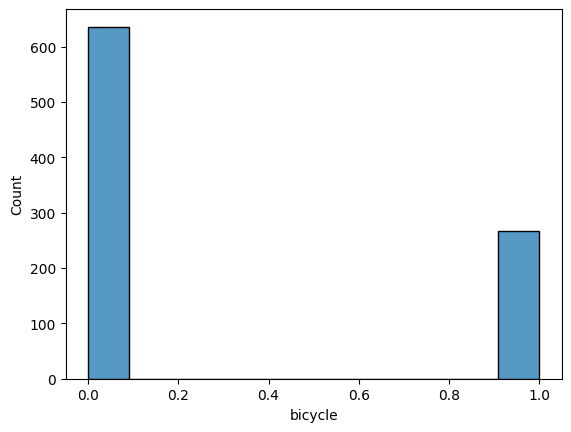

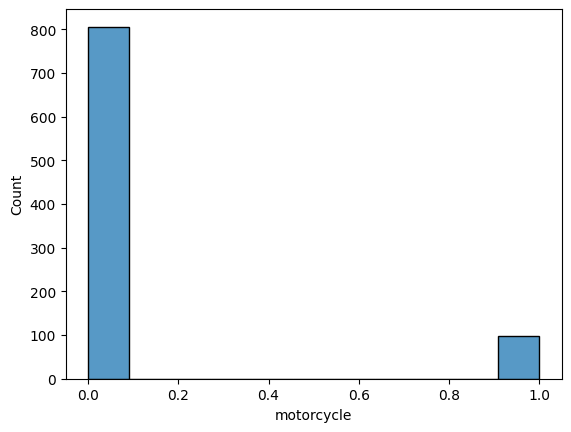

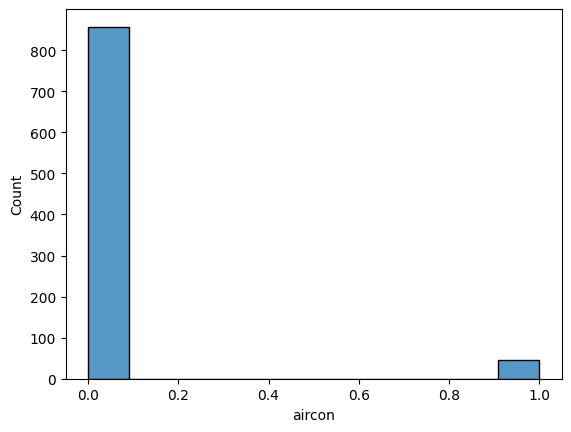

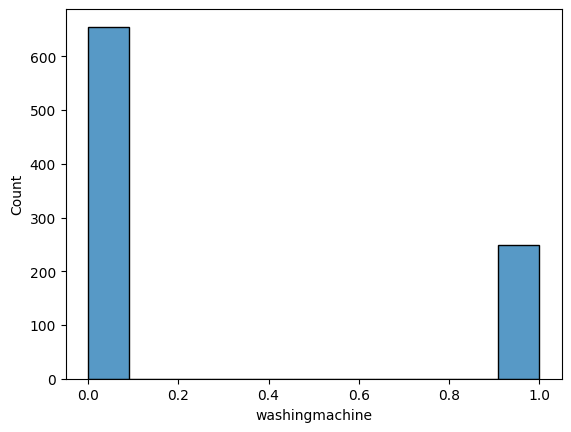

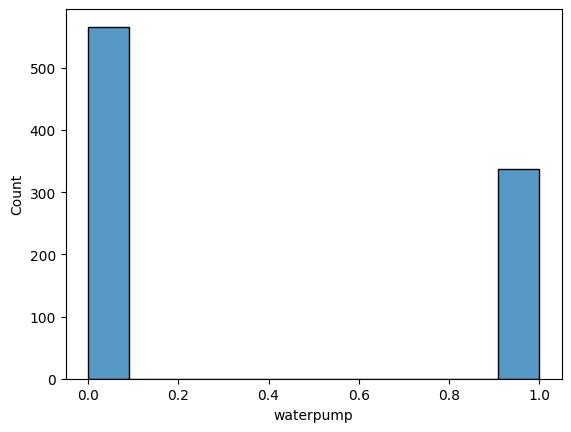

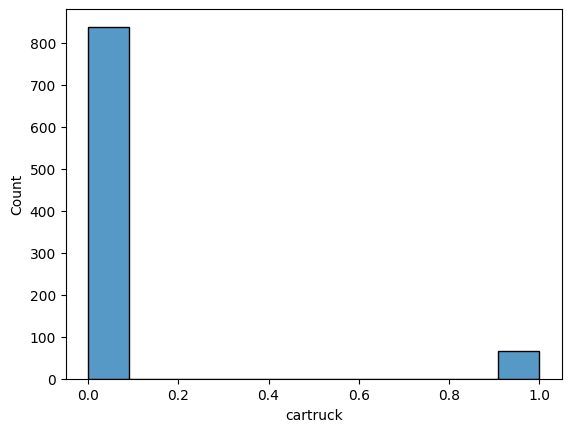

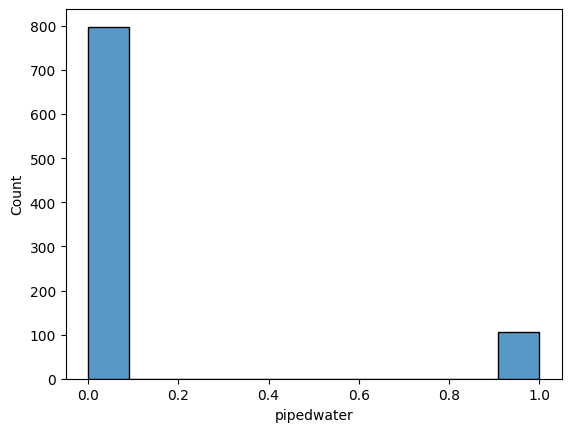

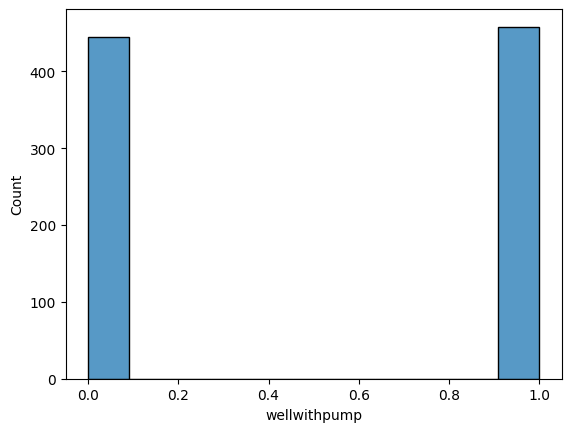

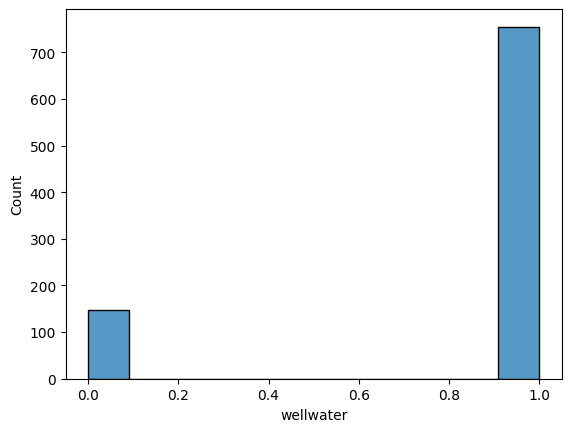

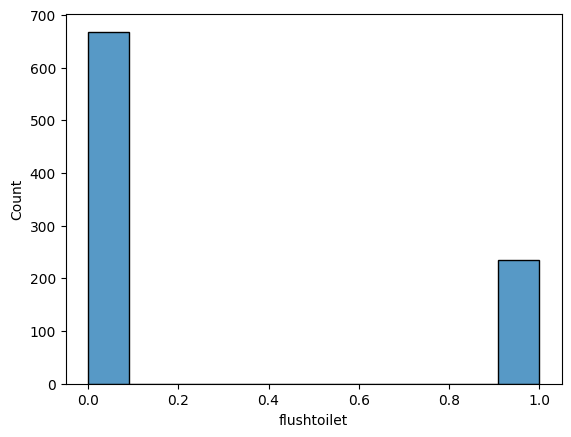

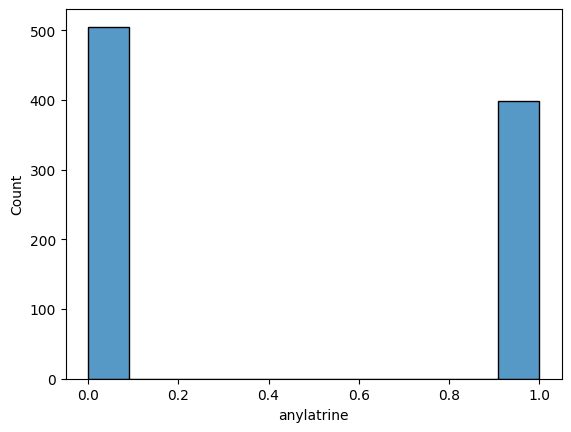

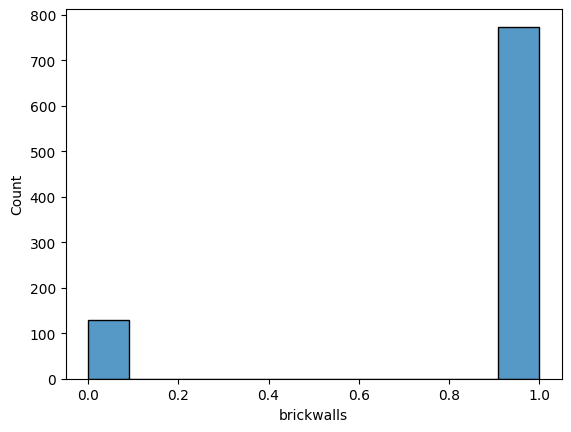

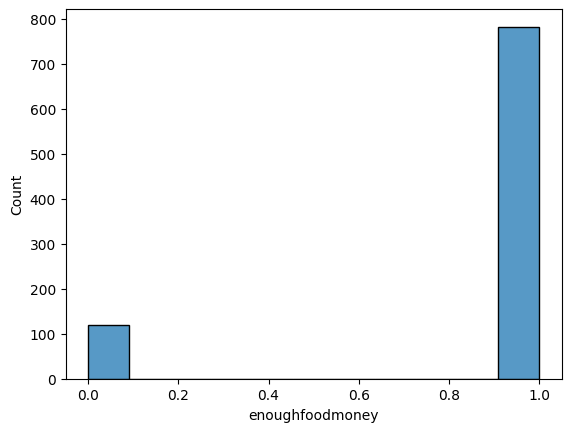

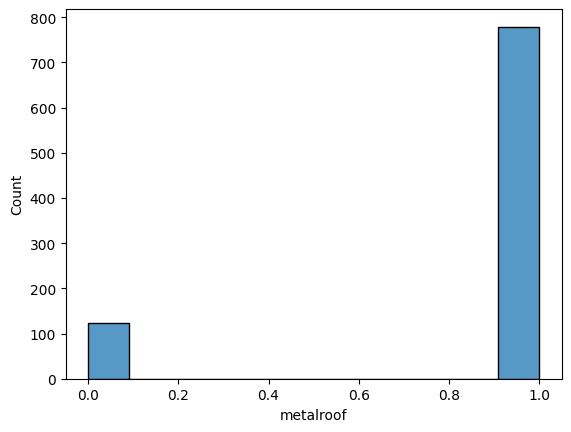

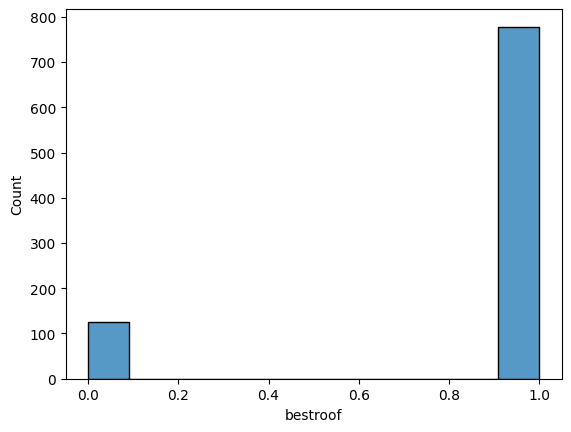

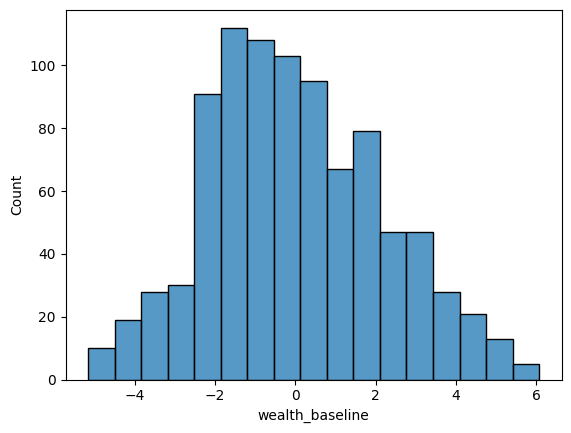

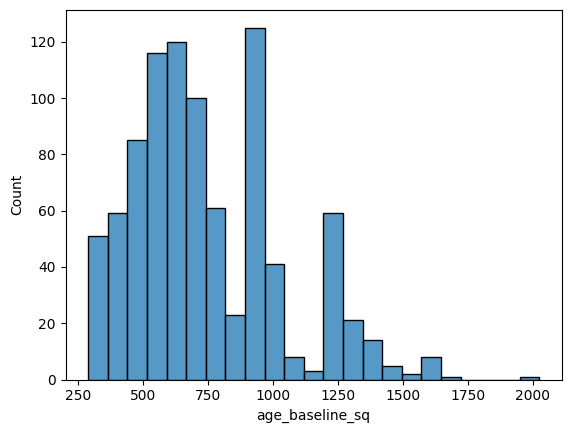

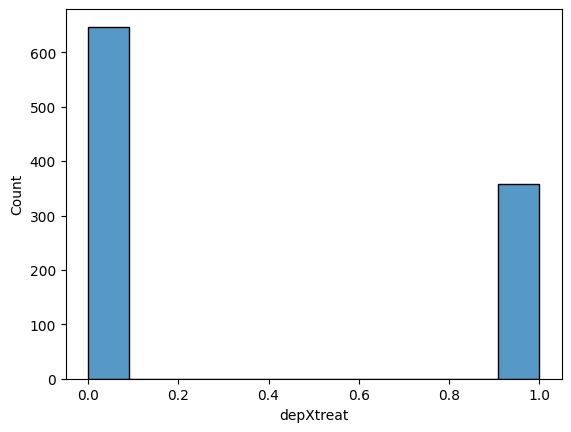

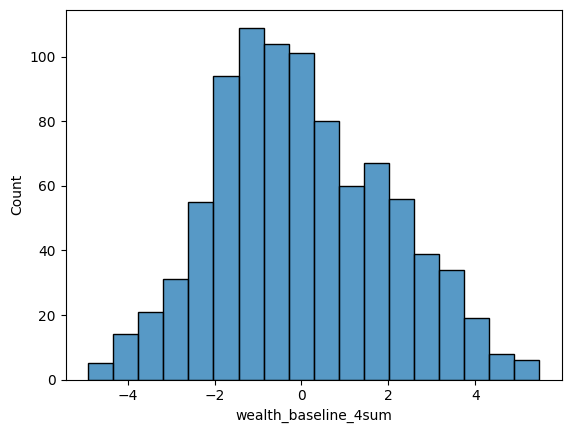

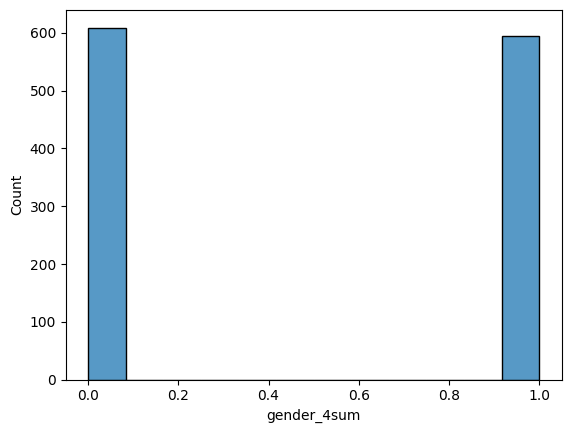

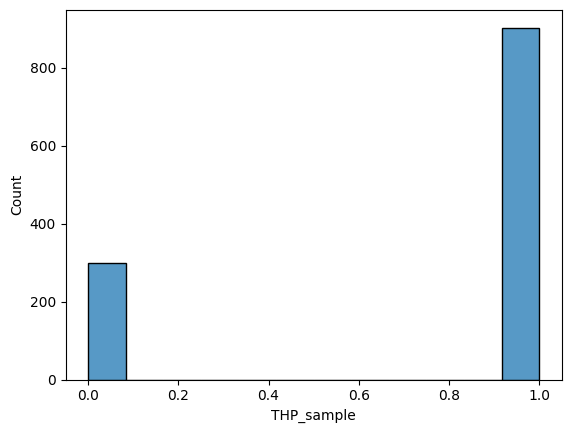

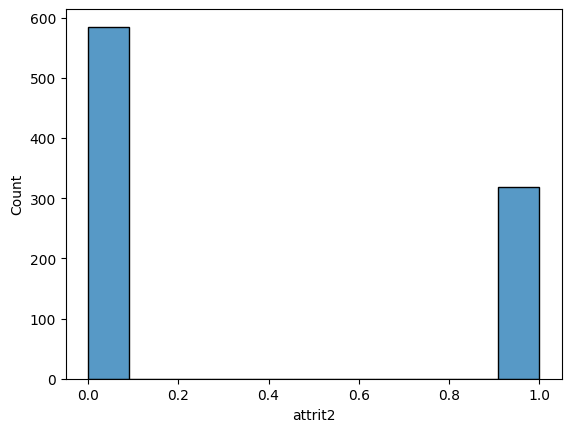

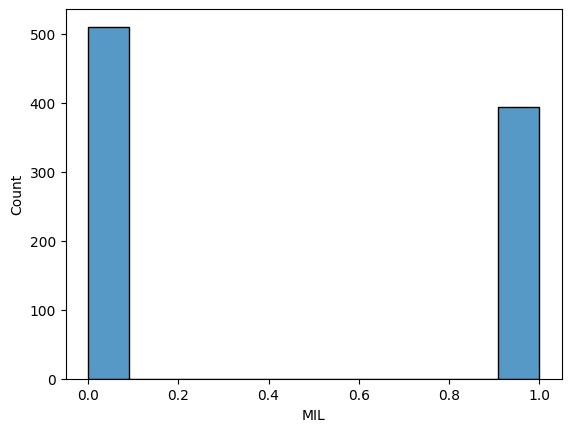

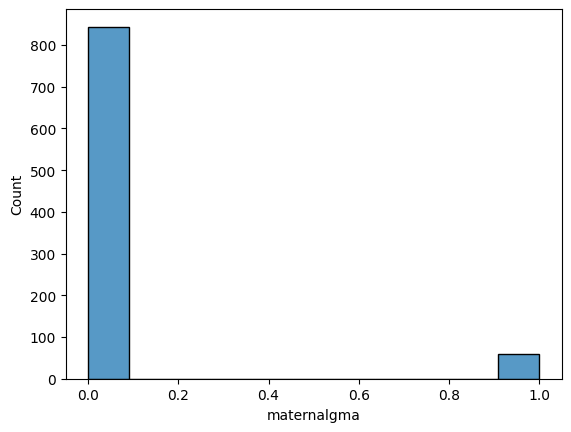

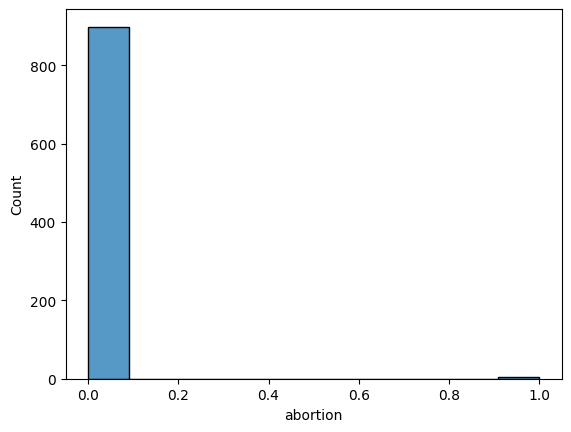

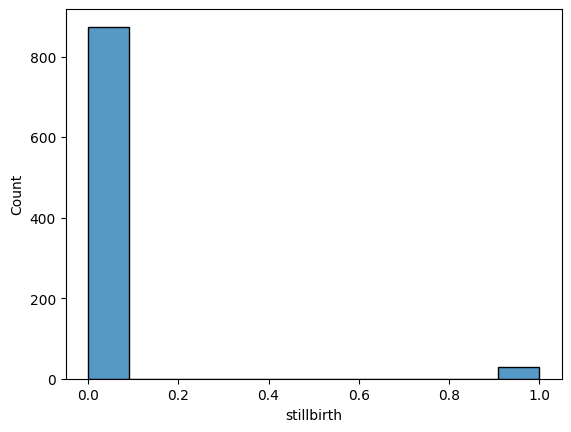

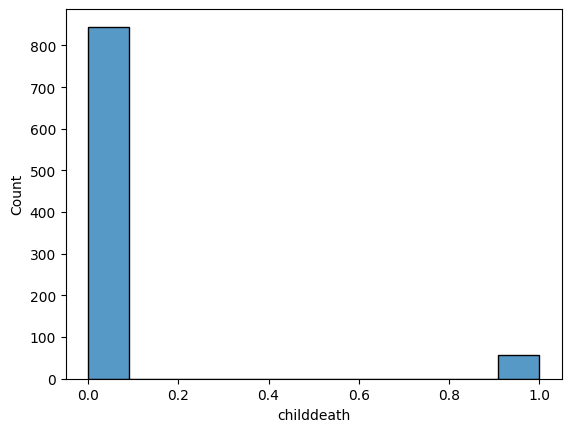

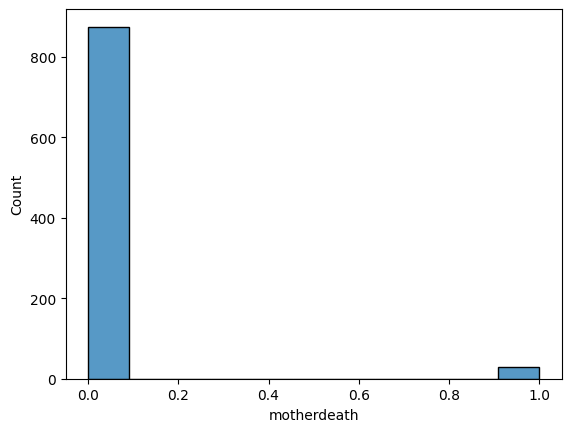

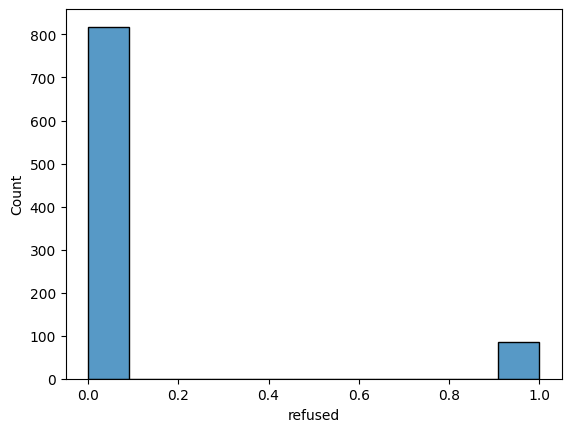

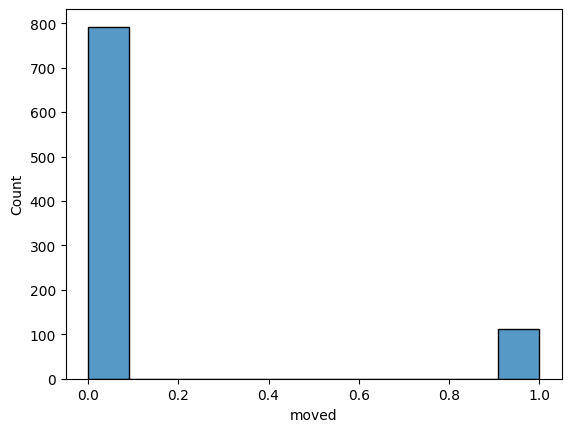

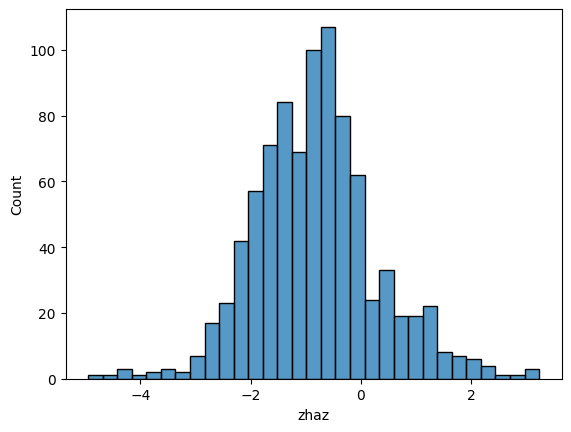

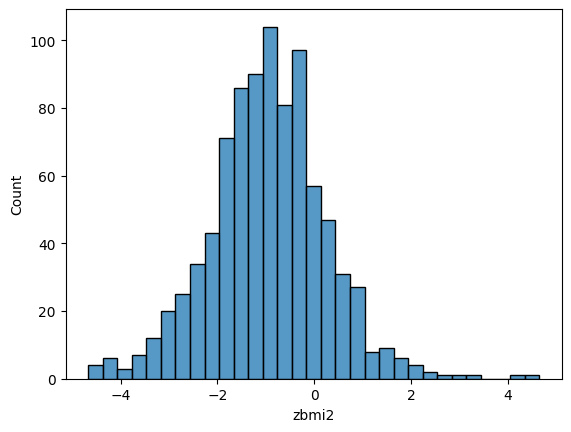

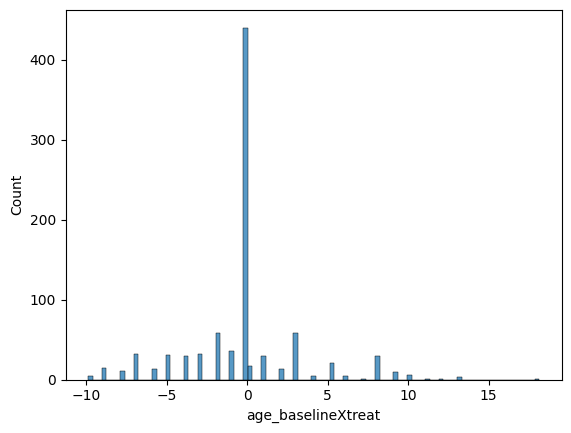

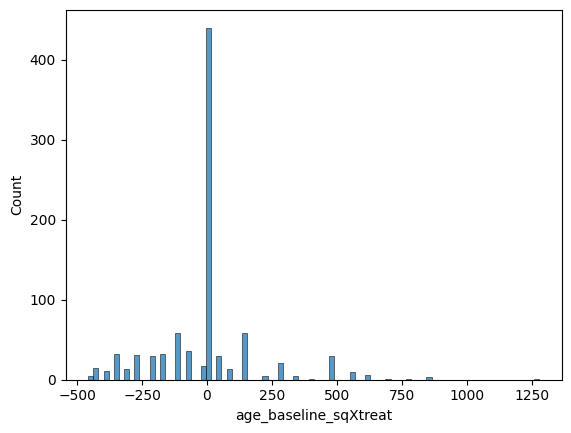

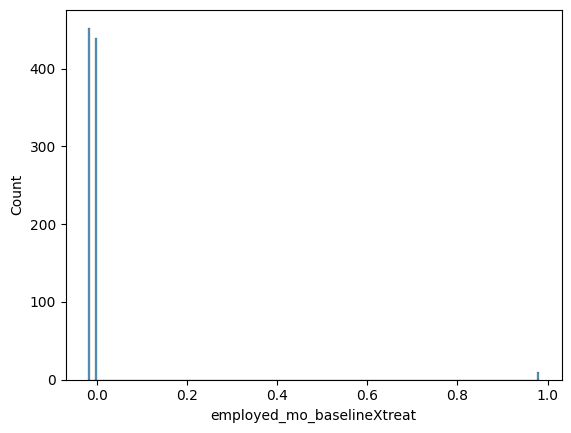

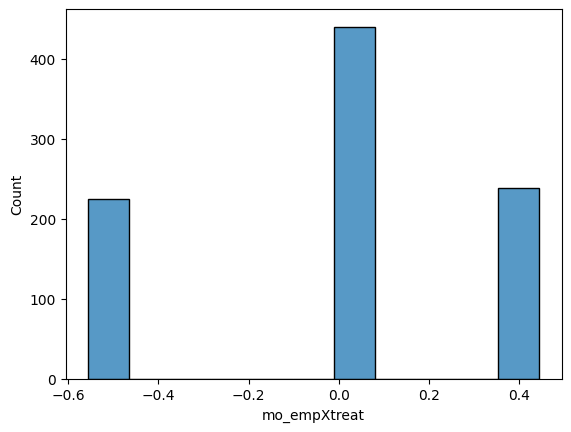

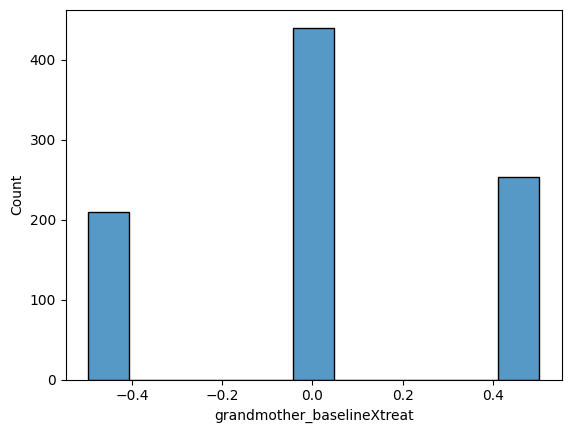

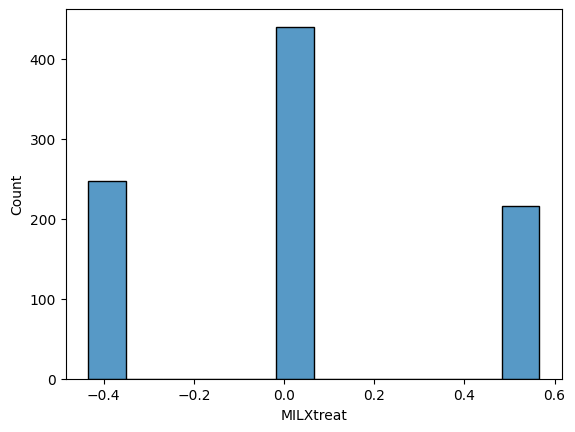

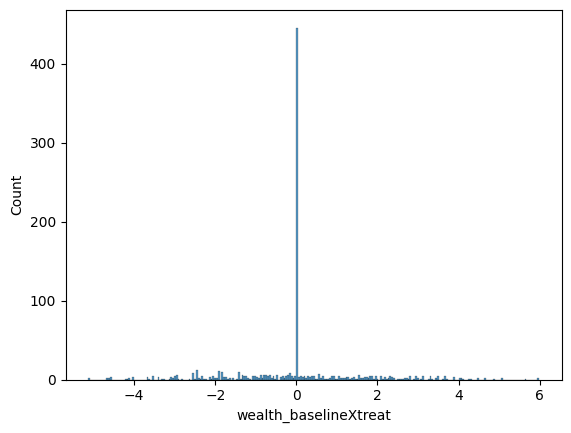

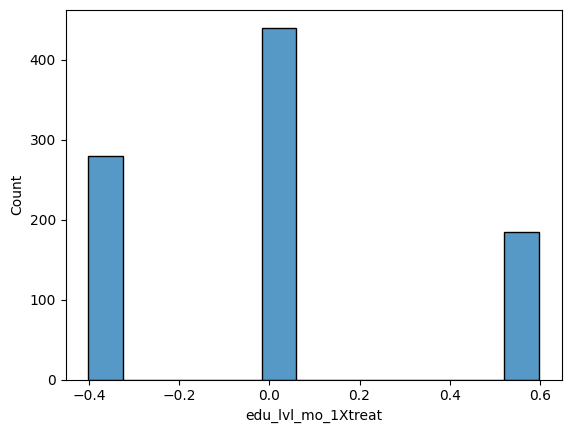

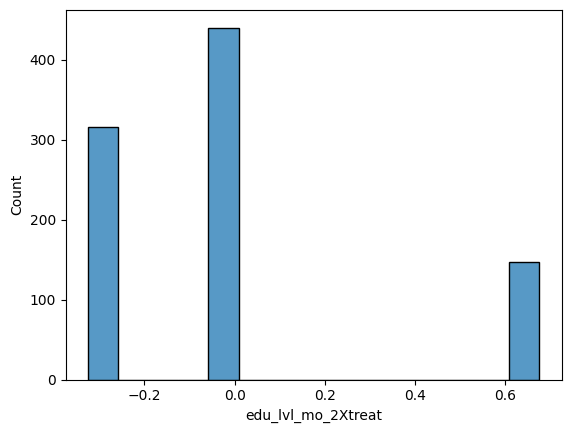

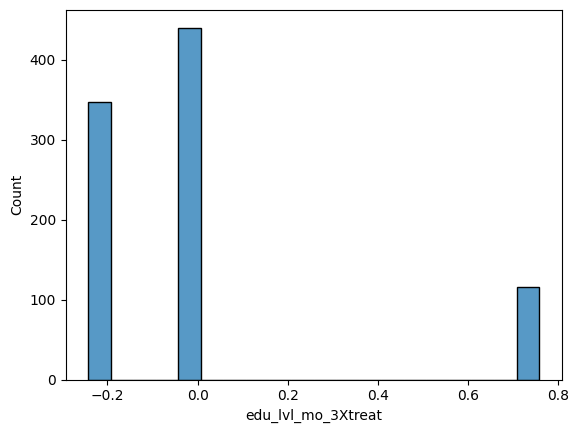

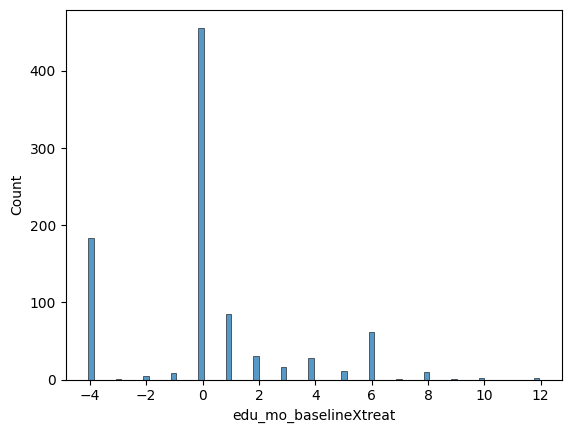

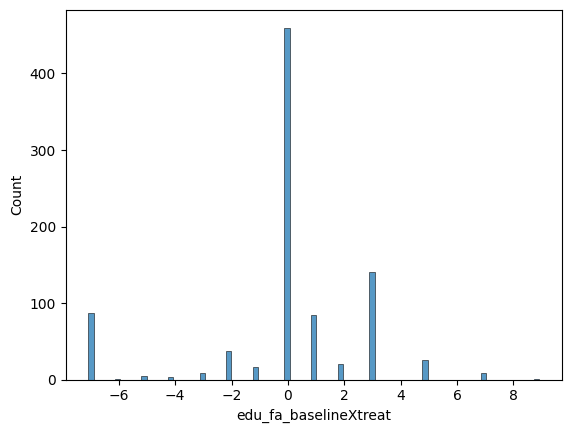

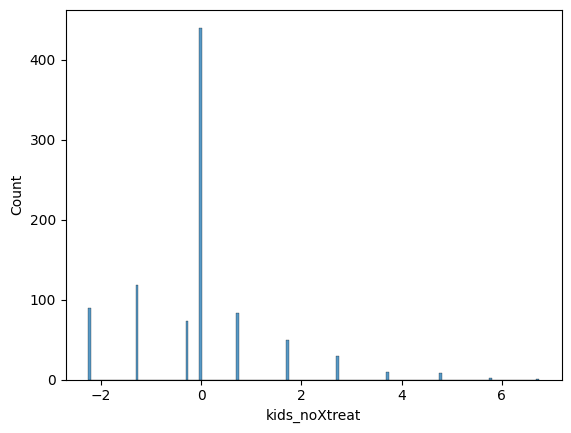

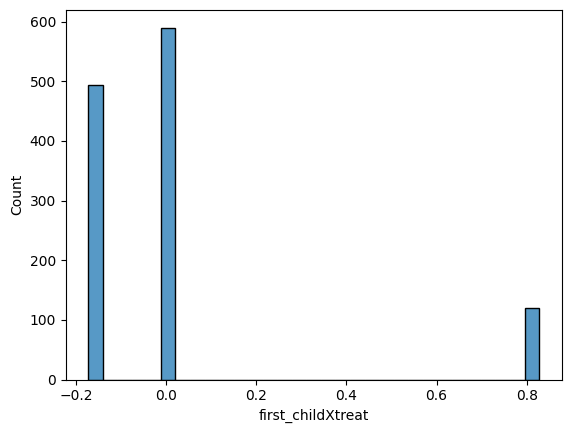

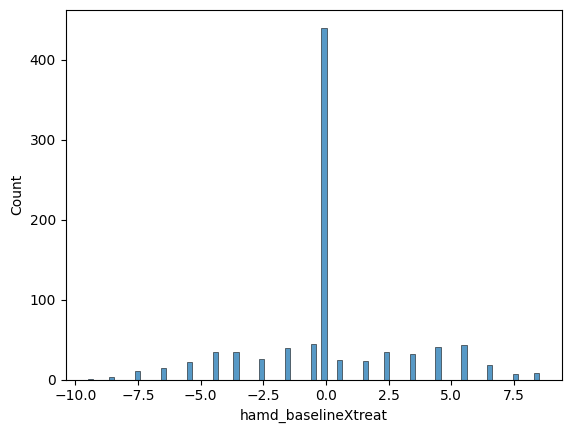

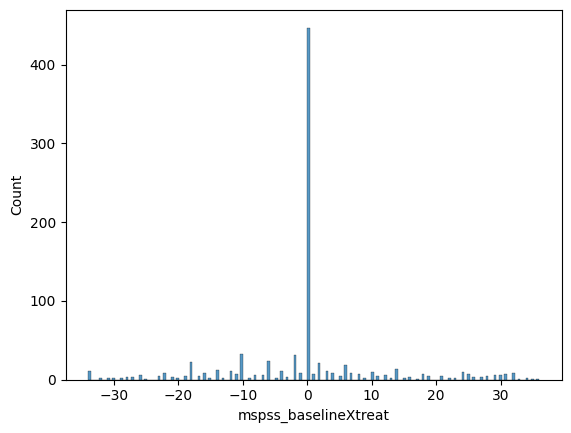

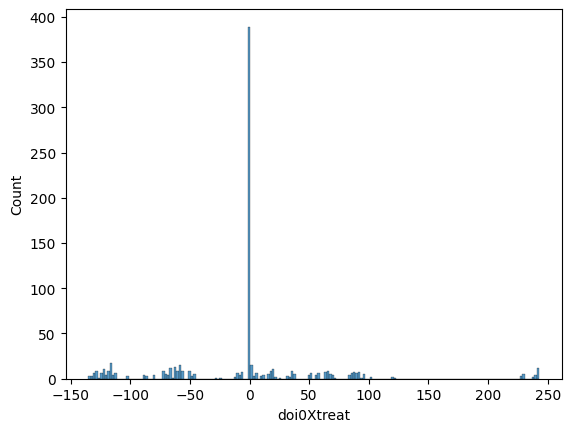

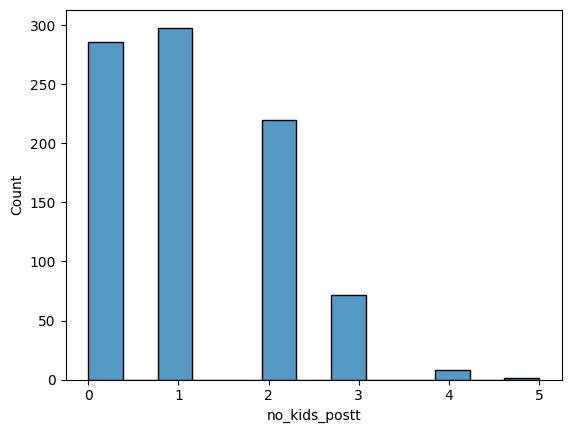

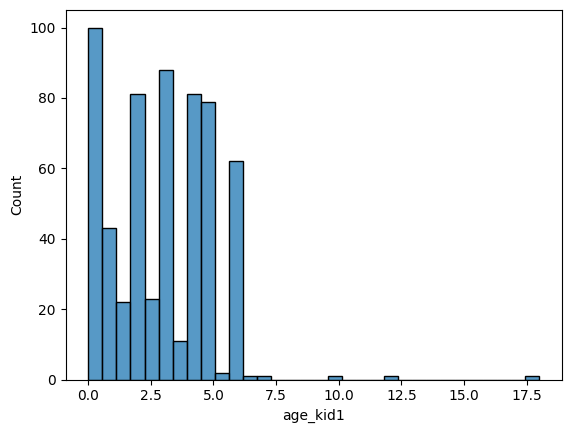

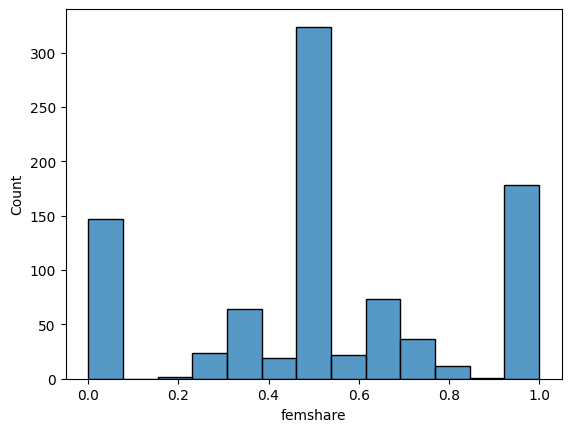

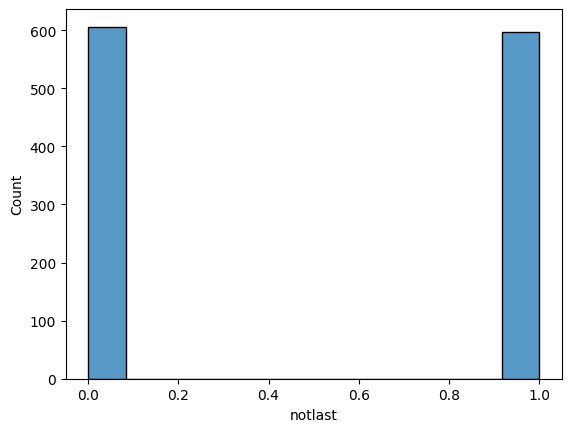

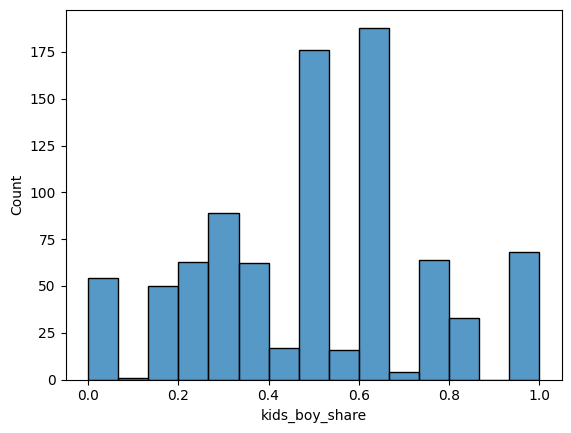

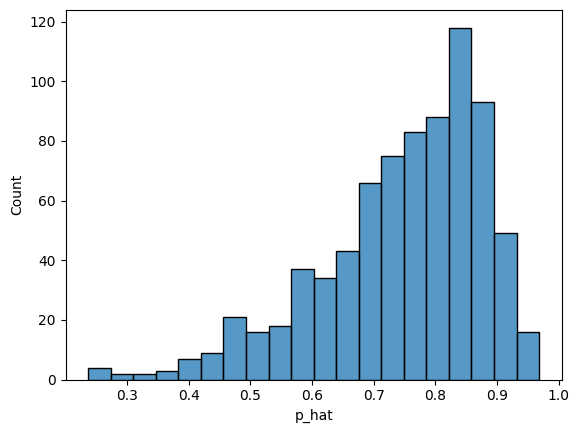

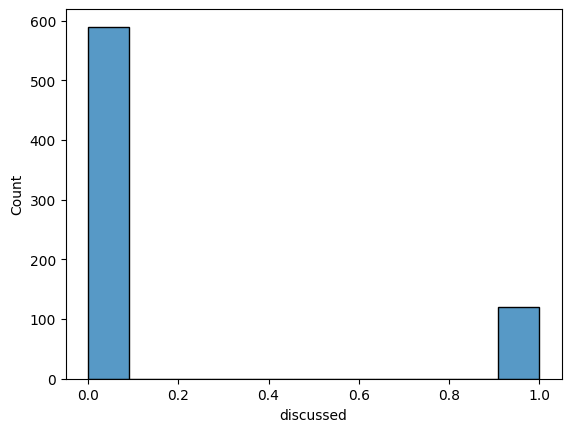

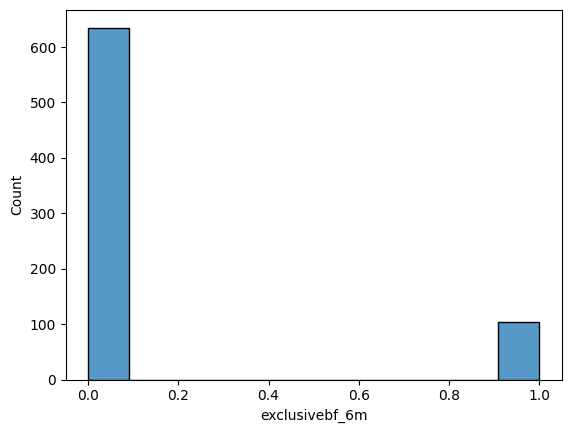

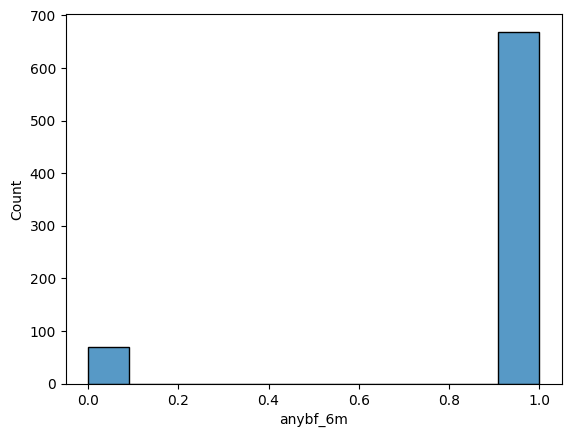

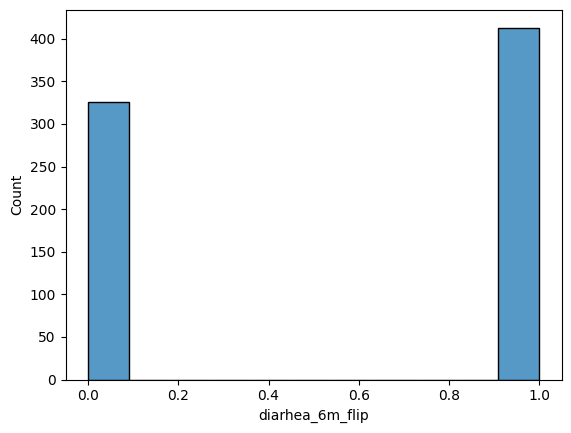

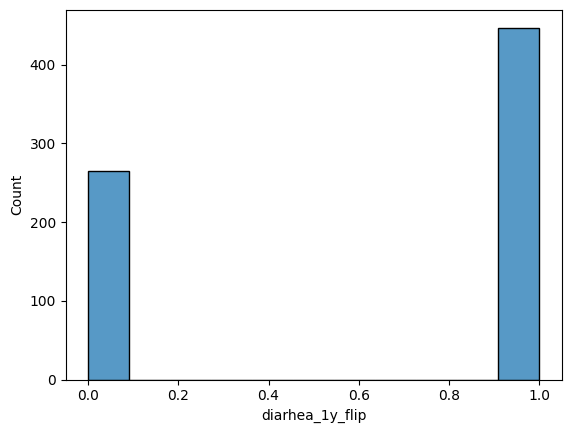

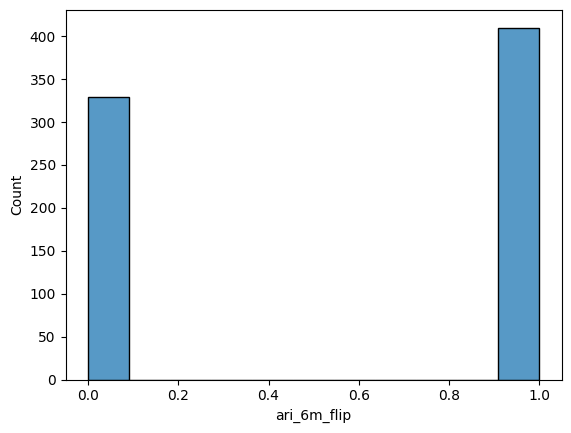

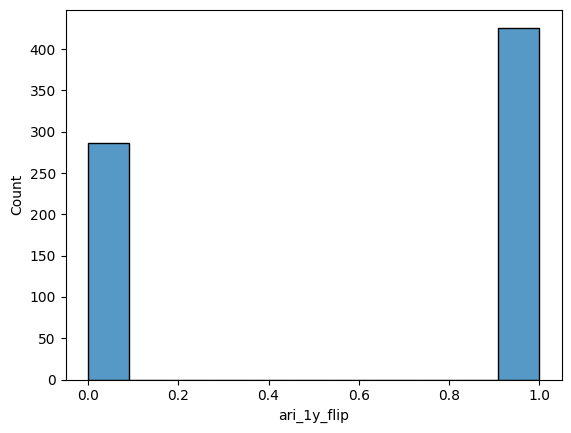

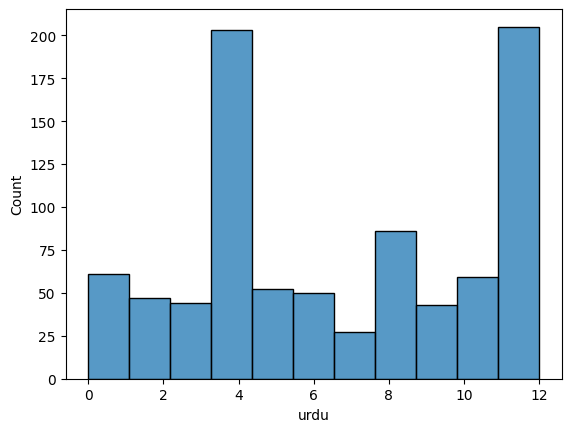

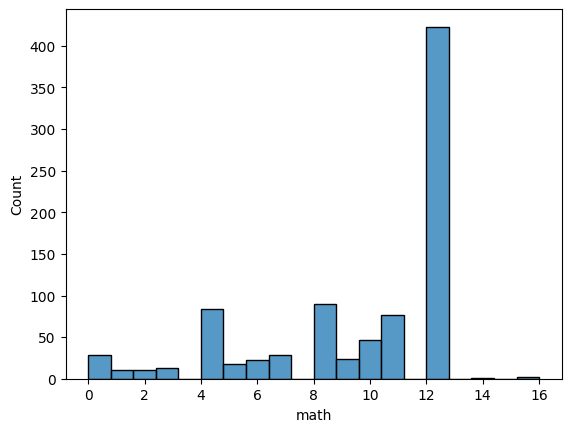

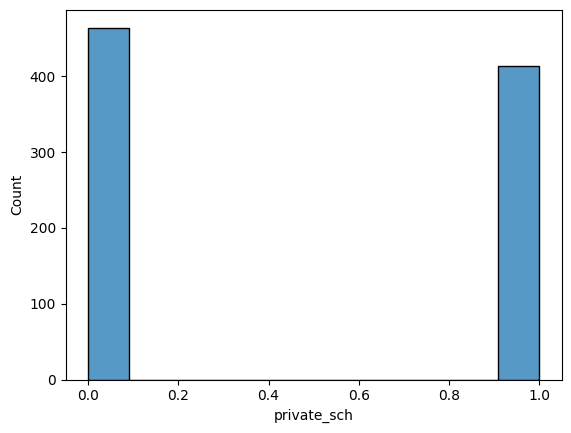

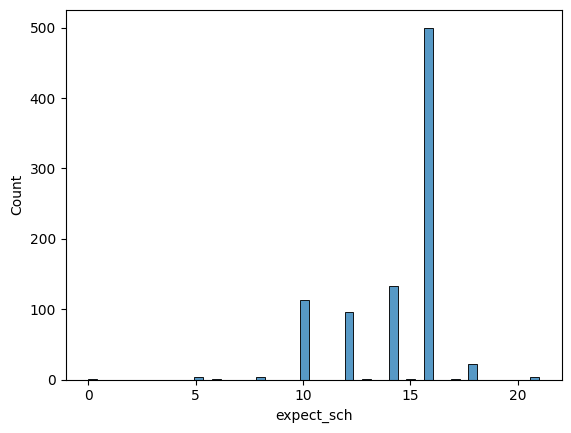

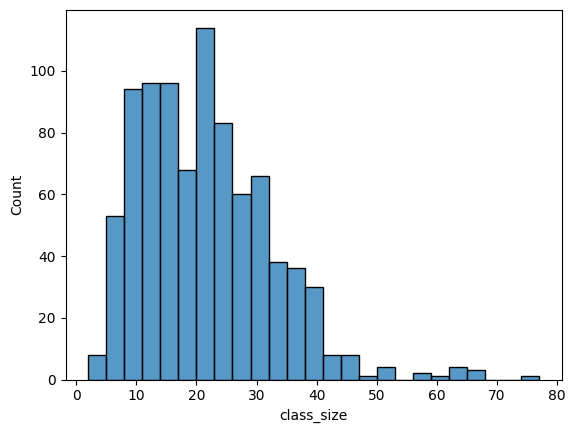

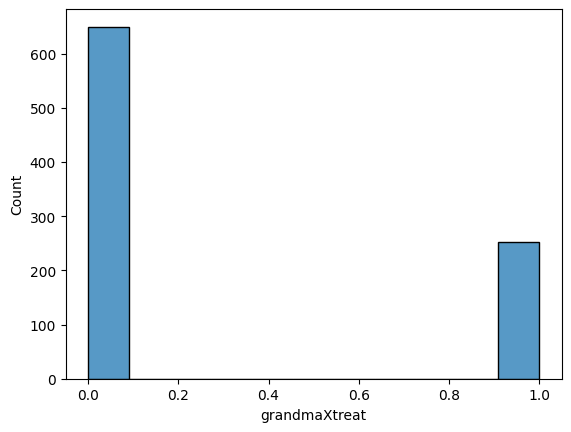

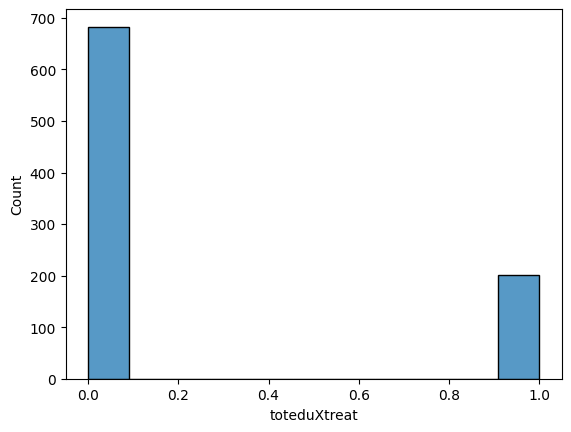

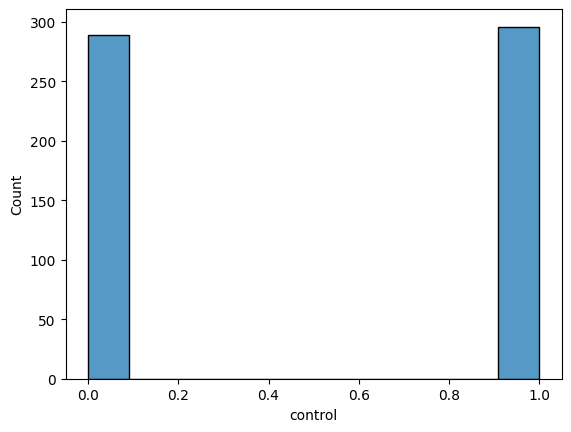

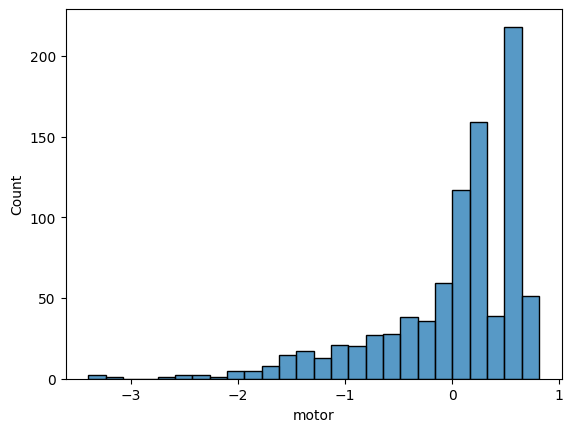

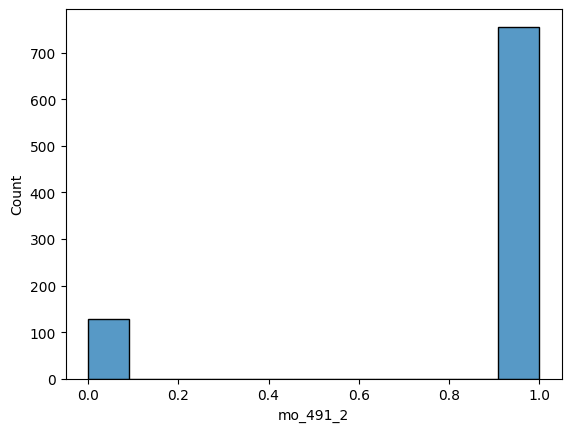

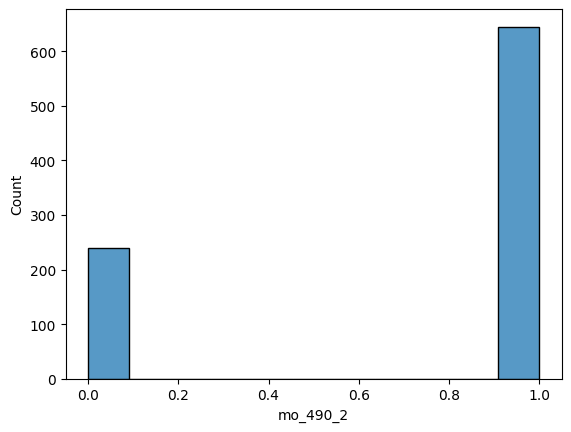

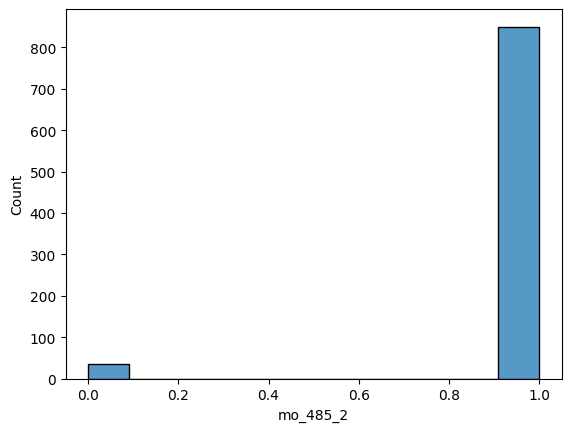

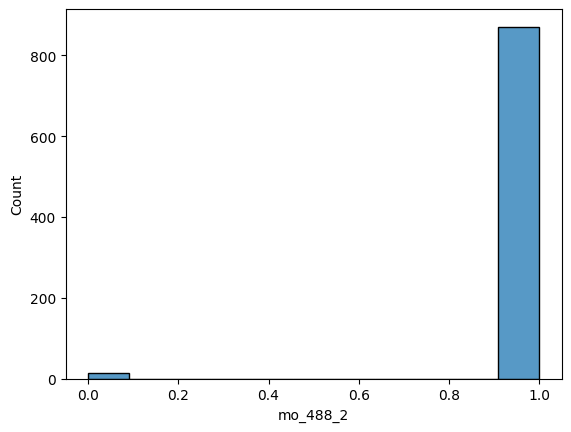

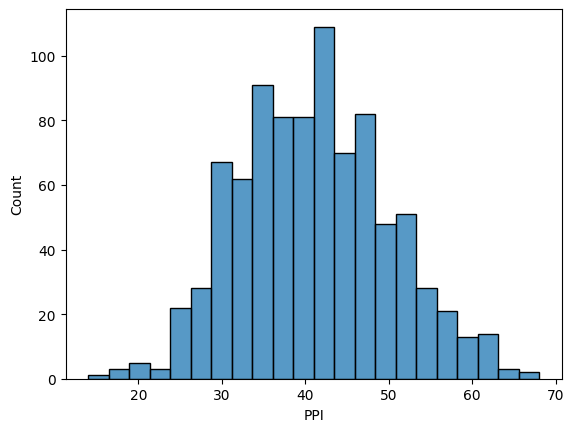

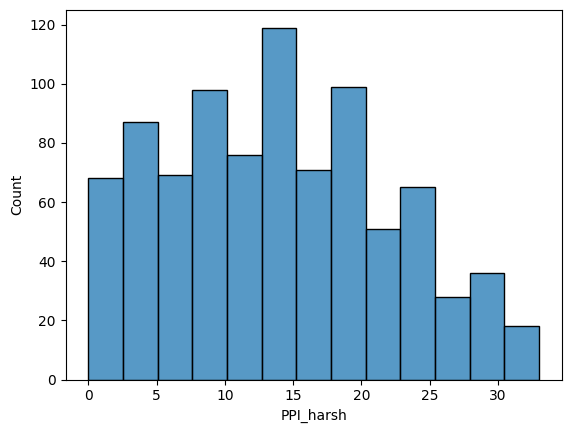

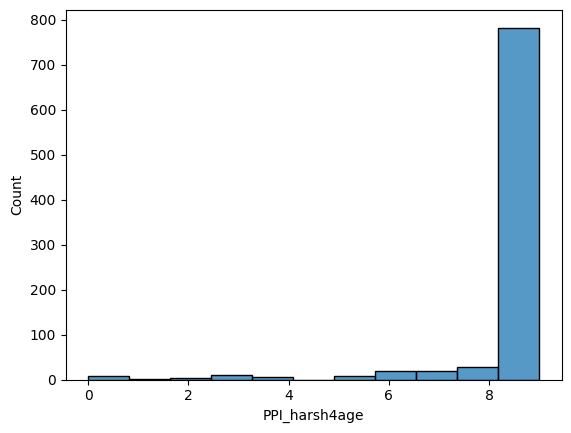

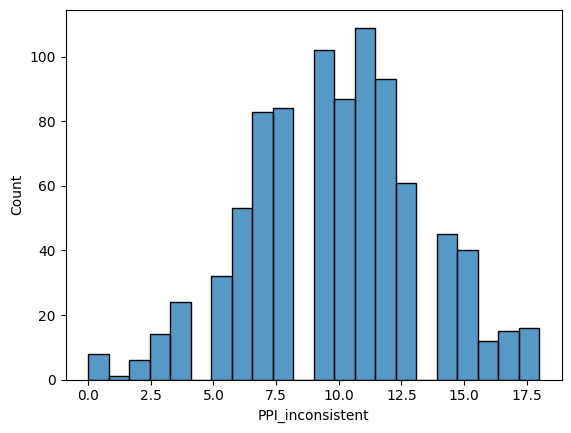

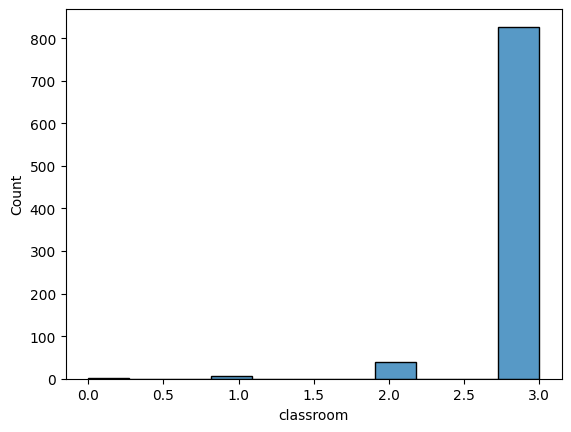

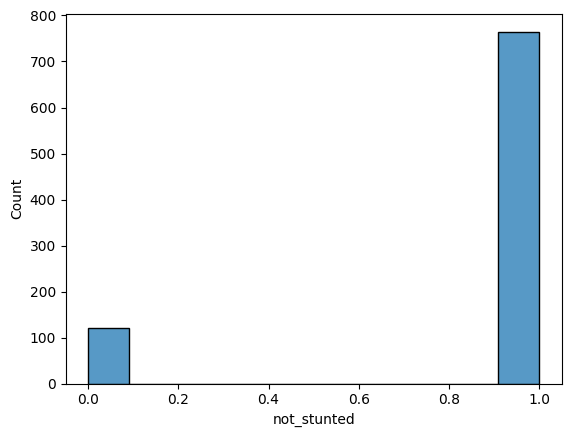

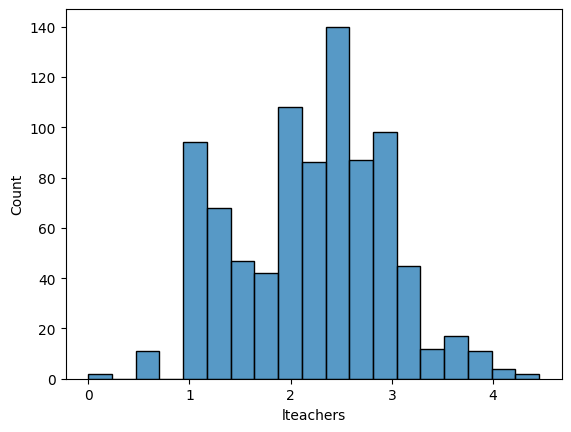

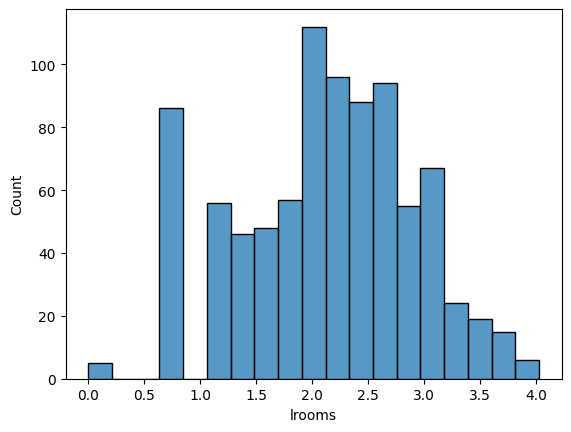

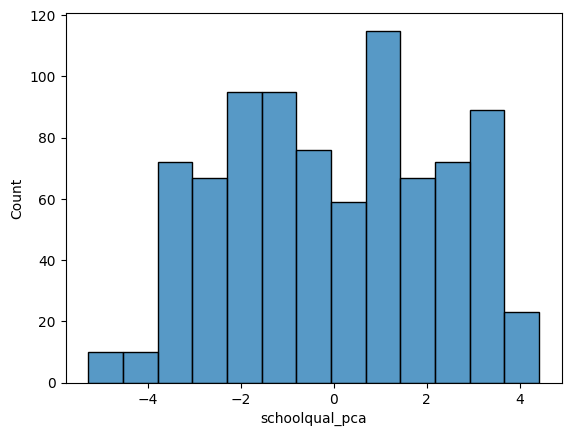

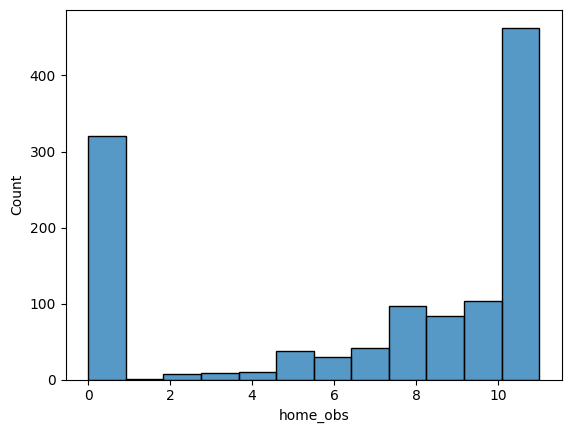

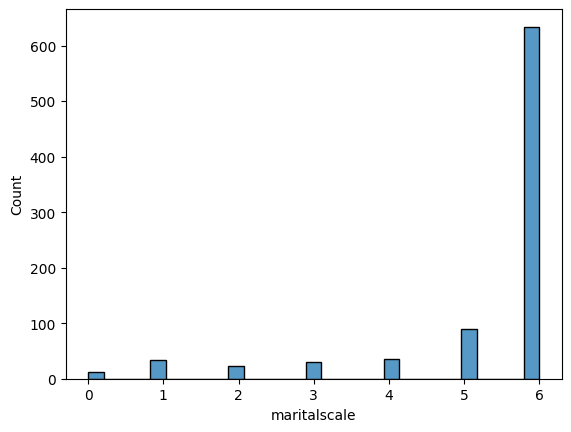

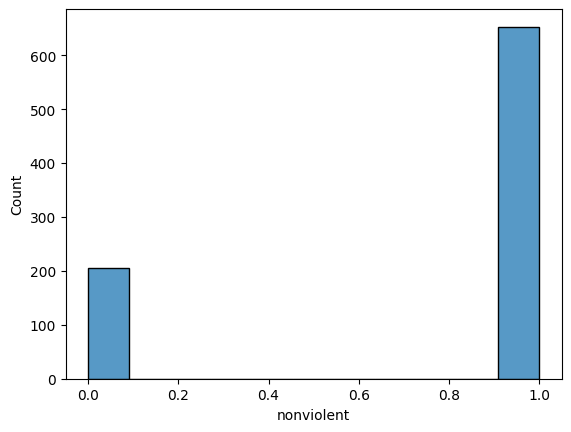

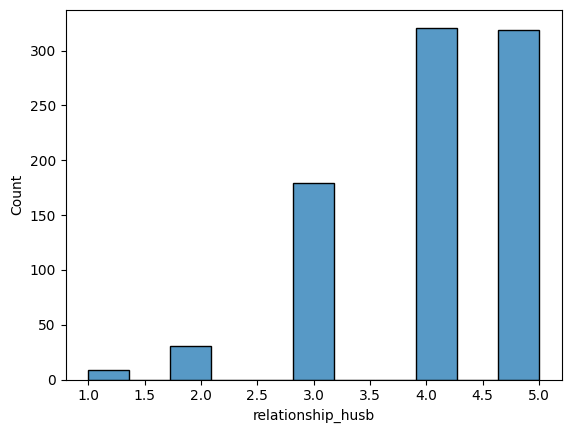

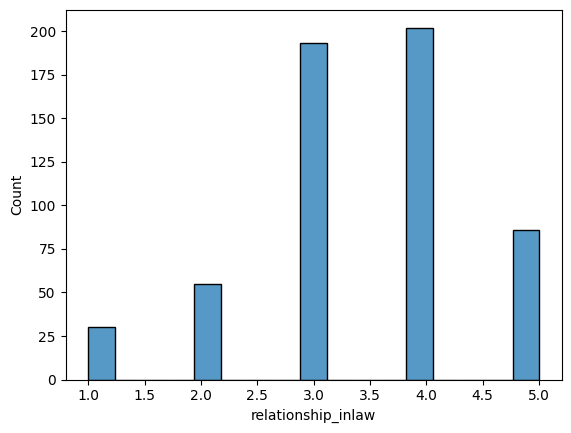

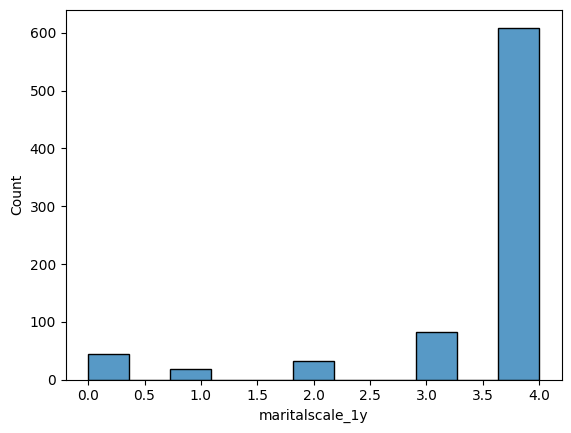

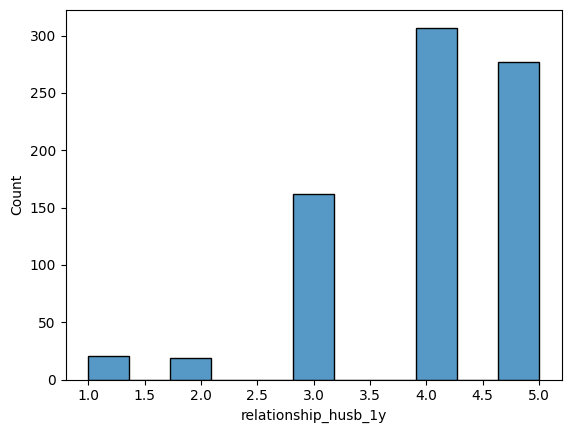

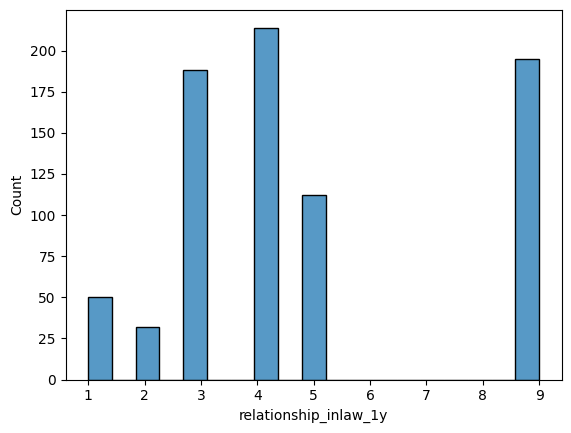

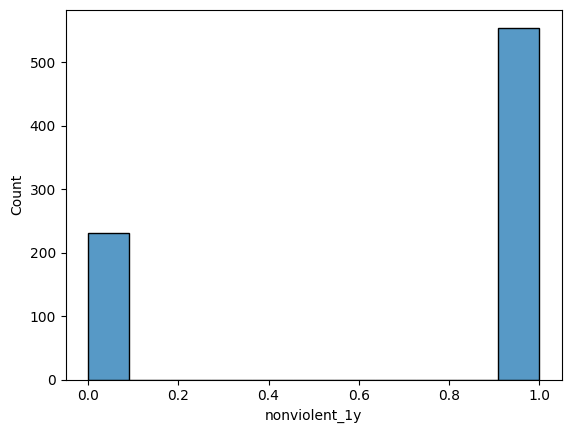

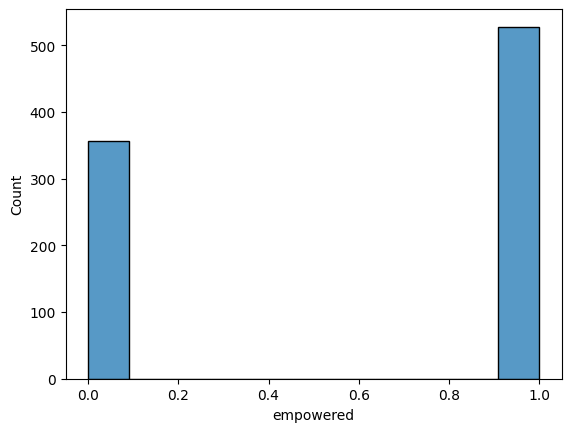

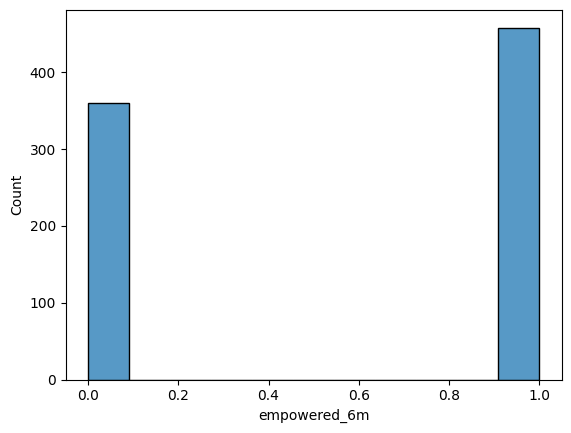

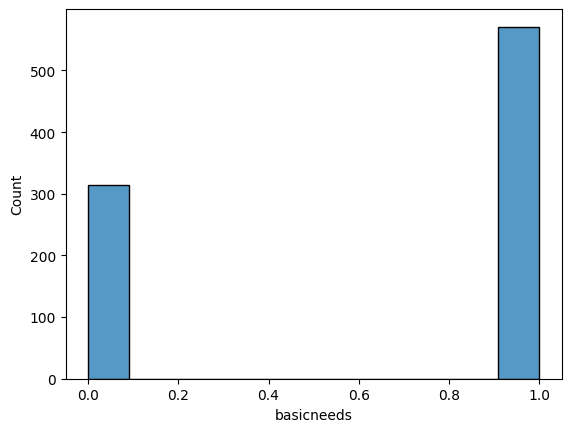

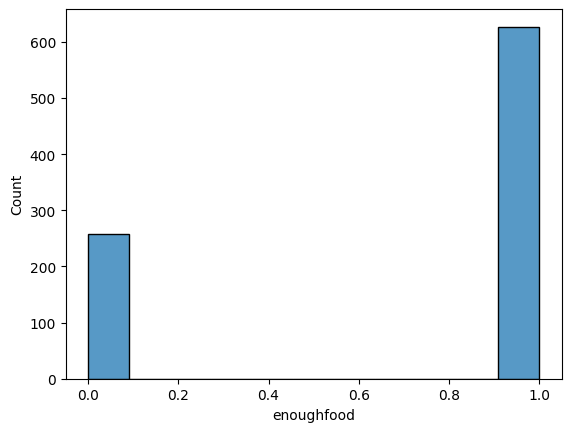

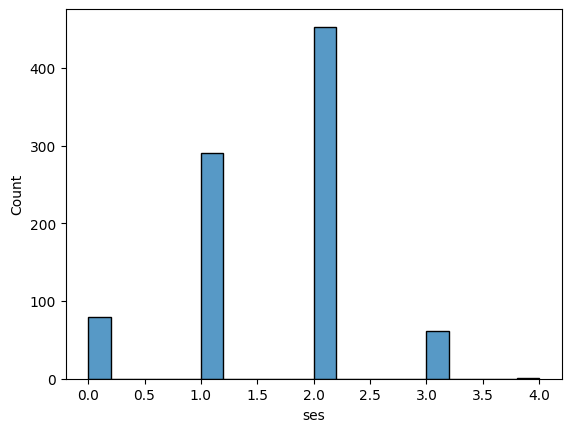

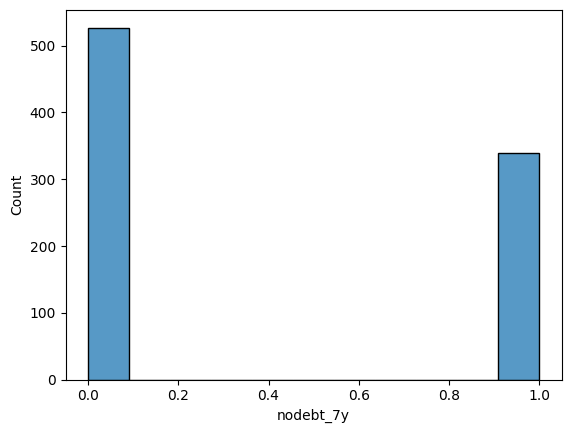

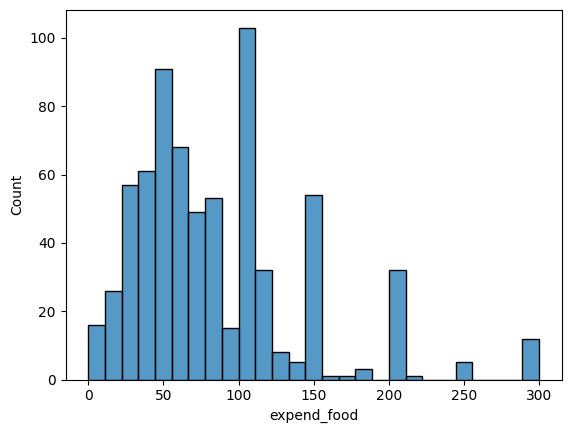

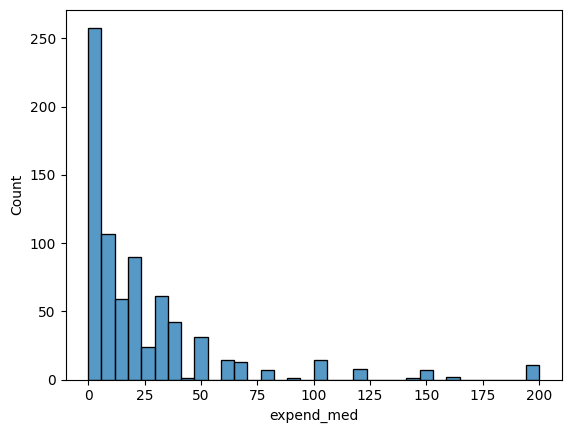

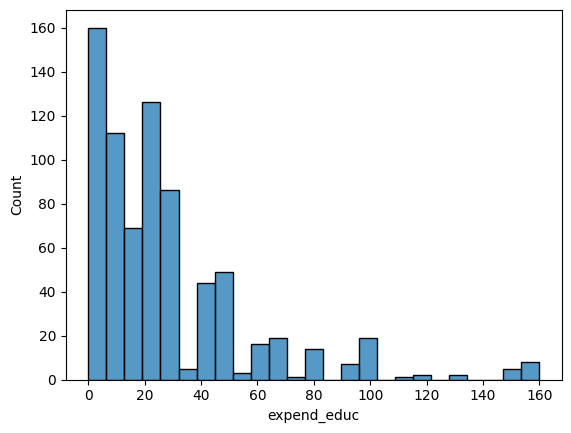

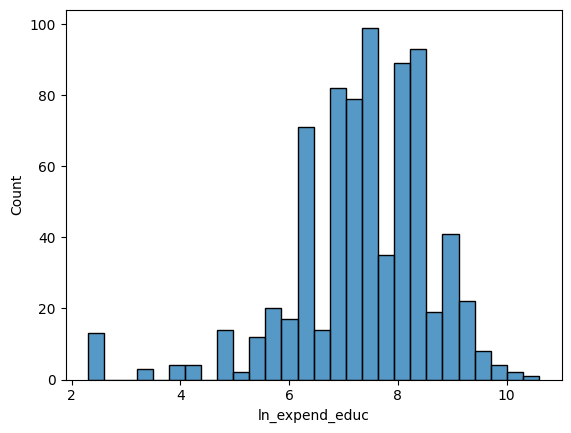

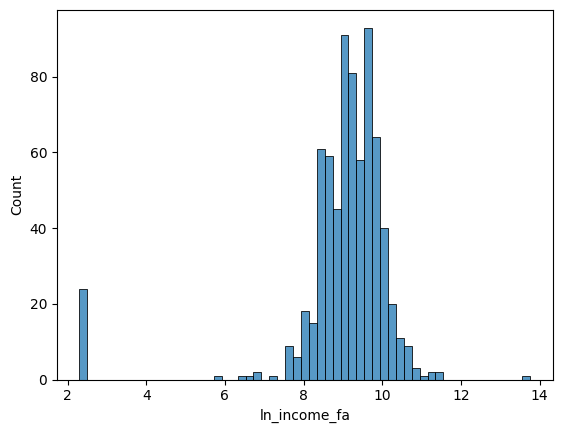

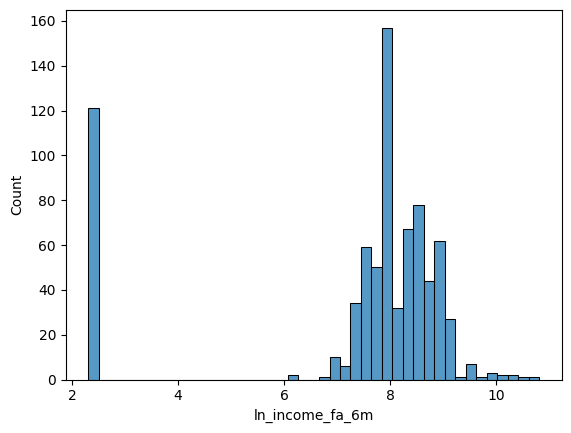

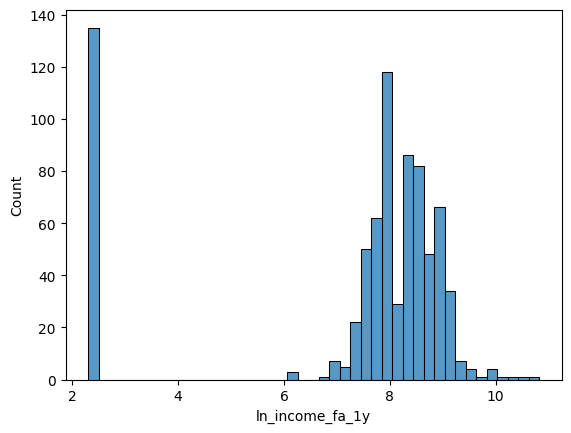

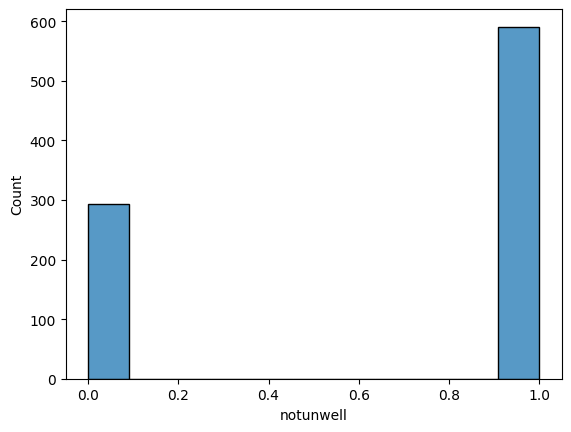

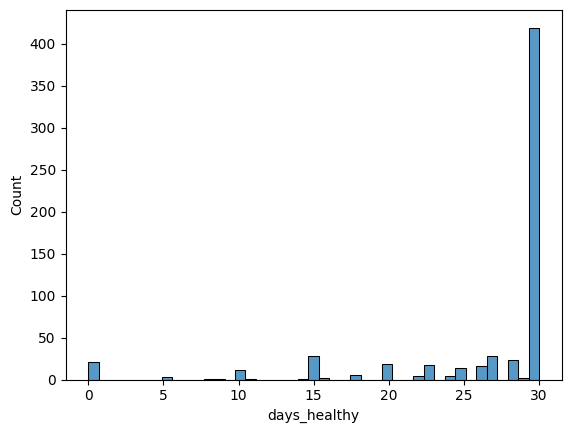

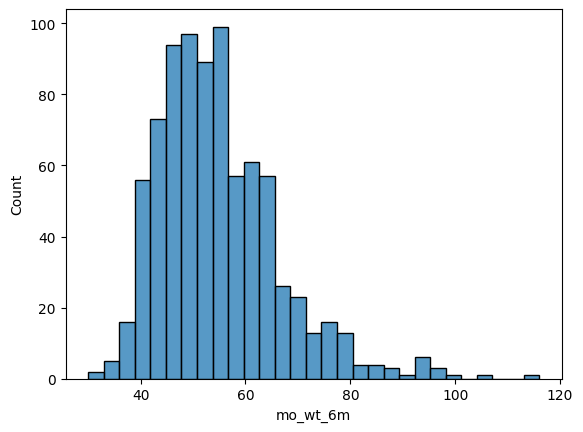

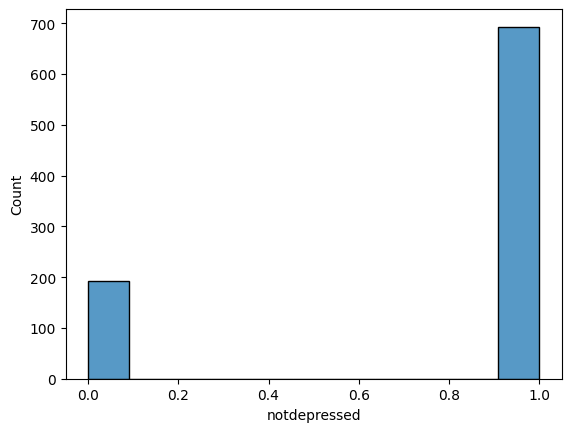

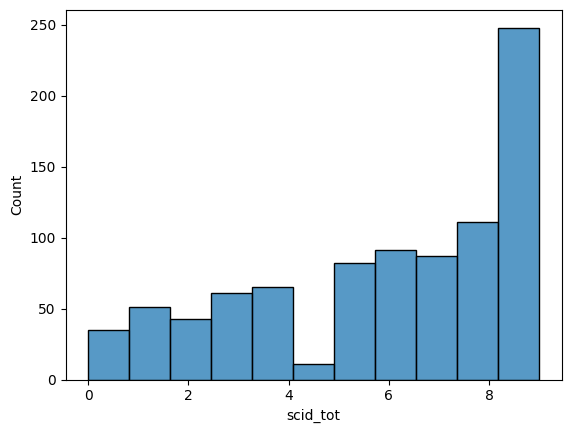

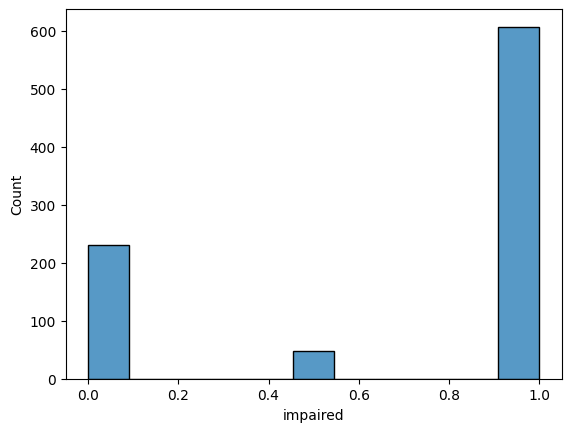

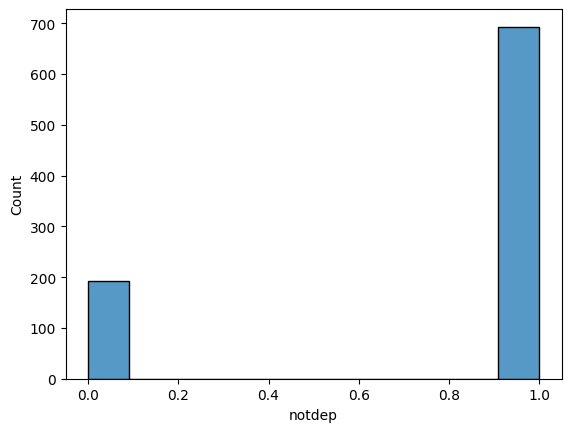

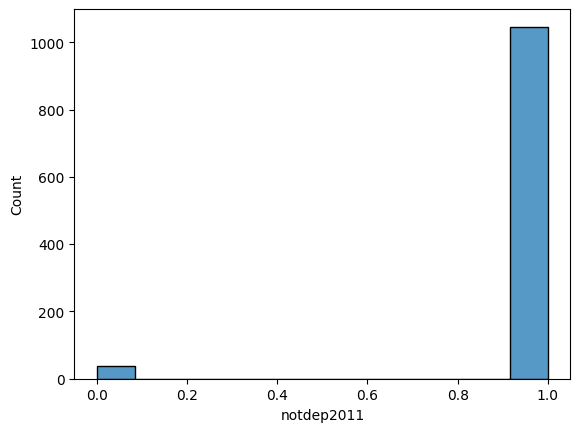

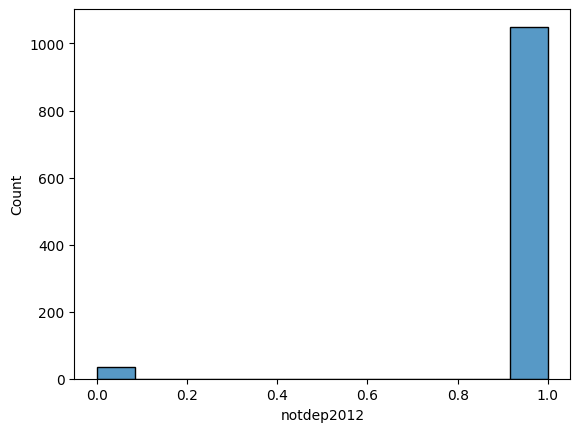

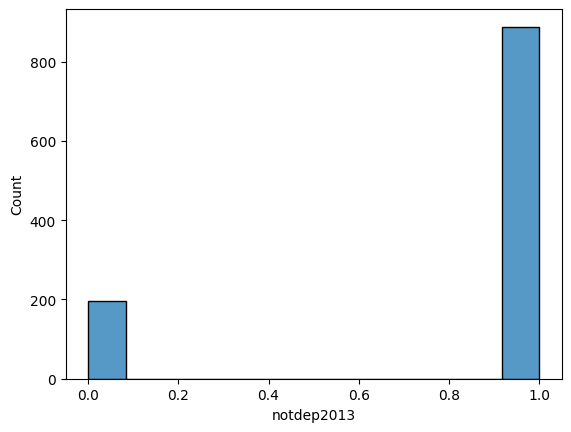

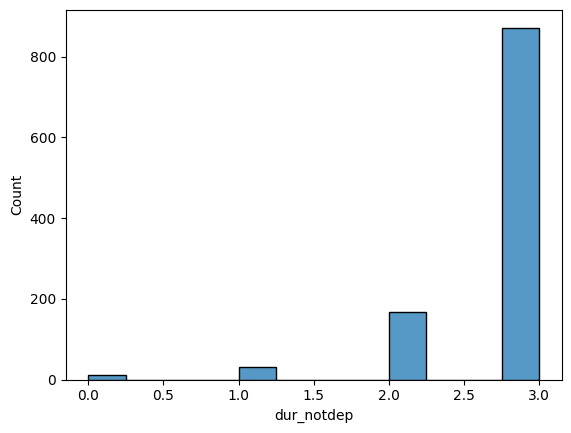

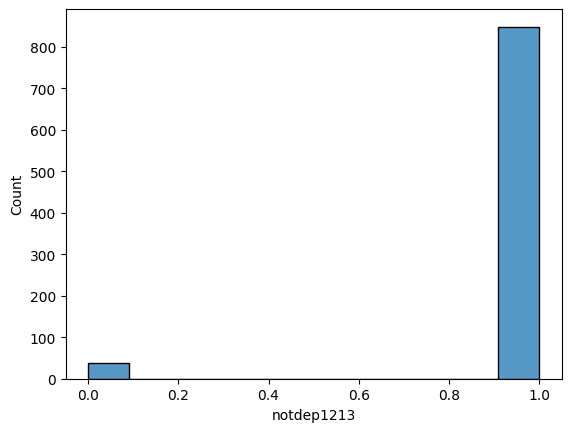

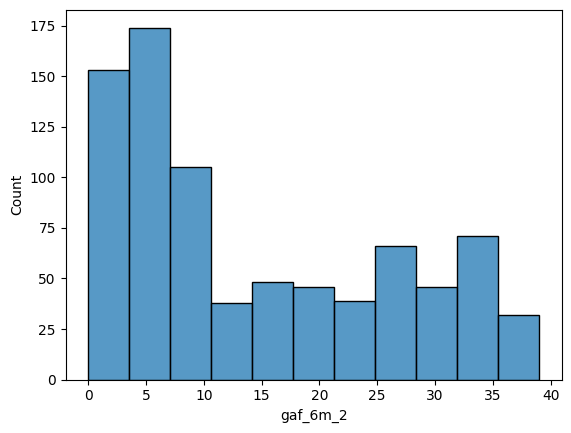

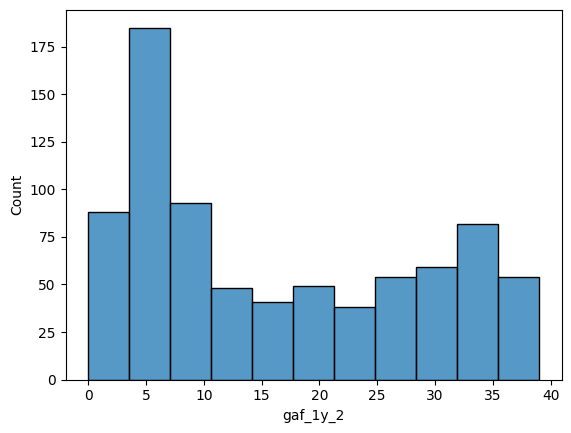

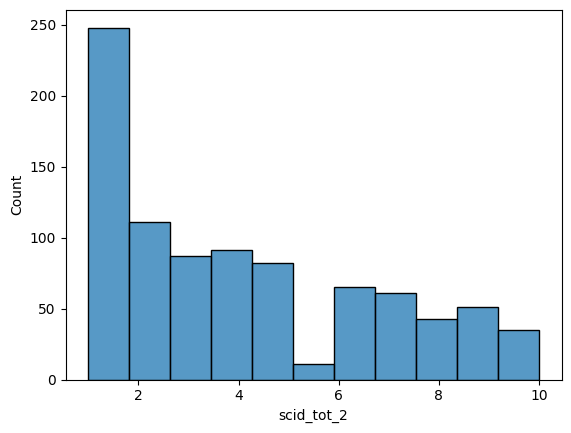

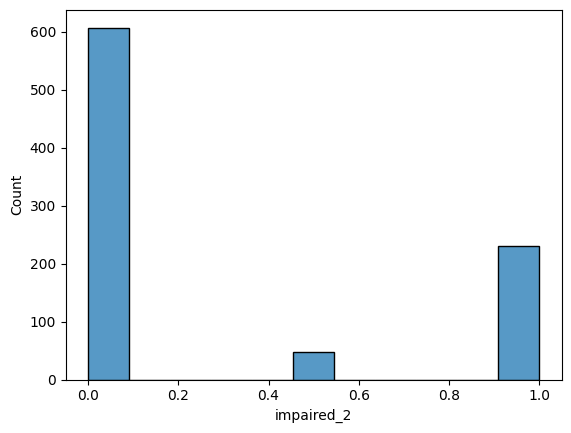

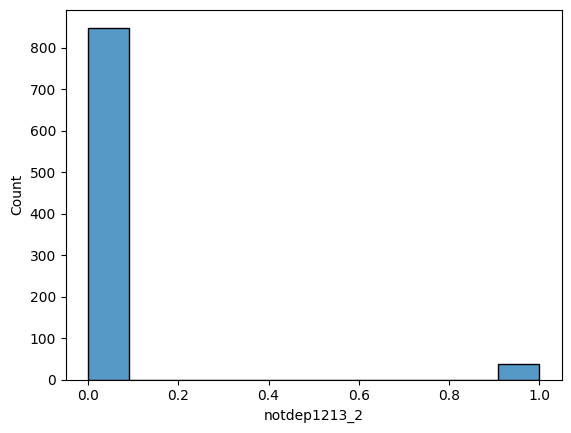

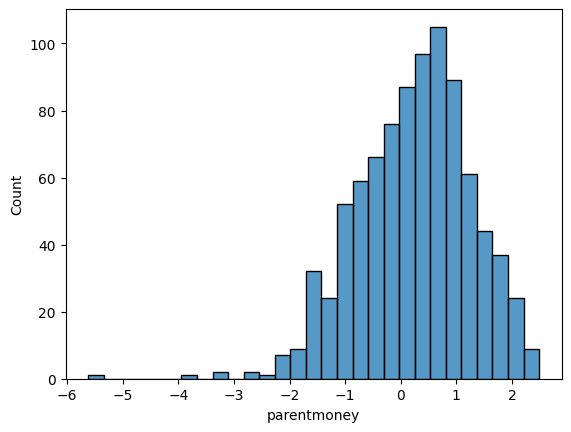

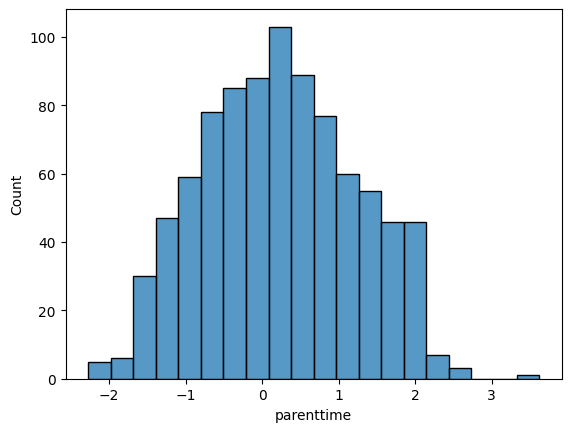

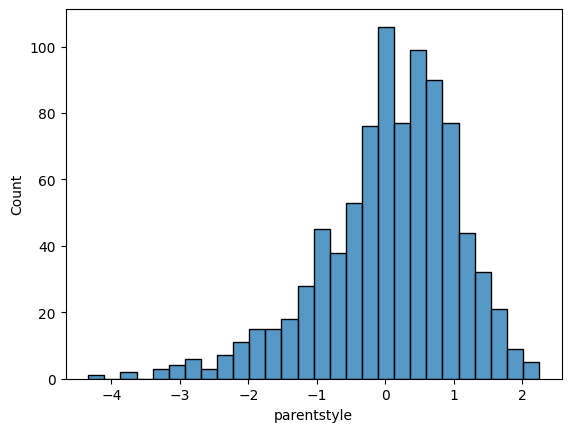

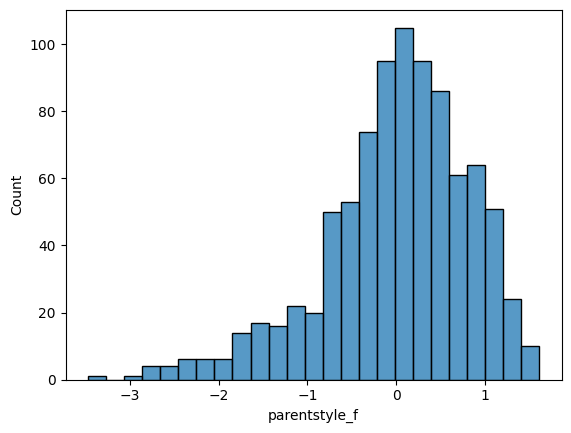

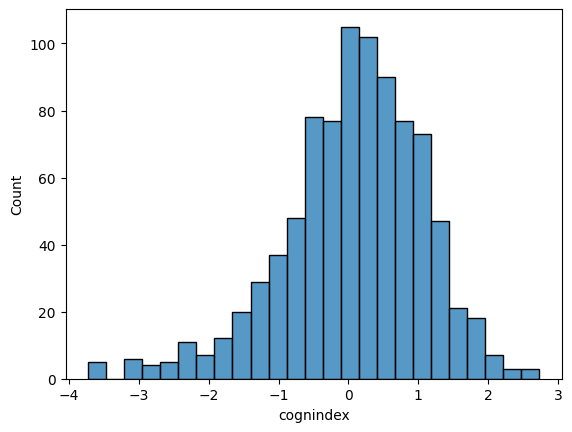

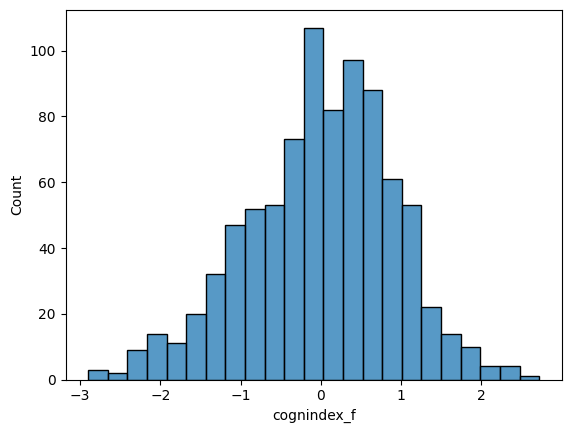

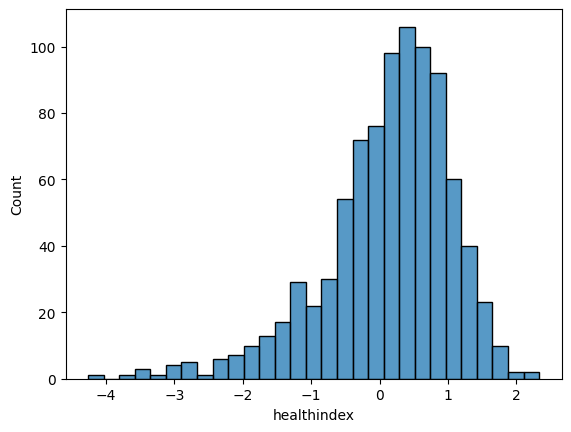

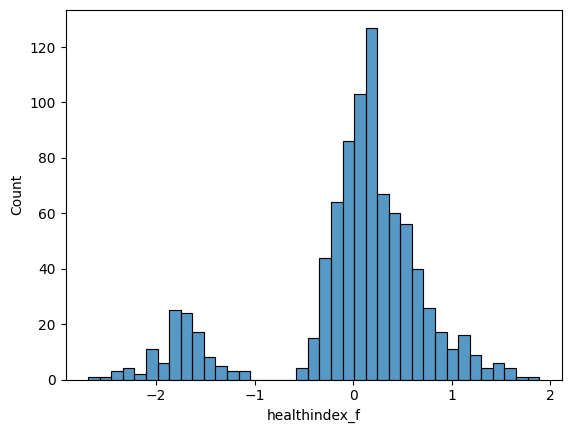

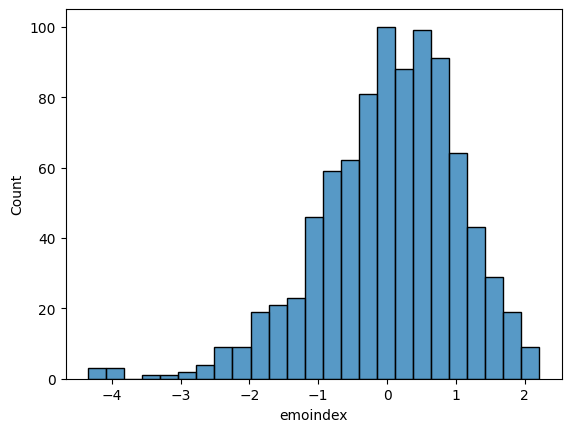

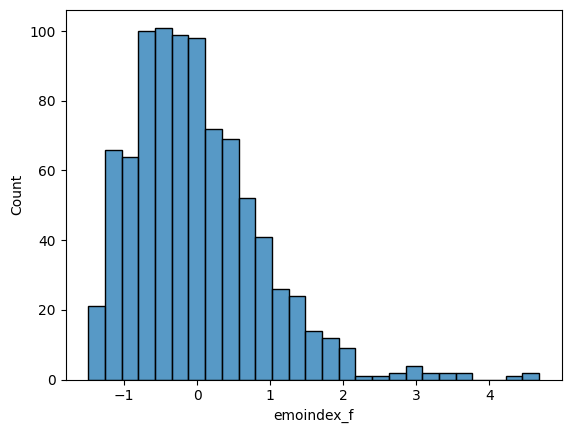

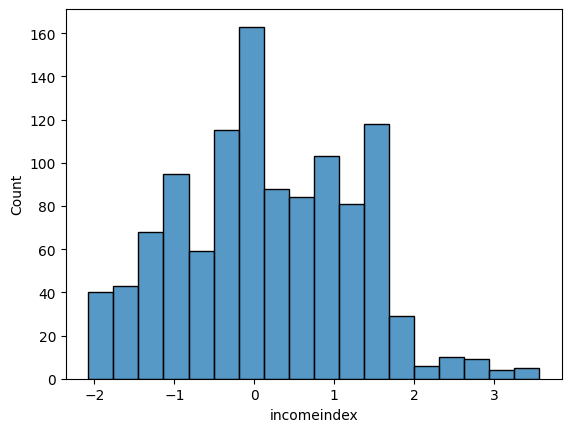

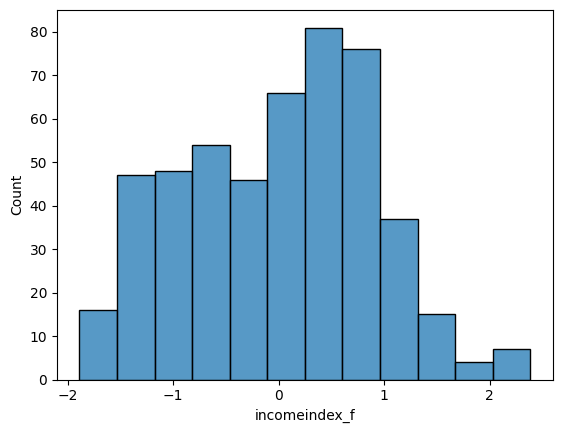

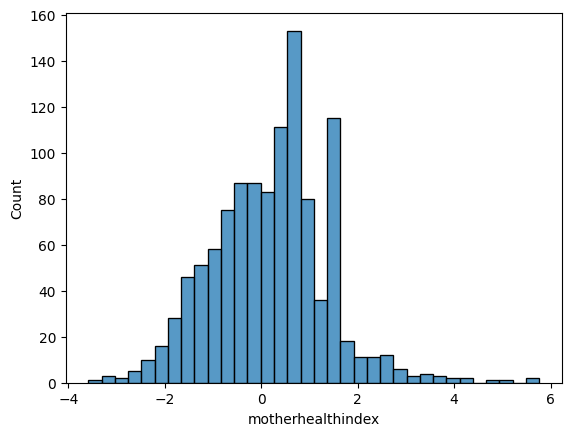

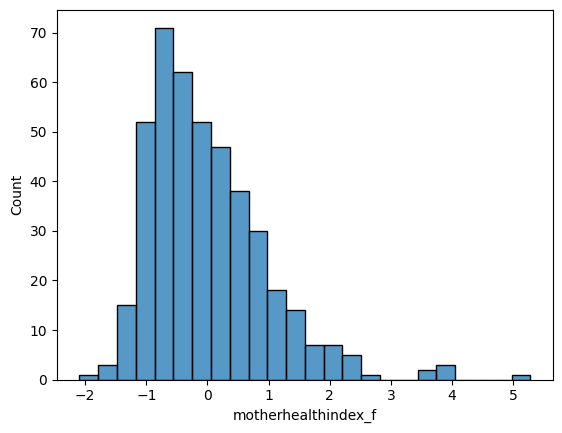

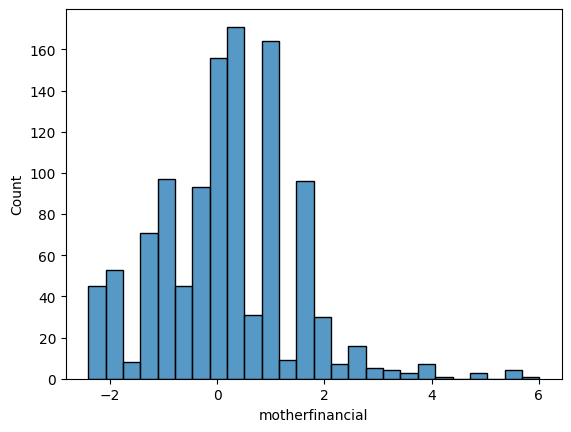

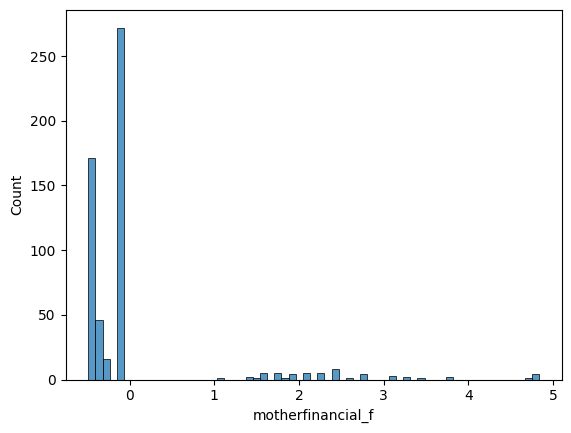

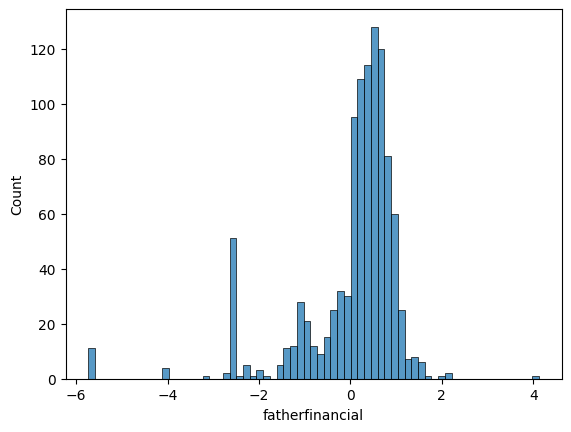

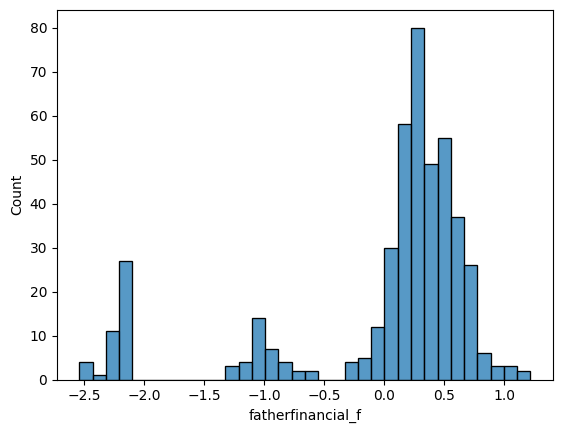

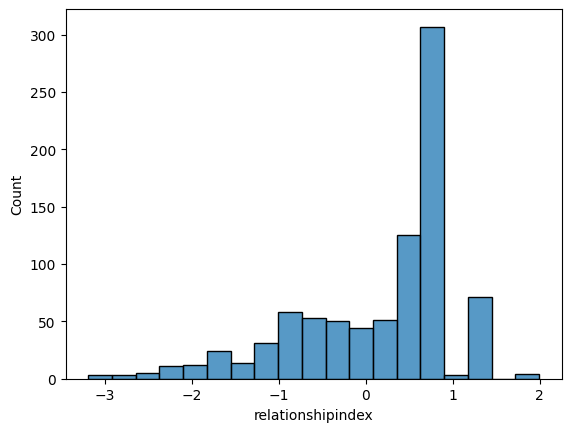

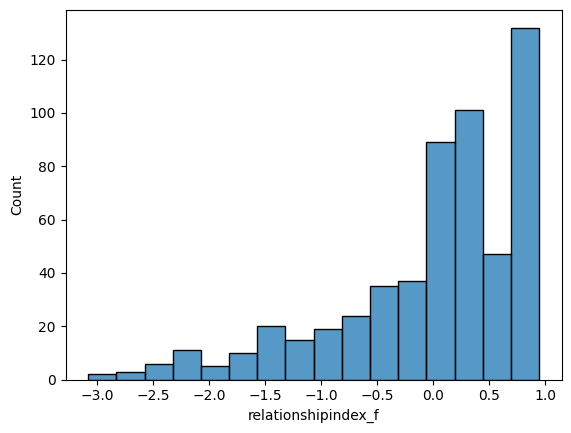

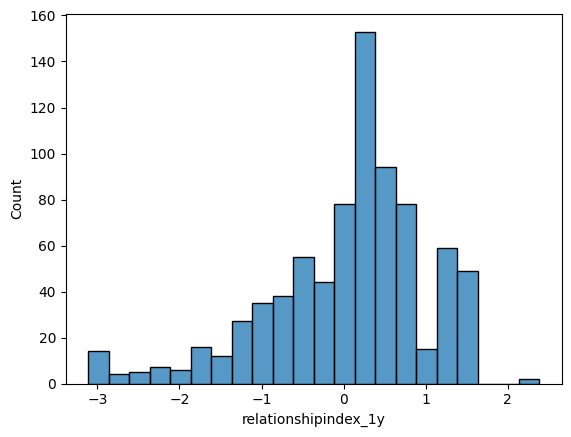

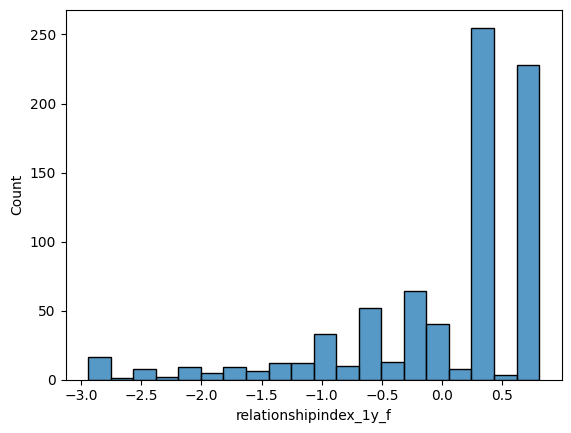

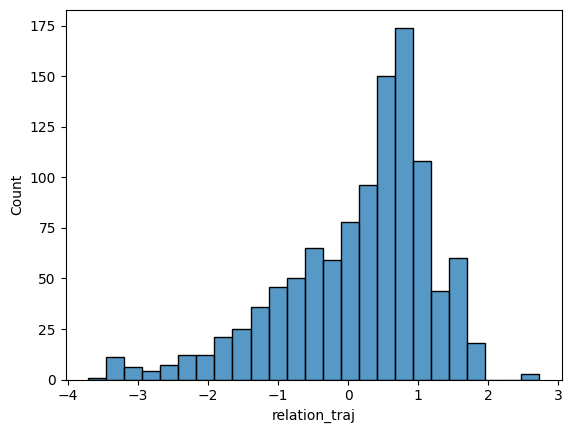

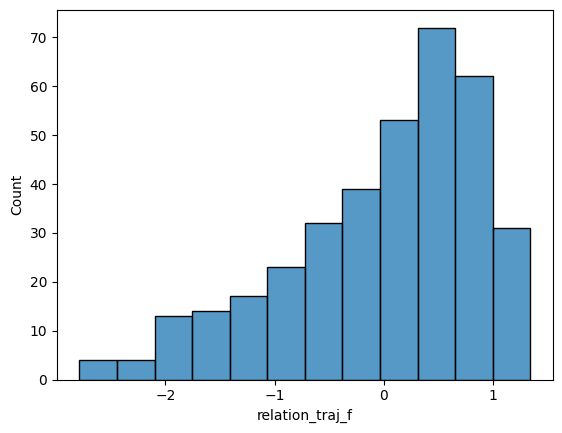

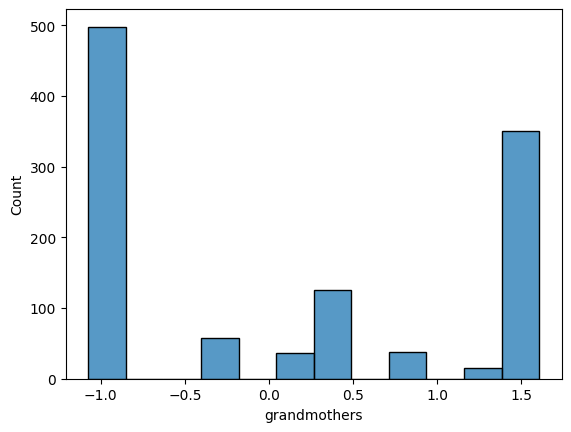

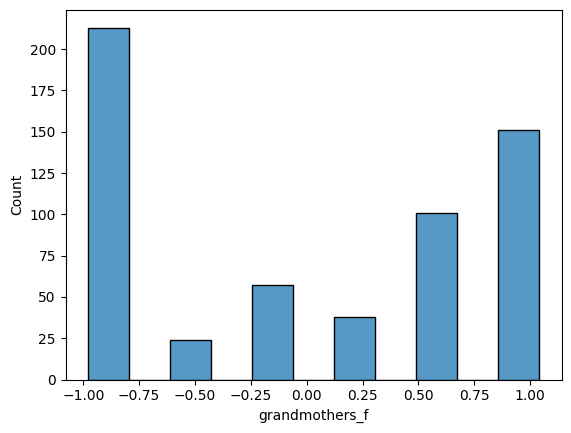

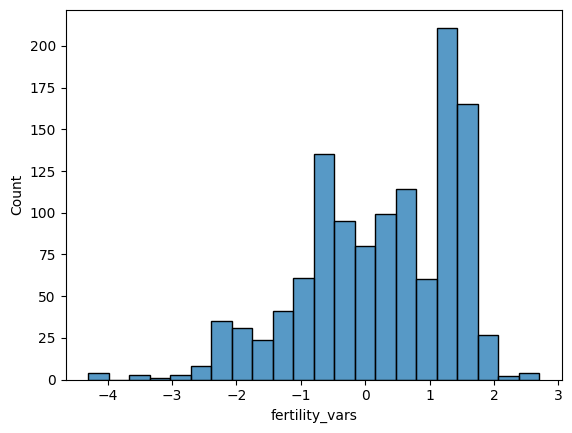

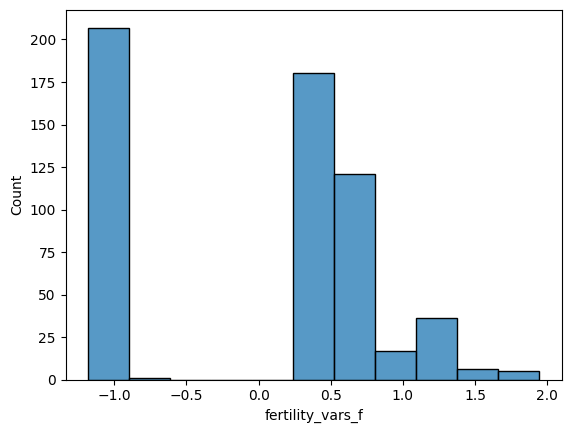

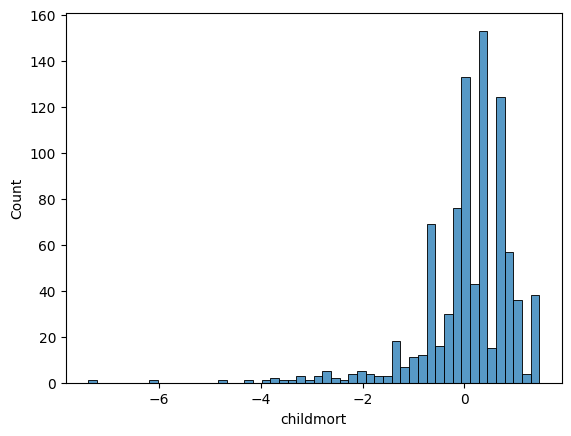

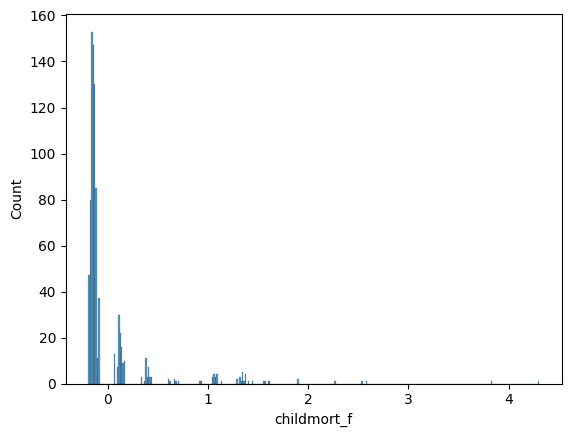

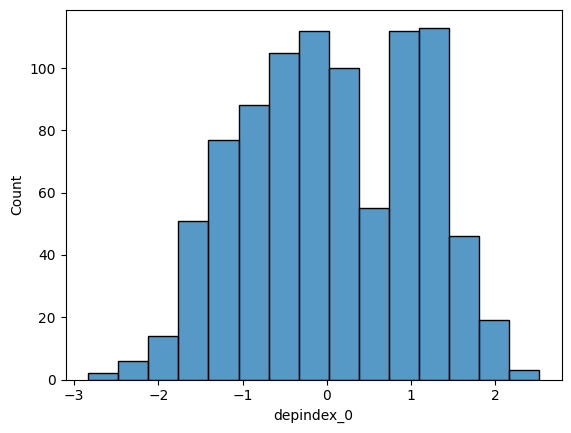

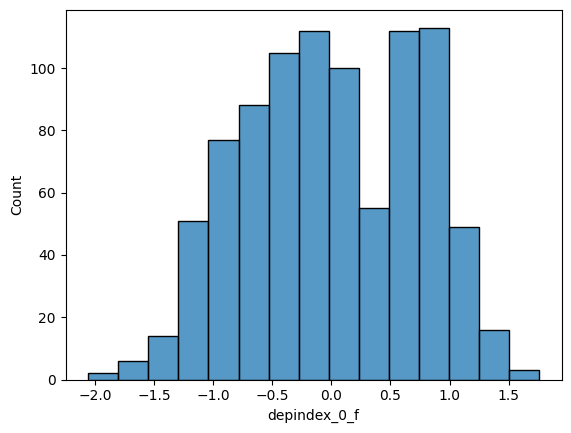

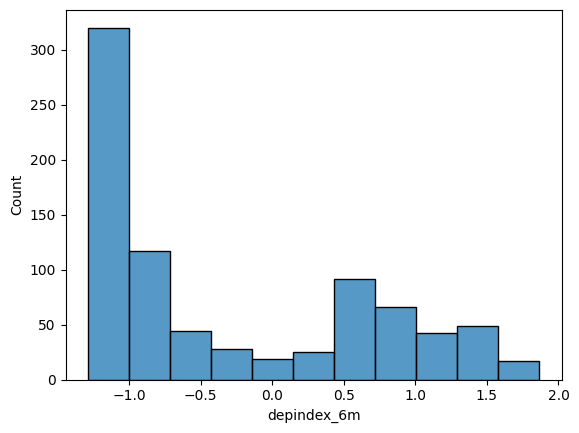

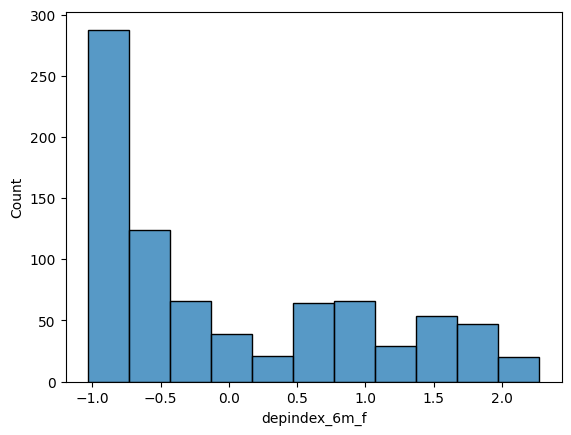

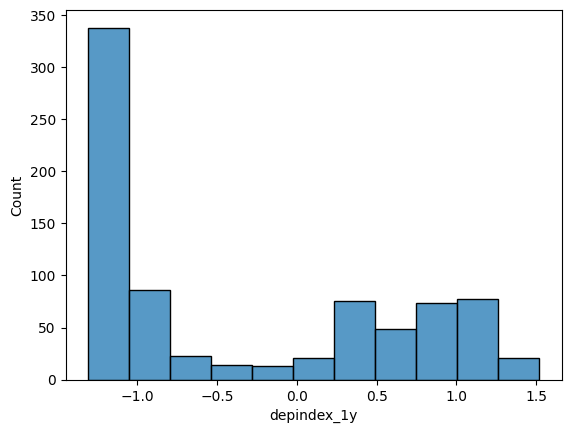

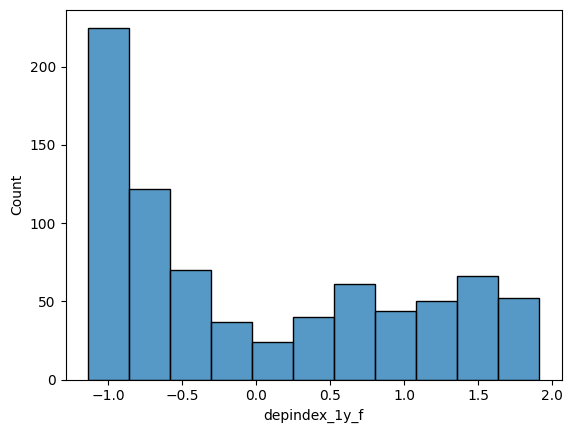

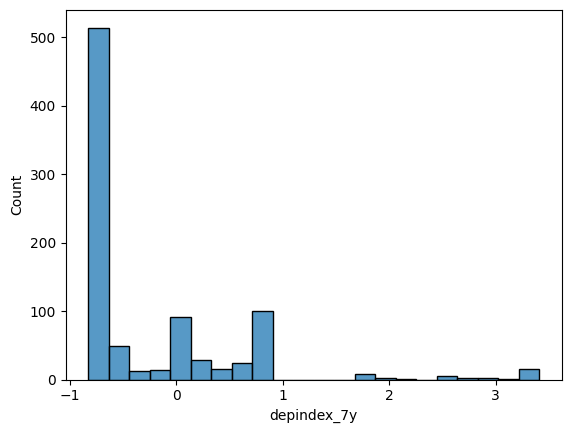

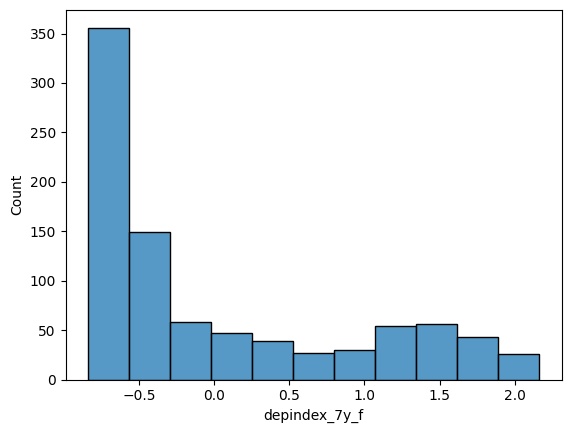

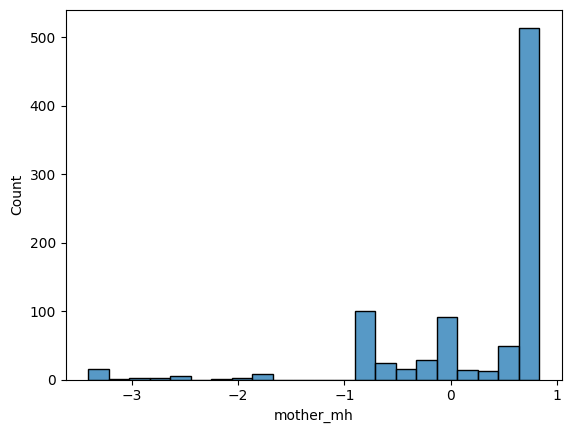

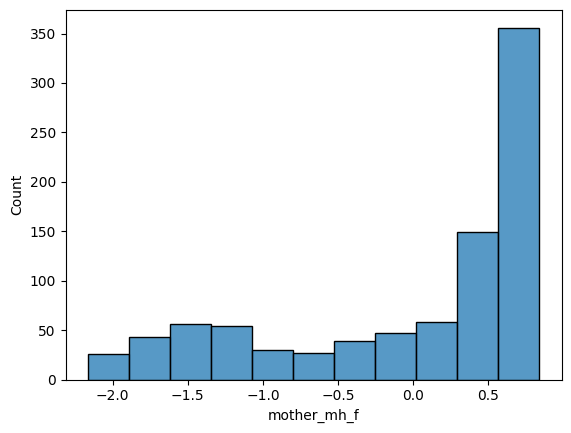

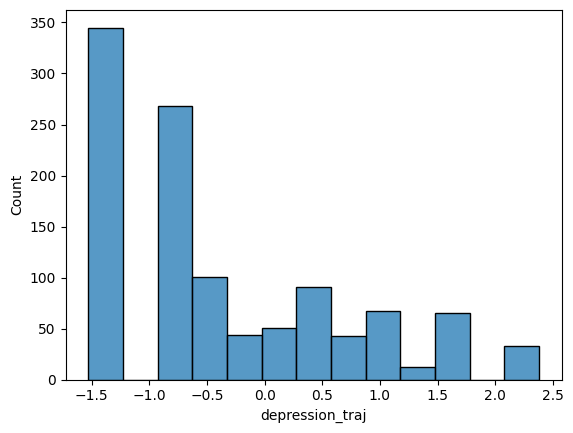

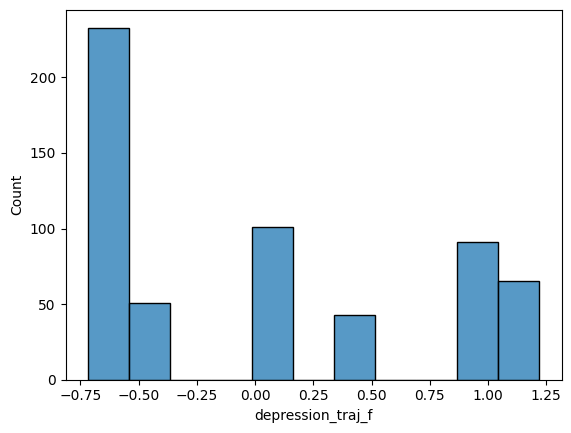

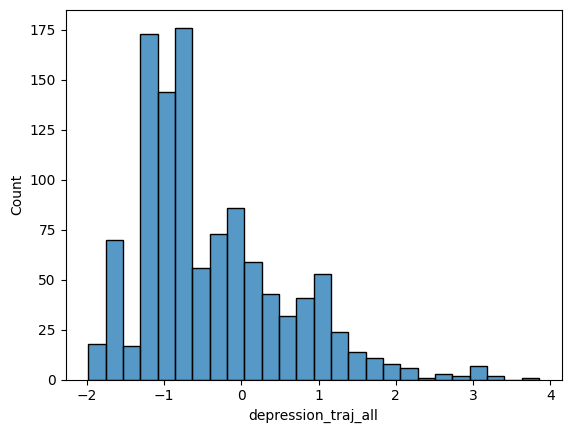

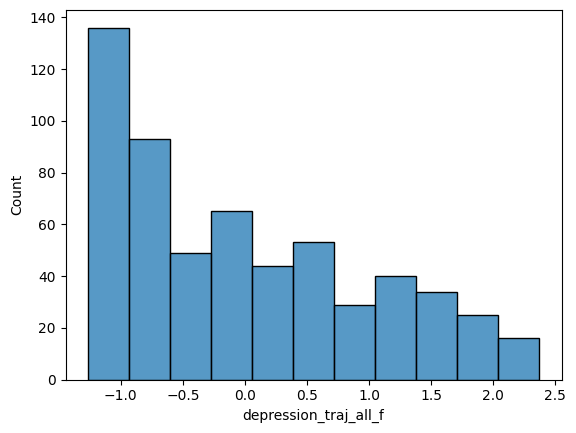

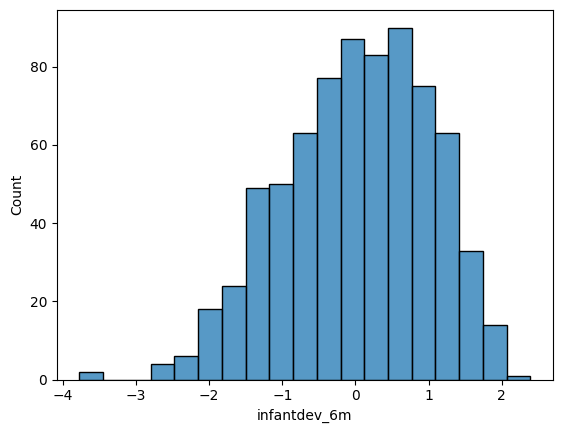

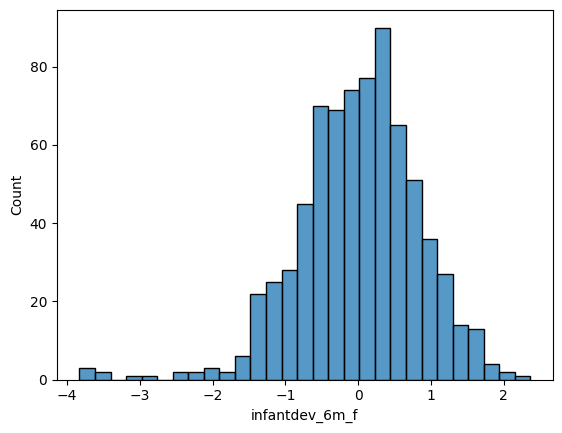

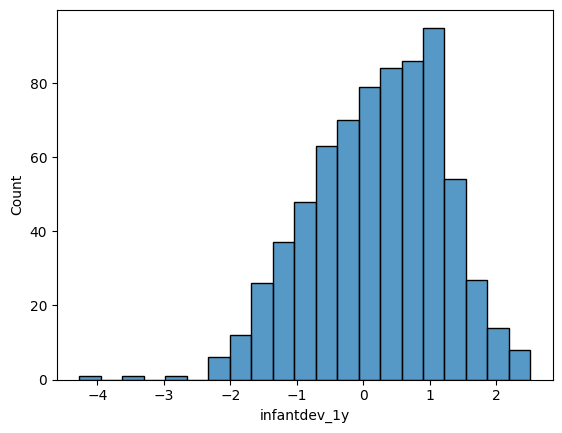

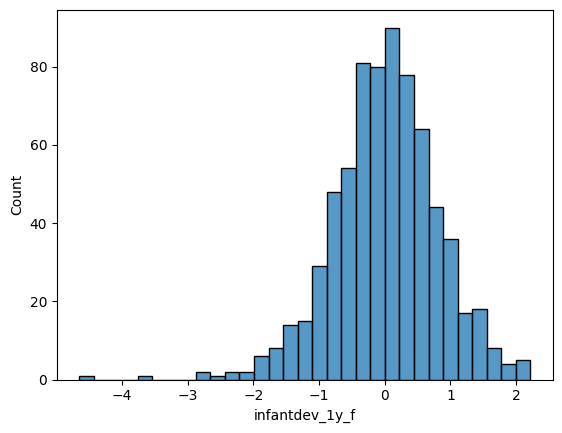

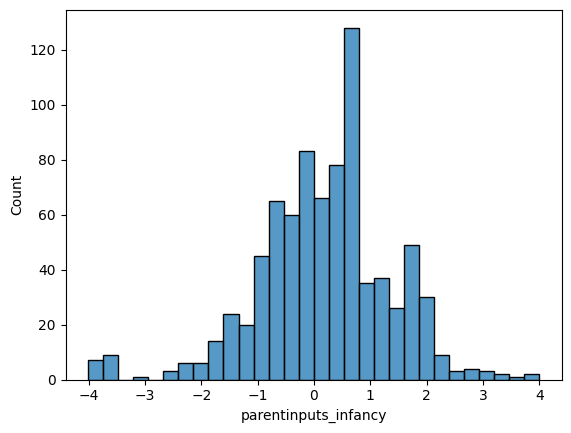

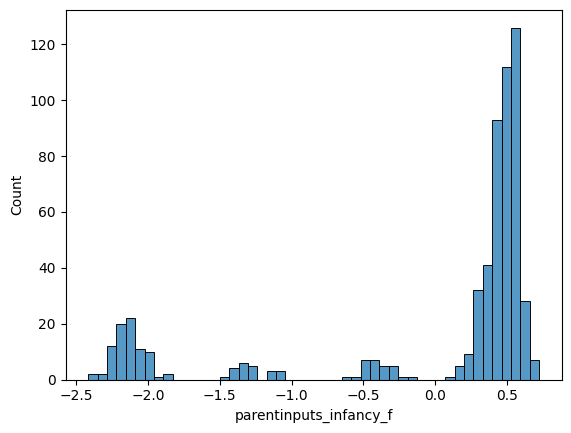

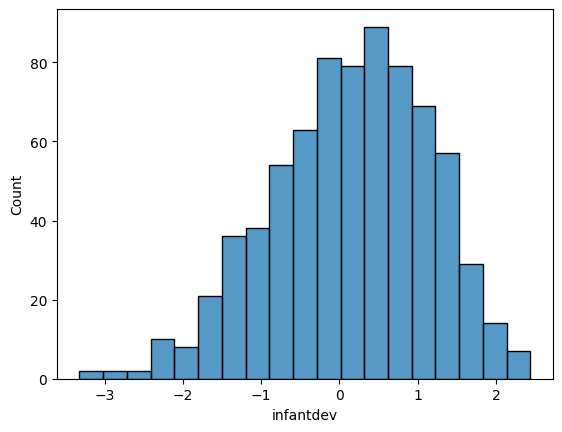

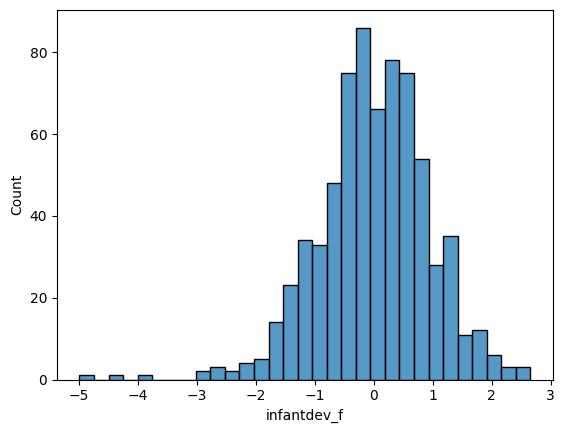

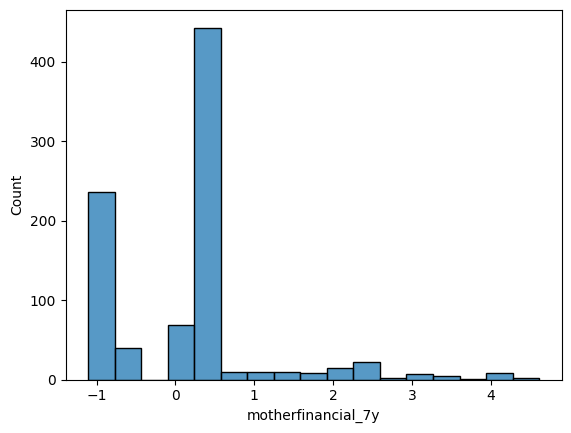

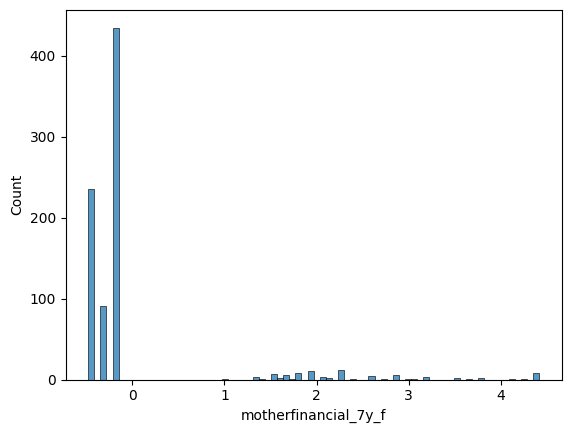

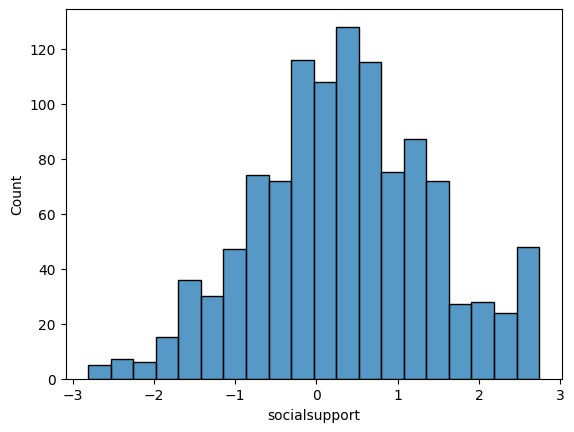

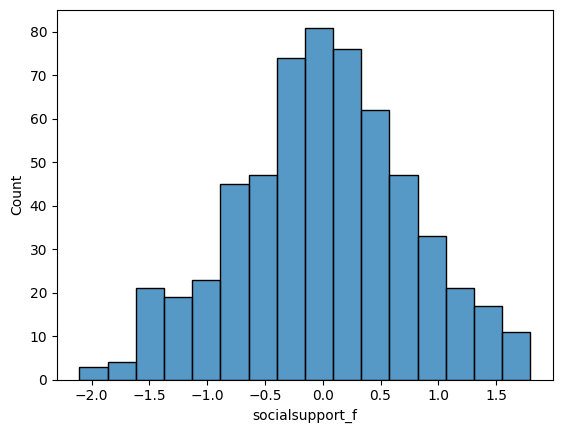

In [11]:
#histogram to understand the distribution
import warnings
warnings.filterwarnings('ignore')
for i in df.select_dtypes(include='number').columns:
  sns.histplot(data=df, x=i)
  plt.show()

In [12]:
#boxplot to identify outliers

## **Missing Values Treatment**

In [17]:
#method of imputing missing value


In [22]:
pd.set_option('display.max_rows', None)
missing_percent = df.isnull().sum() / df.shape[0] * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)
print(missing_percent)

relation_traj_f               69.742311
motherhealthindex_f           64.339152
fatherfinancial_f             62.676642
incomeindex_f                 58.686617
relationshipindex_f           53.782211
motherfinancial_f             53.449709
relationship_inlaw            52.950956
fertility_vars_f              52.369077
socialsupport_f               51.454697
depression_traj_all_f         51.454697
grandmothers_f                51.454697
depression_traj_f             51.454697
control                       51.371571
parentinputs_infancy_f        51.288446
play_fa_1y                    51.205320
age_kid1                      50.374065
days_healthy                  48.379052
expend_food                   42.394015
infantdev_f                   41.562760
attrit                        41.479634
HAZ_12                        41.147132
infantdev_1y_f                41.147132
WAZ_12                        41.064007
c_ht_1y                       40.897756
discussed                     40.897756


### **Fixing Garbage Values**

In [13]:
# df['genhealth'] = df['genhealth'].replace("0", np.nan)
# df['ideal_no_kids'] = df['ideal_no_kids'].replace("0", np.nan)
# df['ideal_no_kids'] = pd.to_numeric(df['ideal_no_kids'], errors='coerce')

In [14]:
# mapping = {
   # "not played at all": 0.0,
  #  "once or twice": 0.25
# }
# df["mo_358"] = df["mo_358"].replace(mapping)
# df["mo_358"] = pd.to_numeric(df["mo_358"], errors="coerce")

### **Fixing Missing Values**

In [15]:
# df.isnull().sum()

newid                   318
interviewer             318
uc                        0
grandmother             318
employed_mo             318
                       ... 
infantdev_f             500
motherfinancial_7y      318
motherfinancial_7y_f    353
socialsupport            83
socialsupport_f         619
Length: 394, dtype: int64

In [16]:
# df.isnull().sum()/df.shape[0]*100

newid                   26.433915
interviewer             26.433915
uc                       0.000000
grandmother             26.433915
employed_mo             26.433915
                          ...    
infantdev_f             41.562760
motherfinancial_7y      26.433915
motherfinancial_7y_f    29.343308
socialsupport            6.899418
socialsupport_f         51.454697
Length: 394, dtype: float64